Diabetes Dataset - Pima Indians

https://www.kaggle.com/datasets/nancyalaswad90/review/data

# Contents
- [Import libraries and data](#Import-libraries-and-data)
- [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
    - [Data imbalance of full dataset](##Data-imbalance-of-full-dataset)
    - [Histogram of features](##Histogram-of-features)
    - [Boxplot of features](##Boxplot-of-features)
    - [Pairplot of features](##Pairplot-of-features)
    - [Correlation plot](##Correlation-plot)
    - [Mean feature values grouped by outcome](##Mean-feature-values-grouped-by-outcome)
- [Split the data into training and test sets](#Split-the-data-into-training-and-test-sets)
    - [Data imbalance of train and test sets](##Data-imbalance-of-train-and-test-sets)
- [Preprocessing pipeline](#Preprocessing-pipeline)
    - [Feature engineering classes](##Feature-engineering-classes)
    - [Column transformers](##Column-transformers)
        - [Check output after each preprocessing step](###Check-output-after-each-preprocessing-step)
    - [T-test](##T---test)
- [Model evaluations](#Model-evaluations)
    - [Logistic regression](##Logistic-regression)
        - [Performance metrics](###Performance-metrics)
        - [SHAP analysis](###SHAP-analysis)
        - [Hyperparameter tuning with gridsearch](###Hyperparameter-tuning-with-gridsearch)
        - [Classification reports](###Classification-reports)
        - [Confusion matrices](###Confusion-matrices)
        - [ROC curves](###ROC-curves)
        - [Precision recall curves](###Precision-recall-curves)
        - [Interpretation of metrics](###Interpretation-of-metrics)
        - [Feature importance](###Feature-importance)
        - [SHAP analysis - tuned model](###SHAP-analysis---tuned-model)
    - [KNN](##KNN)
        - [Performance metrics](###Performance-metrics)
        - [Hyperparameter tuning with gridsearch](###Hyperparameter-tuning-with-gridsearch)
        - [Classification report - tuned KNN model](###Classification-report---tuned-KNN-model)
        - [PCA KNN pipeline](###PCA-KNN-pipeline)
        - [Hyperparameter tuning on PCA KNN model](###Hyperparameter-tuning-on-PCA-KNN-model)
        - [Classification report](###Classification-report)
        - [Confusion matrix](###Confusion-matrix)
        - [ROC curve](###ROC-curve)
        - [Precision recall curve](###Precision-recall-curve)
    - [Random forest](##Random-forest)
        - [Performance metrics](###Performance-metrics)
        - [Hyperparameter tuning with gridsearch](###Hyperparameter-tuning-with-gridsearch)
        - [Classification report - tuned RF model](###Classification-report---tuned-RF-model)
        - [Feature importance](###Feature-importance)
        - [Hyperparameter tuning - important features](###Hyperparameter-tuning---important-features)
        - [Classification reports](###Classification-reports)
        - [Confusion matrices](###Confusion-matrices)
        - [ROC curves](###ROC-curves)
        - [Precision recall curves](###precision-recall-curves)
    - [XGBoost](##XGBoost)
        - [Performance metrics](###Performance-metrics)
        - [Hyperparameter tuning with gridsearch](###Hyperparameter-tuning-with-gridsearch)
        - [Classification report - tuned XGB](###Classification-report---tuned-XGB)
        - [Feature importance](###Feature-importance)
        - [Hyperparameter tuning - important features](###Hyperparameter-tuning---important-features)
        - [Classification report](###Classificationreport)
        - [Confusion matrix](###Confusion-matrix)
        - [ROC curve](###ROC-curve)
        - [Precision recall curve](###Precision-recall-curve)
    - [ANN](##ANN)
        - [Performance metrics](###Performance-metrics)
        - [Hyperparameter tuning with Gridsearch](###Hyperparameter-tuning-with-Gridsearch)
        - [Classification report](###Classification-report)
        - [Confusion matrix](###Confusion-matrix)
        - [ROC curve](###ROC-curve)
        - [Precision recall curve](###Precision-recall-curve)
- [ROC curves - aggregate](#ROC-curves---aggregate)
- [Precision recall curves - aggregate](#Precision-recall-curves---aggregate)
- [Train vs test fits - aggregate](#Train-vs-test-fits---aggregate)
- [Classification metrics - aggregate](#Classification-metrics---aggregate)
- [Confusion matrices - aggregate](#Confusion-matrices---aggregate)
- [Stacking models](#Stacking-models)
    - [Gridsearch on stacked models](##Gridsearch-on-stacked-models)
        - [trouble shooting the gridsearch on the pipeline](###trouble-shooting-the-gridsearch-on-the-pipeline)

# Import libraries and data

In [397]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve, average_precision_score
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss, log_loss
from sklearn.ensemble import StackingClassifier
import shap  
import time

In [3]:
# read in and visualize the dataset 
df = pd.read_csv(r"C:\Users\aplor\Desktop\PYTHON_PRO_1\Projects\Diabetes_Dataset_Pima_Indians\diabetes.csv")
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

# Exploratory Data Analysis (EDA)
[top](#Contents)

From the original data collection and analysis source:

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

list of features and measurement units:
1. pregnancies - int
2. glucose - plasma glucose concentration at 2 hrs in an Oral Glucose Tolerance Test (GTT), dg/dL(?)
3. blood pressure - diastolic, mmHg
4. skin thickness - triceps skin fold thickness, mm
5. insulin - 2-hour serum insulin, uU/ml (micro units per milliliter)
6. BMI - weight in kg/(height in m)^2
7. diabetes pedigree function - a formula described in the publication. it is a unitless value
8. age - int
9. outcome - 1 = has DM, 0 = does not have DM

In [4]:
# data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# basic statisitcs of the features
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [6]:
df['Pregnancies'].dtype

dtype('int64')

In [7]:
# percent missing data per variable

df.isna().sum()/len(df)*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [8]:
# number of values that == 0 per feature

zero_counts = (df==0).sum()

print(zero_counts)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [9]:
# percent of values that are 0 for features where 0 likely means missing values

features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

percent_zero = (df[features]==0).sum()/len(df)*100
percent_zero

Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               1.432292
dtype: float64

In [10]:
# check for duplicated observations

df.duplicated().sum()

0

## Data imbalance of full dataset
[top](#Contents)

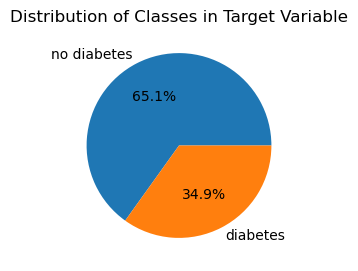

In [11]:
# Determine the balance of the independent variable classes (0 and 1, no diabetes and diabetes)

class_counts = df['Outcome'].value_counts()

plt.figure(figsize=(4,3))
plt.pie(class_counts, labels=['no diabetes', 'diabetes'], autopct='%1.1f%%')
plt.title('Distribution of Classes in Target Variable')
plt.show()

## Histogram of features
[top](#Contents)

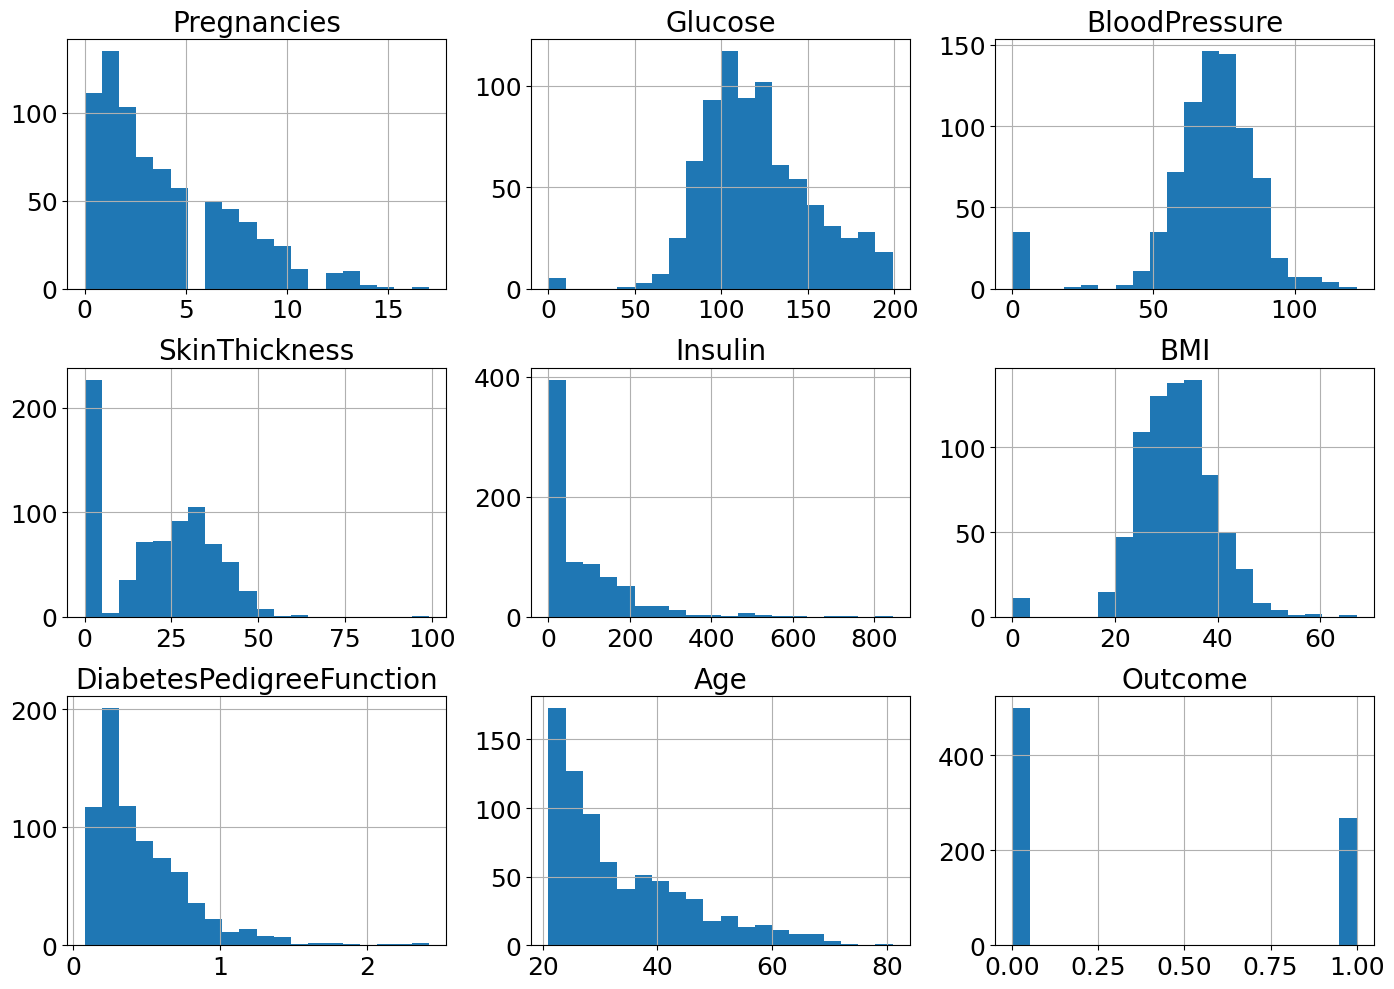

In [12]:
# visualize the distrubutions of the features data 

axes = df.hist(bins=20,figsize=(14,10))

for ax in axes.flatten():
    ax.set_title(ax.get_title(), fontsize=20)
    ax.tick_params(axis='both',labelsize=18)

plt.tight_layout()
plt.show()

The histograms suggest that the value of 0 likely represents missing data for glucose, blood pressure, skin thickness, BMI, and likely insulin. People with type 1 diabetes can have very low levels of or no insulin, but I will proceed with the assumption that 0 insulin is the lack of data.  

Skin thickness of 0 falls within 50% of the datavalues and the baseline of the 1st quartile. A value of 0 can indicate 'normal' skin thickness, which ranges from 0.5mm to 4mm on average.  However, the skin thickness measurement for this study is of the triceps skinfold and is a measure of subcutaneous fat.  Measurements in the range of 10-50mm is expected for healthy individuals.  So, 0mm is likely due to missing data.  

The histogram also provides important information about the distribution of the features data.  Many of the features are skewed right, suggesting that a log transformation may be necessary for model computation efficiency. 

## Boxplot of features
[top](#Contents)

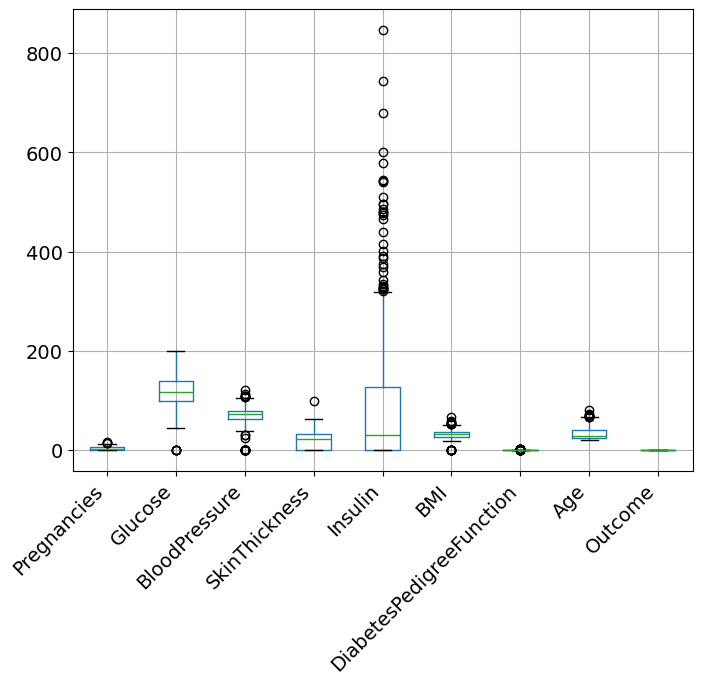

In [13]:
# use a boxplot to better understand the data, especially the numbers of outliers

df.boxplot(figsize=(8,6))
plt.xticks(rotation=45,ha='right', fontsize=14)
plt.yticks(fontsize=14)
#plt.title('Boxplot of the features in the dataset')
plt.show()

There are many outliers for most features, especially blood pressure, insulin, bmi, and age.  A brief exploration of the literature reveals the following levels as average for adult women:

- diastolic blood pressure for healthy adult women should be <80 mmHg

- 2-hour serum insulin levels should range between 16-166 uU/ml
resource: https://emedicine.medscape.com/article/2089224-overview?reg=1&form=fpf#a1

- bmi range of 18.5-24.9 kg/m^2 for women of normal weight 
resource: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8984168/#:~:text=The%20World%20Health%20Organization%20(WHO,kg%2Fm2.18)

I also look up triceps skinfold thickness to understand the expected range of these values.  
- triceps skin fold thickness for women 23.6 +/- 7.5 mm
resource: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9127233/#:~:text=In%20the%20study%20population%2C%20the%20average%20TSF,cm%2C%20and%2032.3%20%C2%B1%204.6%20cm%2C%20respectively.

## Pairplot of features
[top](#Contents)

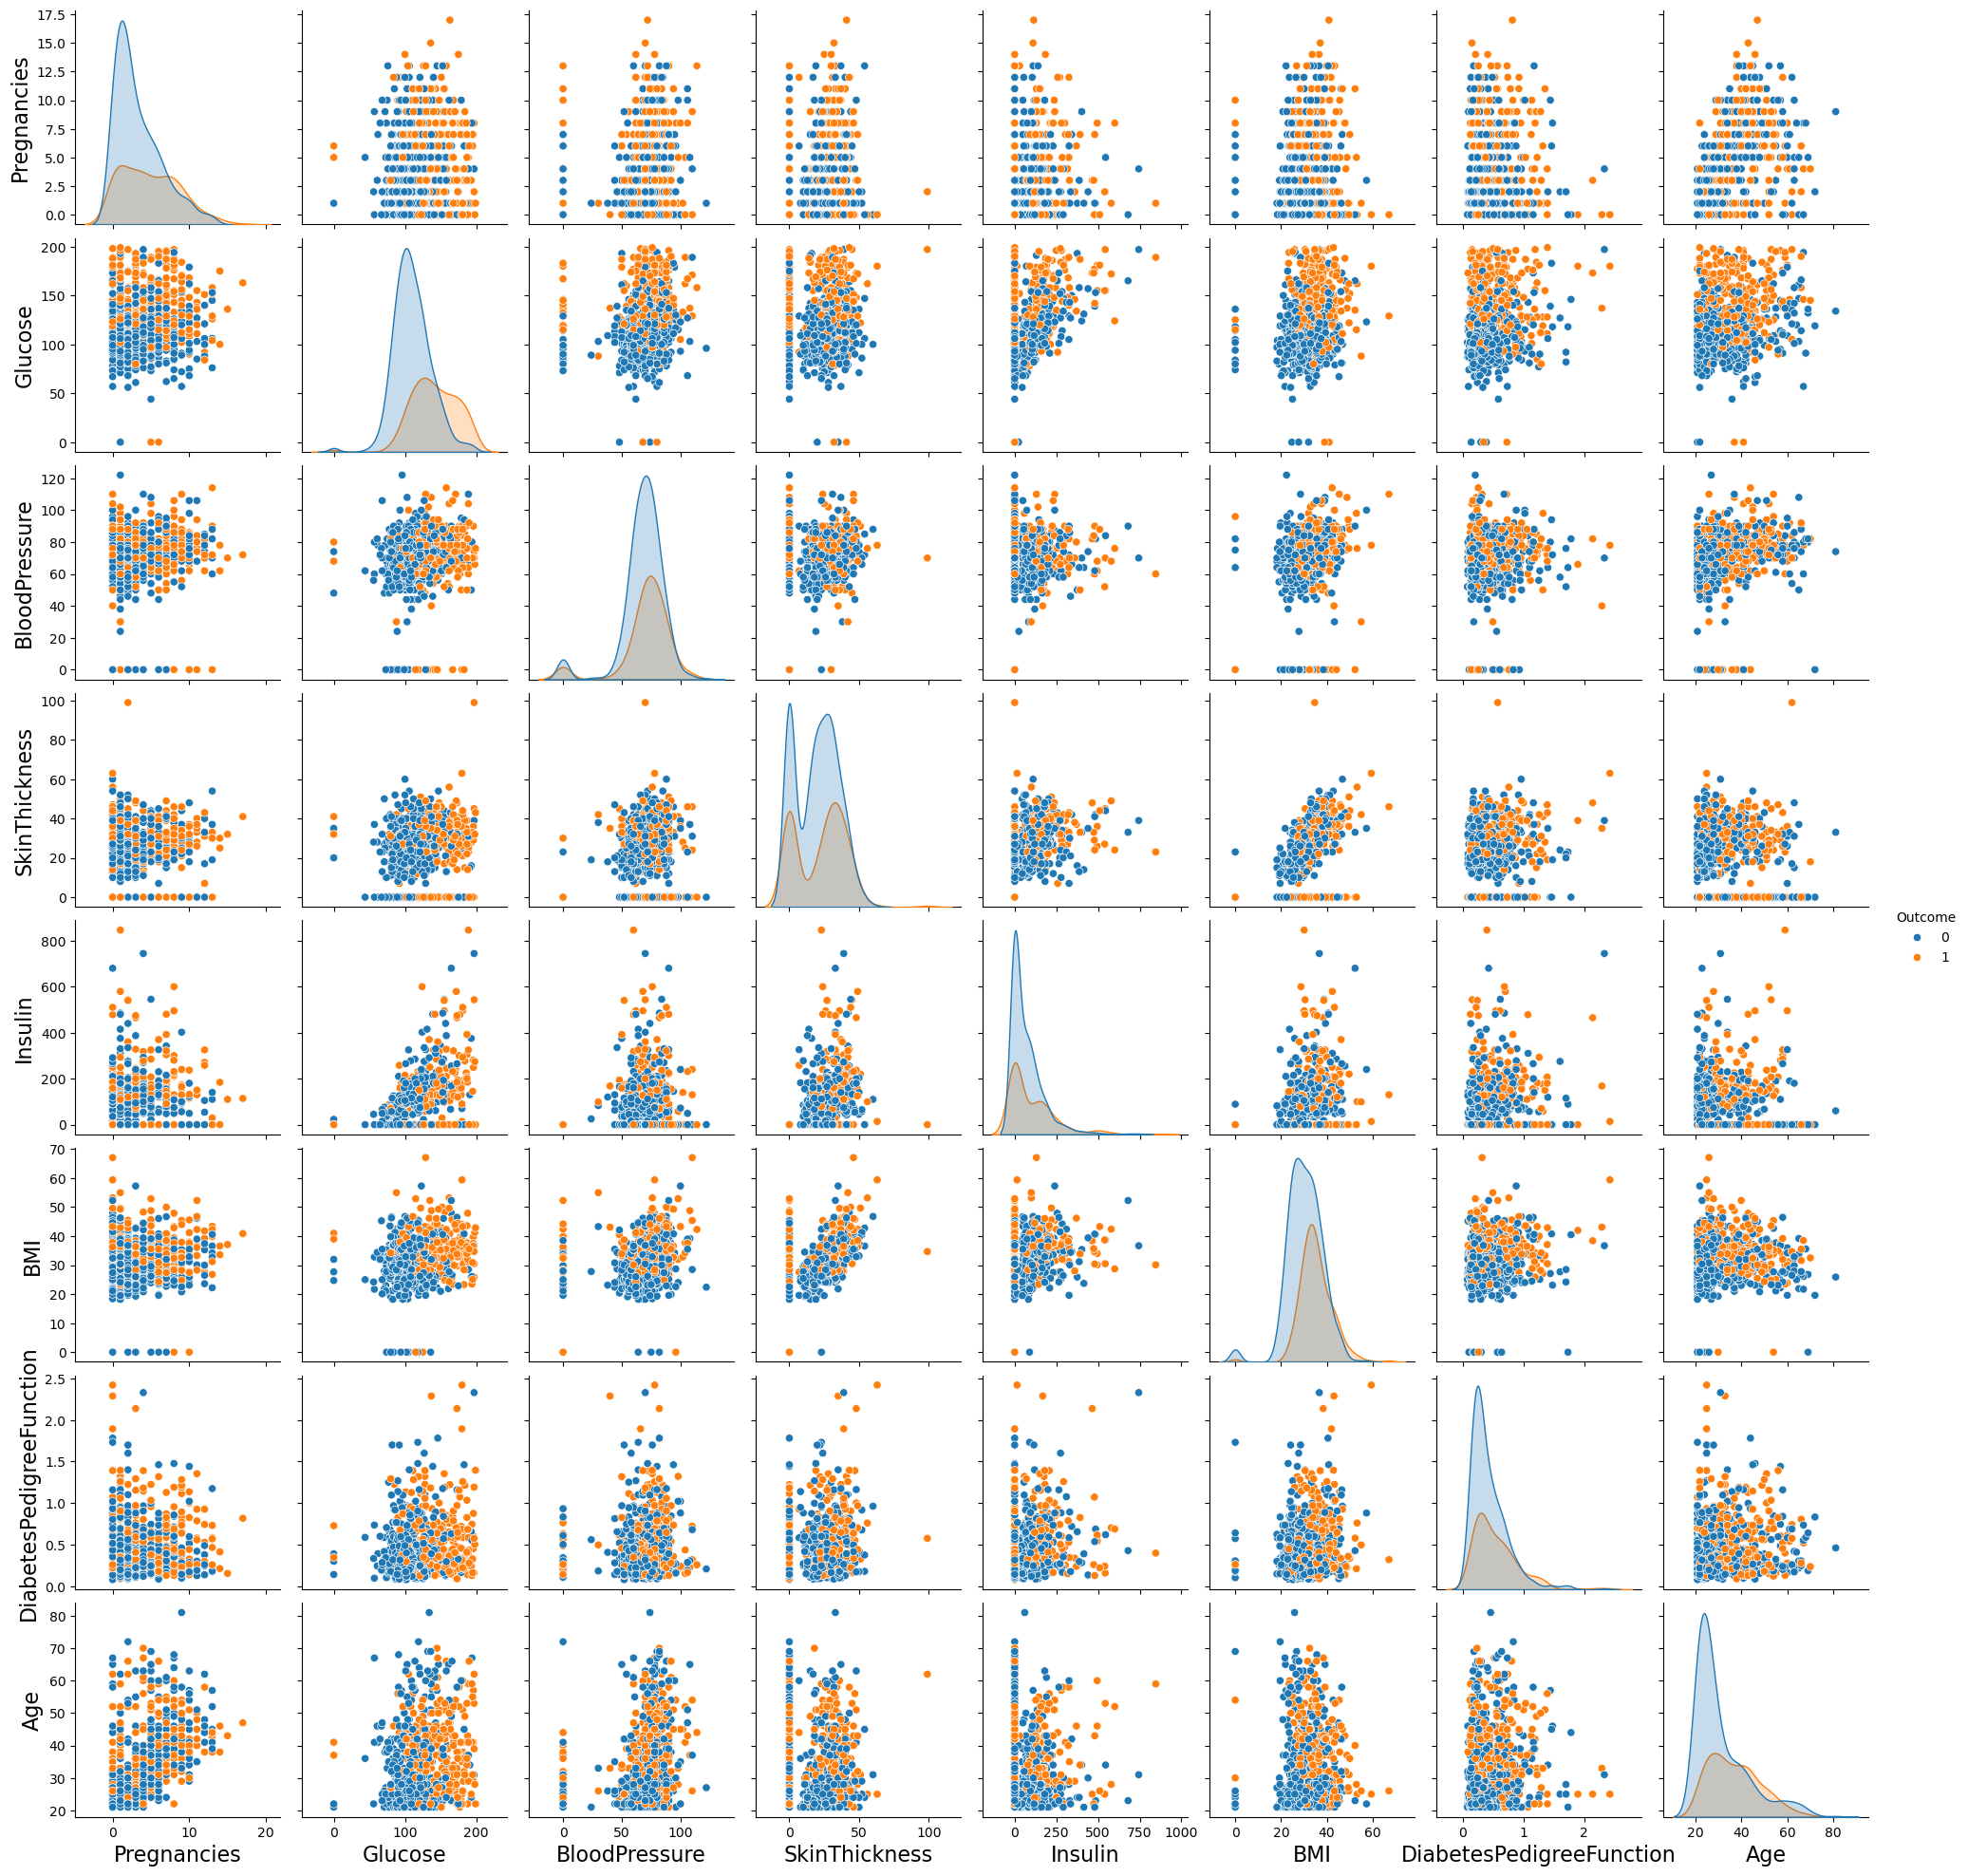

In [14]:
# pairplot of the dataframe to inspect patterns, correlations, and target
# class separartion

pairplot = sns.pairplot(df, hue='Outcome')

# set the font size for x and y axis labels
for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)

plt.show()

As noted with the histogram plot of the features, glucose and bmi are the most normally distrubted features.  Most are right skewed.  

There is some target class separation in feature combinations, including glucose vs age, glucose vs diabetes pedigree function, glucose vs blood pressure, glucose vs skin thickness, glucose vs BMI, glucose vs insulin, and to a lesser extent, BMI vs age.  Glucose seems to be an important feature for target class separation.  

None of the feature combinations show a substantial degree of correlation.  I will plot the correlation matrix to corroborate this observation.  

## Correlation plot
[top](#Contents)

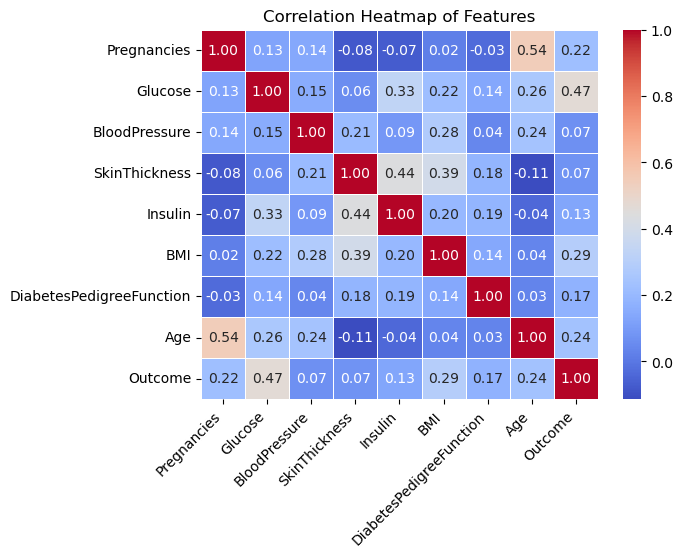

In [15]:
# look for correlation

sns.reset_defaults()

plt.figure
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt='.2f',linewidth=0.5)
plt.title('Correlation Heatmap of Features')
plt.xticks(rotation=45,ha='right')
plt.show()

The correlation map corroborates that there is little correlation between any two features.

## Mean feature values grouped by outcome
[top](#Contents)

In [16]:
# inspect how the mean values segragate with the target class
# 0 = no diabetes
# 1 = diabetes

mean_df = df.groupby('Outcome').mean()

# calculate the percent difference
percent_diff = ((mean_df.loc[1] - mean_df.loc[0])/mean_df.loc[0])*100

# add the row to the dataframe
mean_df.loc['% Dif'] = percent_diff

mean_df

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   
% Dif      47.534010   28.439228       3.872795      12.714499   45.853909   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164  
% Dif    15.965897                 28.102501  18.843104

The mean of all features are greater for those reported to have diabetes compared to those who are reported to not have diabetes

The difference (increase) is greatest for pregancies and insulin

Considering the following:
- A value of 0 for glucose, blood pressure, skin thickness, and bmi is biologically impossible.
- Rows with 0 values for insulin and skin thickness account for a substantial proportion of the total dataset, and these rows still contain other useful data.

I will impute 0 values instead of removing rows/observations for the following features:

- glucose
- blood pressure
- skin thickness
- insulin 
- bmi 

Since the data is asymmetric and several of these fatures (e.g. blood pressure, insulin, and bmi) have many outliers (prior to imputation), I will impute with the median value for each feature.

Thoughts about feature engineering:

I will try feature engineering in hopes of improving the predictive power of the model. Some features alone may not correlate well with a given class, but can be signifant when combined with other features.   
- age*glucose - this could improve the correlation between these important factors for diabetes by enhancing the affects at older age and higher glucose in a non-linear way, compared to each feature alone.
- glucose*BMI - the interaction of glucose and BMI may allow the model to better capture a potentially nonlinear effect of each individual feature.  
- insulin*BMI - similarly, the interaction of serum insulin levels and BMI could imrove the value of these features for predicting class.   
- glucose^2 - glucose has the highest correlation with outcome. 
- BMI^2 - visceral fat is measured at the waist is a better predictor of diabetes than either triceps skin thickness and BMI.  However, waist circumference is not a feature in this set.  BMI is a standard for predicting diabetes due to the ease and reliability of the measurements.
- glucose:insulin ratio - within the context of the 2 hour GTT, the ratio of insulin to glucose should be an indicator of either problems producing insulin (more of a type I issue) vs cellular absorption of glucose (type II).
- bin categories such as glucose, BMI, and insulin.  BMI doesn't have a strong correlation with outcome.  Perhaps binning features into categories will increase the performance of the model.

-- glucose (mg/dl)
https://diabetes.org/about-diabetes/diagnosis#:~:text=Diabetes%20is%20diagnosed%20at%20two,to%20be%20diagnosed%20as%20diabetes.
--- normal = <140 mg/dL
--- prediabetic = 140-199 mg/dL
--- diabetic = >=200 mg/dL

-- BMI (kg/m^2)
https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html
--- underweight: < 18.5 
--- healthy weight: >= 18.5 < 25
--- overweight: >= 25 < 30
--- obesity (class 1): >= 30 < 35
--- obesity (class 2): >=35 < 40
--- obesity (class 3): >=40

-- Insulin (uU/ml)
https://emedicine.medscape.com/article/2089224-overview?reg=1&form=fpf#a1
--- low: < 16
--- normal: >= 16 <= 166
--- high: > 166

# Split the data into training and test sets
[top](#Contents)

In [17]:
# split the data into training and test sets
X = df.drop('Outcome',axis=1)
y = df['Outcome'] 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (614, 8)
X_test shape: (154, 8)


## Data imbalance of train and test sets
[top](#Contents)

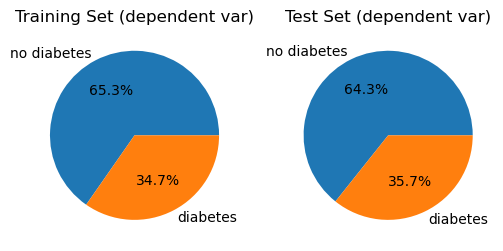

In [19]:
# check for data imbalance for the dependent variable of the train and test sets (0 = not diabetes, 1 = diabetes)

fig,ax = plt.subplots(1,2,figsize=(6,4))

y_train.value_counts().plot.pie(ax=ax[0],labels=['no diabetes', 'diabetes'],autopct='%1.1f%%')
ax[0].set_title('Training Set (dependent var)')
ax[0].set_ylabel('')

y_test.value_counts().plot.pie(ax=ax[1],labels=['no diabetes', 'diabetes'],autopct='%1.1f%%')
ax[1].set_title('Test Set (dependent var)')
ax[1].set_ylabel('')

plt.show()

The data is imbalanced with regard to the target variable.  But a 2:1 ratio isn't a substantial imbalance.  I will address this with StratitiedKFold() and balanced class weights when fitting the various models.   

In [20]:
# features to be imputed, where value(s) = 0 likely means missing values 
features_to_impute = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

# replace 0s with NaN
X_train[features_to_impute] = X_train[features_to_impute].replace(0,np.nan)
X_test[features_to_impute] = X_test[features_to_impute].replace(0,np.nan)

In [21]:
print(f'X_train NaN values: \n{X_train.isna().sum()}')
print(f'\nX_test NaN values: \n{X_test.isna().sum()}')

X_train NaN values: 
Pregnancies                   0
Glucose                       5
BloodPressure                24
SkinThickness               176
Insulin                     290
BMI                           7
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

X_test NaN values: 
Pregnancies                  0
Glucose                      0
BloodPressure               11
SkinThickness               51
Insulin                     84
BMI                          4
DiabetesPedigreeFunction     0
Age                          0
dtype: int64


In [22]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


# Preprocessing pipeline
[top](#Contents)

@ Define columns to transform
features_to_impute = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
features_to_logtransform = features_to_impute + ['Age']

@ custom interaction and polynomial feature engineering
def add_interaction_features(X):      
    X['GlucoseXAge'] = X['Glucose']*X['Age']
    X['GlucoseXBMI'] = X['Glucose']*X['BMI']
    X['GlucoseInsulinRatio'] = X['Glucose']/(X['Insulin']+1e-6)
    X['BMISqrd'] = X['BMI']**2
    X['GlucoseSqrd'] = X['Glucose']**2
    X['AgeSqrd'] = X['Age']**2
    return X

@ binning function
glucose_bins = [0,139,199,1000]
glucose_labels = ['Normal','Prediabetes','Diabetes']

bmi_bins = [0,18.5,24.9,29.9,34.9,39.9,1000]
bmi_labels = ['BMIunderweight','BMIhealthy','BMIoverweight','BMIobese1','BMIobese2','BMIobese3']

insulin_bins = [0,16,166,1000]
inuslin_labels = ['InuslinLow','InsulinNormal','InsulinHigh']

def bin_features(X):       
    X['GlucoseBins'] = pd.cut(X['Glucose'],bins=glucose_bins,labels=glucose_labels,right=False)
    X['BMIbins'] = pd.cut(X['BMI'],bins=bmi_bins,labels=bmi_labels,right=False)
    X['InsulinBins'] = pd.cut(X['Insulin'],bins=insulin_bins,labels=insulin_labels,right=False)
    return X


## Feature engineering classes
[top](#Contents)

In [23]:
# custom feature enginnering class
class AddInteractionFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):           
        X = X.copy()
        X['GlucoseXAge'] = X['Glucose']*X['Age']
        X['GlucoseXBMI'] = X['Glucose']*X['BMI']
        X['InsulinXBMI'] = X['Insulin']*X['BMI']
        X['GlucoseInsulinRatio'] = X['Glucose']/(X['Insulin']+1e-6)
        X['BMISqrd'] = X['BMI']**2
        X['GlucoseSqrd'] = X['Glucose']**2
        X['AgeSqrd'] = X['Age']**2
        return X

# custom binning function
class BinFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        glucose_bins = [0,139,199,1000]
        glucose_labels = ['Normal','Prediabetes','Diabetes']

        bmi_bins = [0,18.5,24.9,29.9,34.9,39.9,1000]
        bmi_labels = ['BMIunderweight','BMIhealthy','BMIoverweight','BMIobese1','BMIobese2','BMIobese3']

        insulin_bins = [0,16,166,1000]
        insulin_labels = ['InuslinLow','InsulinNormal','InsulinHigh']

        X = X.copy()
        X['GlucoseBins'] = pd.cut(X['Glucose'],bins=glucose_bins,labels=glucose_labels,right=False)
        X['BMIbins'] = pd.cut(X['BMI'],bins=bmi_bins,labels=bmi_labels,right=False)
        X['InsulinBins'] = pd.cut(X['Insulin'],bins=insulin_bins,labels=insulin_labels,right=False)
        return X

In [24]:
interaction_transformer = AddInteractionFeatures()
X_interaction = interaction_transformer.transform(X_train)
print(X_interaction.head())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2     84.0            NaN            NaN      NaN   NaN   
618            9    112.0           82.0           24.0      NaN  28.2   
346            1    139.0           46.0           19.0     83.0  28.7   
294            0    161.0           50.0            NaN      NaN  21.9   
231            6    134.0           80.0           37.0    370.0  46.2   

     DiabetesPedigreeFunction  Age  GlucoseXAge  GlucoseXBMI  InsulinXBMI  \
60                      0.304   21       1764.0          NaN          NaN   
618                     1.282   50       5600.0       3158.4          NaN   
346                     0.654   22       3058.0       3989.3       2382.1   
294                     0.254   65      10465.0       3525.9          NaN   
231                     0.238   46       6164.0       6190.8      17094.0   

     GlucoseInsulinRatio  BMISqrd  GlucoseSqrd  AgeSqrd  
60                   NaN      NaN 

In [25]:
bin_transformer = BinFeatures()
X_binned = bin_transformer.transform(X_train)
print(X_binned.head())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2     84.0            NaN            NaN      NaN   NaN   
618            9    112.0           82.0           24.0      NaN  28.2   
346            1    139.0           46.0           19.0     83.0  28.7   
294            0    161.0           50.0            NaN      NaN  21.9   
231            6    134.0           80.0           37.0    370.0  46.2   

     DiabetesPedigreeFunction  Age  GlucoseBins        BMIbins    InsulinBins  
60                      0.304   21       Normal            NaN            NaN  
618                     1.282   50       Normal  BMIoverweight            NaN  
346                     0.654   22  Prediabetes  BMIoverweight  InsulinNormal  
294                     0.254   65  Prediabetes     BMIhealthy            NaN  
231                     0.238   46       Normal      BMIobese3    InsulinHigh  


In [26]:
print(f'product of AddInterActionFeatures(): {type(X_interaction)}')
print(f'product of BinFeatures(): {type(X_binned)}')

product of AddInterActionFeatures(): <class 'pandas.core.frame.DataFrame'>
product of BinFeatures(): <class 'pandas.core.frame.DataFrame'>


## Column transformers
[top](#Contents)

In [27]:
# Define columns to transform
features_to_impute = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
features_to_logtransform = features_to_impute + ['Pregnancies','DiabetesPedigreeFunction','Age'] + ['GlucoseXAge','GlucoseXBMI',
                                                                                      'InsulinXBMI','GlucoseInsulinRatio','BMISqrd',
                                                                                      'GlucoseSqrd','AgeSqrd']
features_to_encode = ['GlucoseBins','BMIbins','InsulinBins']

# Define the preprocessing transformers and sequence

# step 1: Impute missing values
preprocess_impute = ColumnTransformer(
    transformers=[('impute', SimpleImputer(missing_values=np.nan,strategy='median'), features_to_impute)],
    remainder='passthrough',
    verbose_feature_names_out=False,  # Disable renaming
    force_int_remainder_cols=False # avoid future column name issues
).set_output(transform='pandas')

# step 2: AddInteractionFeatures() class
# step 3: BinFeatures() class

# step 4: encode binned features
preprocess_encode = ColumnTransformer(
    transformers=[('encode', OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False), features_to_encode)],
    remainder='passthrough',
    verbose_feature_names_out=False,  # Disable renaming
    force_int_remainder_cols=False # avoid future column name issues
).set_output(transform='pandas')

# step 5: log-transform
preprocess_logtransform = ColumnTransformer(
    transformers=[('log', FunctionTransformer(np.log1p, validate=False), features_to_logtransform)],
    remainder='passthrough',
    verbose_feature_names_out=False,  # Disable renaming
    force_int_remainder_cols=False # avoid future column name issues
).set_output(transform='pandas')

# step 6: scale
preprocess_scale = ColumnTransformer(
    transformers=[('scale', StandardScaler(), features_to_logtransform)],
    remainder='passthrough',
    verbose_feature_names_out=False,  # Disable renaming
    force_int_remainder_cols=False # avoid future column name issues
).set_output(transform='pandas')

preprocessor_pipeline = Pipeline(steps=[
    ('impute',preprocess_impute),
    ('add_interaction', AddInteractionFeatures()),
    ('bin_features',BinFeatures()),
    ('encode',preprocess_encode),
    ('log_transform',preprocess_logtransform),
    ('scale',preprocess_scale)])

preprocessor_pipeline

Pipeline(steps=[('impute',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='median'),
                                                  ['Glucose', 'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI'])],
                                   verbose_feature_names_out=False)),
                ('add_interaction', AddInteractionFeatures()),
                ('bin_features', BinFeatures()),
                ('encode',
                 ColumnTransf...
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  ['Glucose', 'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI', 'Pregnancies',
                                                   'DiabetesPedigreeFunction',
                                                   'Age', 'GlucoseXAge',
                                                   'GlucoseXBMI', 'InsulinXBMI',
                                                   'GlucoseInsulinRatio',
                                                   'BMISqrd', 'GlucoseSqrd',
                                                   'AgeSqrd'])],
                                   verbose_feature_names_out=False))])

### Check output after each preprocessing step
[top](#Contents)

In [28]:
# Step 0: before any preprocessing
print(f'Before preprocessing:\n{X_train[:5]}')

# Step 1: Imputation
imputedData = preprocess_impute.fit_transform(X_train)
print(f'\nAfter Imputation:\n{imputedData[:5]}')

# Step 2: Interaction features
interactionData = AddInteractionFeatures().fit_transform(imputedData)
print(f'\nAfter Interaction Features:\n{interactionData[:5]}')

# Step 3: Binning features
binnedData = BinFeatures().fit_transform(interactionData)
print(f'After Binning Features:\n{binnedData[:5]}')

# Step 4: Encoding binned features
encodedData = preprocess_encode.fit_transform(binnedData)
print(f'After Encoding Binned Features:\n{encodedData[:5]}')

# Step 5: log transformation
logtransformedData = preprocess_logtransform.fit_transform(encodedData)
print(f'After Log Transforming Features:\n{logtransformedData[:5]}')

# Step 6: Scaling
scaledData = preprocess_scale.fit_transform(logtransformedData)
print(f'After Scaling Features:\n{scaledData[:5]}')

Before preprocessing:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2     84.0            NaN            NaN      NaN   NaN   
618            9    112.0           82.0           24.0      NaN  28.2   
346            1    139.0           46.0           19.0     83.0  28.7   
294            0    161.0           50.0            NaN      NaN  21.9   
231            6    134.0           80.0           37.0    370.0  46.2   

     DiabetesPedigreeFunction  Age  
60                      0.304   21  
618                     1.282   50  
346                     0.654   22  
294                     0.254   65  
231                     0.238   46  

After Imputation:
     Glucose  BloodPressure  SkinThickness  Insulin   BMI  Pregnancies  \
60      84.0           72.0           28.5    120.0  32.0            2   
618    112.0           82.0           24.0    120.0  28.2            9   
346    139.0           46.0           19.0     83.0  28.7            1

In [29]:
transformed_data = preprocessor_pipeline.fit_transform(X_train)
print(f'fully transformed data before logistic regression: \n{transformed_data}')

fully transformed data before logistic regression: 
      Glucose  BloodPressure  SkinThickness   Insulin       BMI  Pregnancies  \
60  -1.387002       0.065172       0.135788 -0.019069  0.051625    -0.248402   
618 -0.220110       0.800045      -0.400855 -0.019069 -0.544335     1.320361   
346  0.657936      -2.455238      -1.124348 -0.759042 -0.461627    -0.776718   
294  1.256077      -1.987700       0.135788 -0.019069 -1.728237    -1.679881   
231  0.508896       0.660425       0.956718  2.252530  1.795028     0.855618   
..        ...            ...            ...       ...       ...          ...   
71   0.657936      -0.599242       0.781418  0.291071 -0.478056     0.654761   
106 -0.845802       3.051603       0.135788 -0.019069 -1.623019    -0.776718   
270 -0.639822       1.069467       0.956718 -0.019069  1.732707     1.444550   
435  0.716067       0.065172       0.135788 -0.019069  1.386151    -1.679881   
102  0.226153       1.692270       0.135788 -0.019069 -1.602246    -

In [30]:
print(pd.DataFrame(transformed_data).isnull().sum())

Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
Pregnancies                  0
DiabetesPedigreeFunction     0
Age                          0
GlucoseXAge                  0
GlucoseXBMI                  0
InsulinXBMI                  0
GlucoseInsulinRatio          0
BMISqrd                      0
GlucoseSqrd                  0
AgeSqrd                      0
GlucoseBins_Normal           0
GlucoseBins_Prediabetes      0
BMIbins_BMIobese1            0
BMIbins_BMIobese2            0
BMIbins_BMIobese3            0
BMIbins_BMIoverweight        0
BMIbins_BMIunderweight       0
InsulinBins_InsulinNormal    0
InsulinBins_InuslinLow       0
dtype: int64


In [31]:
print(np.isinf(pd.DataFrame(transformed_data)).sum())

Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
Pregnancies                  0
DiabetesPedigreeFunction     0
Age                          0
GlucoseXAge                  0
GlucoseXBMI                  0
InsulinXBMI                  0
GlucoseInsulinRatio          0
BMISqrd                      0
GlucoseSqrd                  0
AgeSqrd                      0
GlucoseBins_Normal           0
GlucoseBins_Prediabetes      0
BMIbins_BMIobese1            0
BMIbins_BMIobese2            0
BMIbins_BMIobese3            0
BMIbins_BMIoverweight        0
BMIbins_BMIunderweight       0
InsulinBins_InsulinNormal    0
InsulinBins_InuslinLow       0
dtype: int64


In [32]:
print(y_train.isnull().sum())

0


In [33]:
print(np.isinf(y_train).sum())

0


After splitting the dataframe with train_test_split and applying the preprocessing transformations, neither X_train nor y_train have NaN or infinite values.  

# Model evaluations
[top](#Contents)

## Logistic regression
[top](#Contents)

In [34]:
pipeline_full_lr = Pipeline(steps=[
    ('preprocessor',preprocessor_pipeline),
    ('lr',LogisticRegression(random_state=42)
    )])

pipeline_full_lr

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('impute',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    remainder='passthrough',
                                                    transformers=[('impute',
                                                                   SimpleImputer(strategy='median'),
                                                                   ['Glucose',
                                                                    'BloodPressure',
                                                                    'SkinThickness',
                                                                    'Insulin',
                                                                    'BMI'])],
                                                    verbose_feature_names_out=False)),
                                 ('add_interaction', AddInteractionFeatures()),
                                 ('bin_features', BinFe...
                                                    remainder='passthrough',
                                                    transformers=[('scale',
                                                                   StandardScaler(),
                                                                   ['Glucose',
                                                                    'BloodPressure',
                                                                    'SkinThickness',
                                                                    'Insulin',
                                                                    'BMI',
                                                                    'Pregnancies',
                                                                    'DiabetesPedigreeFunction',
                                                                    'Age',
                                                                    'GlucoseXAge',
                                                                    'GlucoseXBMI',
                                                                    'InsulinXBMI',
                                                                    'GlucoseInsulinRatio',
                                                                    'BMISqrd',
                                                                    'GlucoseSqrd',
                                                                    'AgeSqrd'])],
                                                    verbose_feature_names_out=False))])),
                ('lr', LogisticRegression(random_state=42))])

In [35]:
pipeline_full_lr = Pipeline(steps=[
    ('preprocessor',preprocessor_pipeline),
    ('lr',LogisticRegression(random_state=42)
    )])

# fit the pipeline
model_lr = pipeline_full_lr.fit(X_train,y_train)

# predict using the fitted model
y_train_pred_lr = model_lr.predict(X_train)
y_test_pred_lr = model_lr.predict(X_test)

# get the prediction probabilities
y_train_proba_lr = model_lr.predict_proba(X_train)
y_test_proba_lr = model_lr.predict_proba(X_test)

### Performance metrics
[top](#Contents)

In [36]:
# AUC score 

print(f'AUC score for the logistic regression model with default parameters')
print(f'train data: {roc_auc_score(y_train,y_train_proba_lr[:,1]):.3f}')
print(f'test data: {roc_auc_score(y_test,y_test_proba_lr[:,1]):.3f}')

AUC score for the logistic regression model with default parameters
train data: 0.860
test data: 0.819


In [37]:
# classification report 

print('classification report for the logistic regression model with default parameters')
print(f'\ntrain data: \n{classification_report(y_train,y_train_pred_lr)}')
print(f'\ntest data: \n{classification_report(y_test,y_test_pred_lr)}')

classification report for the logistic regression model with default parameters

train data: 
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       401
           1       0.72      0.62      0.66       213

    accuracy                           0.78       614
   macro avg       0.76      0.74      0.75       614
weighted avg       0.78      0.78      0.78       614


test data: 
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        99
           1       0.65      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154



In [38]:
# confusion matrix

print(f'confusion matrix for the logistic regression model with default parameters')
print(f'\ntrain data: \n{confusion_matrix(y_train,y_train_pred_lr)}')
print(f'\ntest data: \n{confusion_matrix(y_test,y_test_pred_lr)}')

confusion matrix for the logistic regression model with default parameters

train data: 
[[349  52]
 [ 82 131]]

test data: 
[[81 18]
 [21 34]]


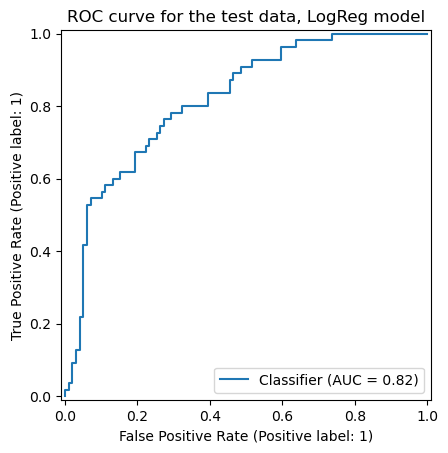

In [39]:
# ROC curve for test data
RocCurveDisplay.from_predictions(y_test,y_test_proba_lr[:,1])
plt.title('ROC curve for the test data, LogReg model')
plt.show()

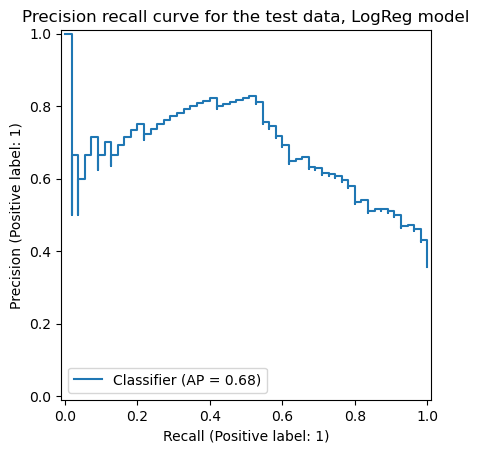

In [40]:
# precision recall curve for test data
PrecisionRecallDisplay.from_predictions(y_test,y_test_proba_lr[:,1])
plt.title('Precision recall curve for the test data, LogReg model')
plt.show()

### SHAP analysis 
[top](#Contents)

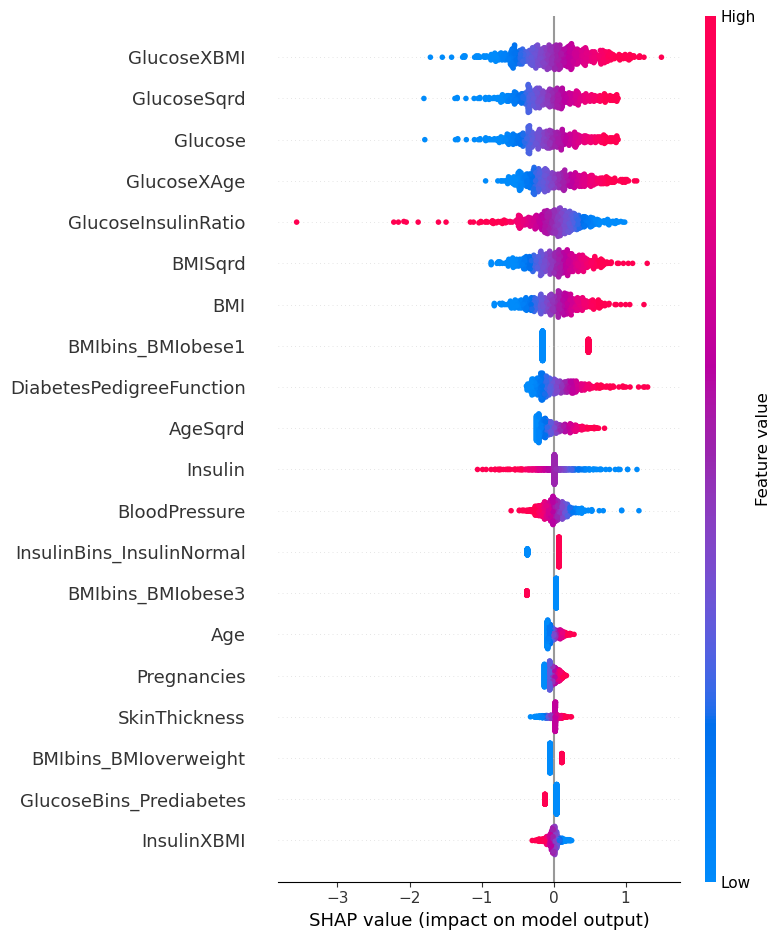

In [41]:
# SHAP analysis of the default logistic regression model

# extract the preprocessor and logistic regression model
preprocessor_lr = model_lr.named_steps['preprocessor']
lr_model = model_lr.named_steps['lr']

# prepare the data for SHAP
X_train_transformed_lr = preprocessor_lr.transform(X_train)

# initialize SHAP explainer
explainer_lr = shap.Explainer(lr_model,X_train_transformed_lr)

# calculate SHAP values for the training set
shap_values_lr = explainer_lr(X_train_transformed_lr)

# beeswarm plot
shap.summary_plot(shap_values_lr,X_train_transformed_lr)

### Hyperparameter tuning with gridsearch
[top](#Contents)

L1 penalty AUC score: 0.85

L1 penalty best parameters: 
{'lr__C': 550, 'lr__class_weight': 'balanced', 'lr__max_iter': 500, 'lr__penalty': 'l1', 'lr__random_state': 42, 'lr__solver': 'liblinear'}

L2 penalty AUC score: 0.85

L2 penalty best parameters: 
{'lr__C': 0.075, 'lr__class_weight': 'balanced', 'lr__max_iter': 500, 'lr__penalty': 'l2', 'lr__random_state': 42, 'lr__solver': 'lbfgs'}

In [252]:
# perform a grid search to find the best hyperparameters for the logistic regression model

parameters_l1 = {
    'lr__C':[500, 550, 600, 1000],
    'lr__penalty':['l1'],
    'lr__solver':['liblinear','saga'],
    'lr__class_weight':['balanced'],
    'lr__random_state':[42],
    'lr__max_iter':[500]
}

parameters_l2 = {
    'lr__C':[0.05, 0.075, 0.1, 0.15, 0.2, 0.5],
    'lr__penalty':['l2'],
    'lr__solver':['liblinear','saga','newton-cg','lbfgs'],
    'lr__class_weight':['balanced'],
    'lr__random_state':[42],
    'lr__max_iter':[500]
}

# Use StratifiedKFold for better handling of class imbalance
cv = StratifiedKFold(n_splits=10)

gs_l1 = GridSearchCV(
    estimator=pipeline_full_lr,
    param_grid=parameters_l1,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

gs_l2 = GridSearchCV(
    estimator=pipeline_full_lr,
    param_grid=parameters_l2,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# get the start time
start_time = time.time()

gs_l1.fit(X_train,y_train)
gs_l2.fit(X_train,y_train)

# get the end and elapsed time
end_time = time.time()
elapsed_time = end_time - start_time

# best score and parameters
best_aucscore_l1_lr = gs_l1.best_score_
best_parameters_l1_lr = gs_l1.best_params_

best_aucscore_l2_lr = gs_l2.best_score_
best_parameters_l2_lr = gs_l2.best_params_

best_model_l1_lr = gs_l1.best_estimator_
best_model_l2_lr = gs_l2.best_estimator_

print(f'L1 penalty AUC score: {best_aucscore_l1_lr:.2f}')
print(f'\nL1 penalty best parameters: \n{best_parameters_l1_lr}')
print(f'\nL2 penalty AUC score: {best_aucscore_l2_lr:.2f}')
print(f'\nL2 penalty best parameters: \n{best_parameters_l2_lr}')

print(f'\nelapsed time: {elapsed_time:.2f} seconds')

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 24 candidates, totalling 240 fits
L1 penalty AUC score: 0.85

L1 penalty best parameters: 
{'lr__C': 550, 'lr__class_weight': 'balanced', 'lr__max_iter': 500, 'lr__penalty': 'l1', 'lr__random_state': 42, 'lr__solver': 'liblinear'}

L2 penalty AUC score: 0.85

L2 penalty best parameters: 
{'lr__C': 0.075, 'lr__class_weight': 'balanced', 'lr__max_iter': 500, 'lr__penalty': 'l2', 'lr__random_state': 42, 'lr__solver': 'lbfgs'}

elapsed time: 9.27 seconds


In [253]:
# apply the gridsearch best parameters to predict the independent variable (diabetes)

y_train_pred_l1 = gs_l1.predict(X_train)
y_test_pred_l1 = gs_l1.predict(X_test)

y_train_proba_l1 = gs_l1.predict_proba(X_train)
y_test_proba_l1 = gs_l1.predict_proba(X_test)

print(f'train ROC-AUC score L1 penalty: {roc_auc_score(y_train,y_train_proba_l1[:,1]):.3f}')
print(f'test ROC-AUC score L1 penalty: {roc_auc_score(y_test,y_test_proba_l1[:,1]):.3f}')

train ROC-AUC score L1 penalty: 0.866
test ROC-AUC score L1 penalty: 0.831


In [254]:
y_train_pred_l2 = gs_l2.predict(X_train)
y_test_pred_l2 = gs_l2.predict(X_test)

y_train_proba_l2 = gs_l2.predict_proba(X_train)
y_test_proba_l2 = gs_l2.predict_proba(X_test)

print(f'train ROC-AUC score, L2 penalty: {roc_auc_score(y_train,y_train_proba_l2[:,1]):.3f}')
print(f'test ROC-AUC score, L2 penalty: {roc_auc_score(y_test,y_test_proba_l2[:,1]):.3f}')

train ROC-AUC score, L2 penalty: 0.858
test ROC-AUC score, L2 penalty: 0.818


The grid search with L1 regularization improved the performance of the model with regard to the test data and overfitting.  

### Classification reports
[top](#Contents)

In [255]:
# classification report for tuned LR model with L1 penalty

print(f'classification report for tuned logistic regression model with L1 reg')
print(f'\ntrain data, L1: \n{classification_report(y_train,y_train_pred_l1)}')
print(f'\ntest data, L1: \n{classification_report(y_test,y_test_pred_l1)}')

classification report for tuned logistic regression model with L1 reg

train data, L1: 
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       401
           1       0.63      0.78      0.70       213

    accuracy                           0.76       614
   macro avg       0.75      0.77      0.75       614
weighted avg       0.78      0.76      0.77       614


test data, L1: 
              precision    recall  f1-score   support

           0       0.86      0.71      0.78        99
           1       0.60      0.80      0.69        55

    accuracy                           0.74       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.77      0.74      0.75       154



In [256]:
# classification report for tuned LR model with L2 penalty

print(f'classification report for tuned logistic regression model with L2 reg')
print(f'\ntrain data, L2: \n{classification_report(y_train,y_train_pred_l2)}')
print(f'\ntest data, L2: \n{classification_report(y_test,y_test_pred_l2)}')

classification report for tuned logistic regression model with L2 reg

train data, L2: 
              precision    recall  f1-score   support

           0       0.88      0.76      0.82       401
           1       0.64      0.81      0.71       213

    accuracy                           0.78       614
   macro avg       0.76      0.78      0.76       614
weighted avg       0.80      0.78      0.78       614


test data, L2: 
              precision    recall  f1-score   support

           0       0.84      0.69      0.76        99
           1       0.58      0.76      0.66        55

    accuracy                           0.71       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.71      0.72       154



The logistic regression with L1 reggularization has better perforrmance with regards to overfitting

### Confusion matrices
[top](#Contents)

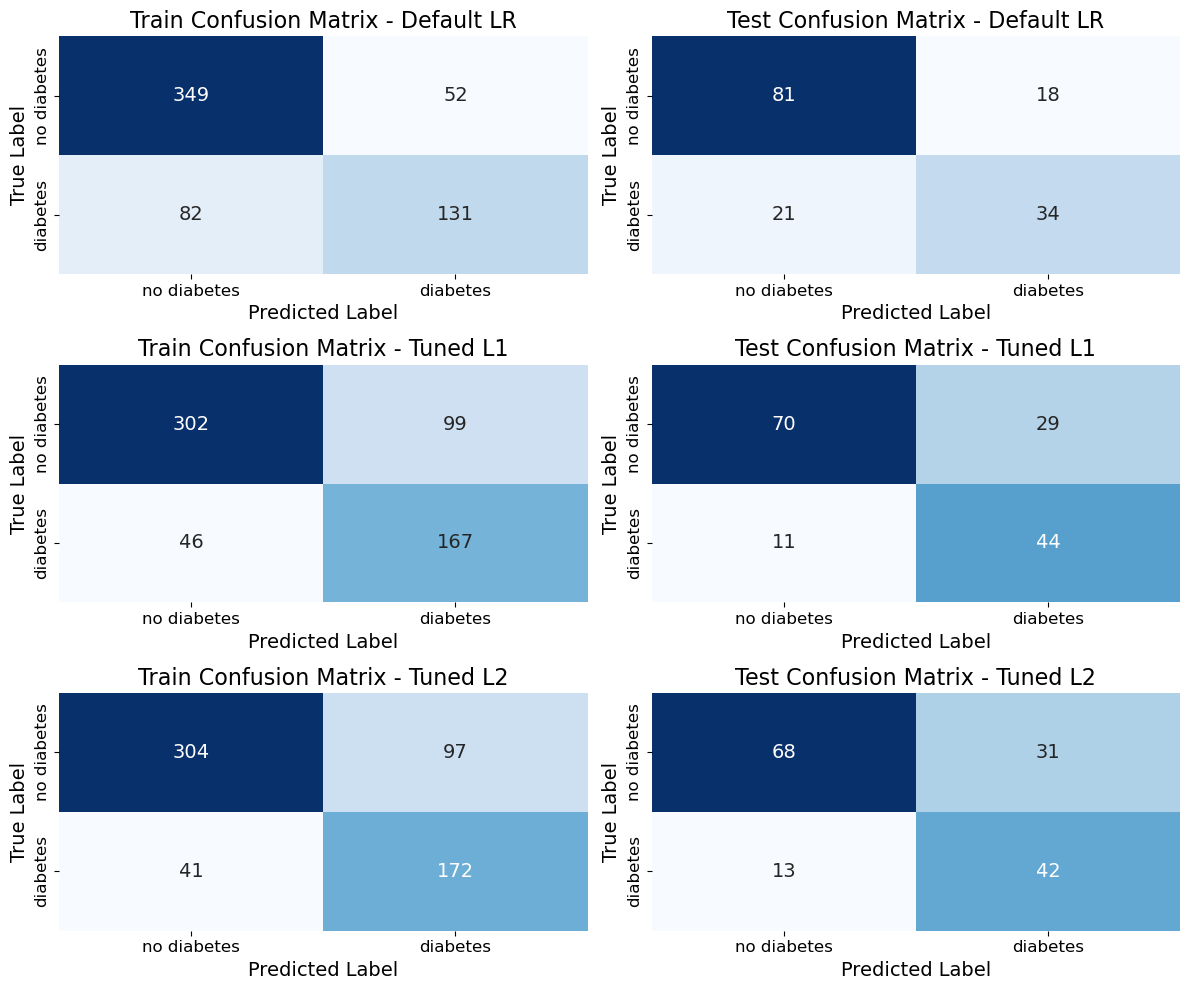

In [257]:
# confusion matrices

# calculate the confusion matrices
cm_lr_train = confusion_matrix(y_train,y_train_pred_lr)
cm_lr_test = confusion_matrix(y_test,y_test_pred_lr)

cm_l1_train = confusion_matrix(y_train,y_train_pred_l1)
cm_l1_test = confusion_matrix(y_test,y_test_pred_l1)

cm_l2_train = confusion_matrix(y_train,y_train_pred_l2)
cm_l2_test = confusion_matrix(y_test,y_test_pred_l2)

# set up the figure
fig,axes = plt.subplots(3,2,figsize=(12,10))

# a function to create a heatmap for the confusion matrices
def plot_cm(cm,ax,title):
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',ax=ax,cbar=False,
                xticklabels=['no diabetes','diabetes'],yticklabels=['no diabetes','diabetes'],
               annot_kws={'size':14})
    ax.set_xlabel('Predicted Label',fontsize=14)
    ax.set_ylabel('True Label',fontsize=14)
    ax.set_title(title,fontsize=16)
    ax.tick_params(axis='both',labelsize=12)

plot_cm(cm_lr_train,axes[0,0], 'Train Confusion Matrix - Default LR')
plot_cm(cm_lr_test,axes[0,1], 'Test Confusion Matrix - Default LR')

plot_cm(cm_l1_train,axes[1,0], 'Train Confusion Matrix - Tuned L1')
plot_cm(cm_l1_test,axes[1,1], 'Test Confusion Matrix - Tuned L1')

plot_cm(cm_l2_train,axes[2,0], 'Train Confusion Matrix - Tuned L2')
plot_cm(cm_l2_test,axes[2,1], 'Test Confusion Matrix - Tuned L2')

plt.tight_layout() 
plt.show()

# order of values:
# TN FP
# FN TP

The logistic regression model with L1 (lasso) regularization overfits less than where L2 (ridge) retularization is applied.  L2 penalty leads to better recall scores for class 1, though with a reduction in precision compared to to the LR model with default parameters (which applies the L2 penalty).

### ROC curves
[top](#Contents)

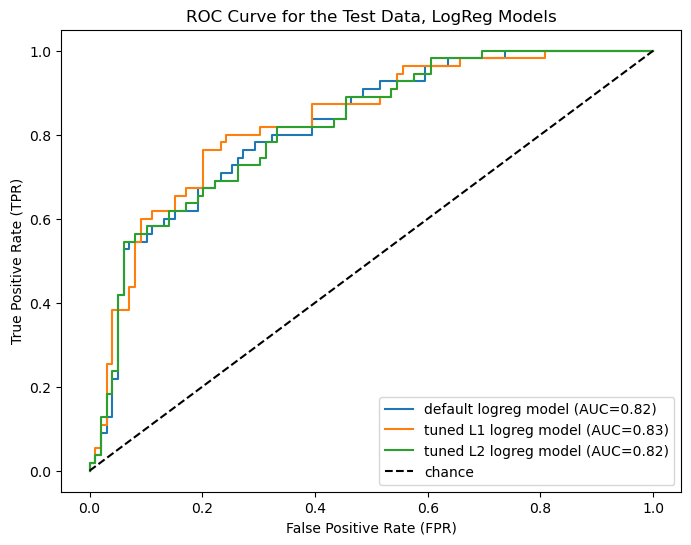

In [258]:
# ROC curves of the test data for three logistic regression models
fpr_lr,tpr_lr,_ = roc_curve(y_test,y_test_proba_lr[:,1])
fpr_l1,tpr_l1,_ = roc_curve(y_test,y_test_proba_l1[:,1])
fpr_l2,tpr_l2,_ = roc_curve(y_test,y_test_proba_l2[:,1])

# calculate the AUC scores
auc_lr = roc_auc_score(y_test,y_test_proba_lr[:,1])
auc_l1 = roc_auc_score(y_test,y_test_proba_l1[:,1])
auc_l2 = roc_auc_score(y_test,y_test_proba_l2[:,1])

plt.figure(figsize=(8,6))

plt.plot(fpr_lr,tpr_lr, label=f'default logreg model (AUC={auc_lr:.2f})')
plt.plot(fpr_l1,tpr_l1, label=f'tuned L1 logreg model (AUC={auc_l1:.2f})')
plt.plot(fpr_l2,tpr_l2, label=f'tuned L2 logreg model (AUC={auc_l2:.2f})')

# plot the chance line
plt.plot([0,1],[0,1], 'k--',label='chance')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.title('ROC Curve for the Test Data, LogReg Models')

plt.show()

### Precision recall curves
[top](#Contents)

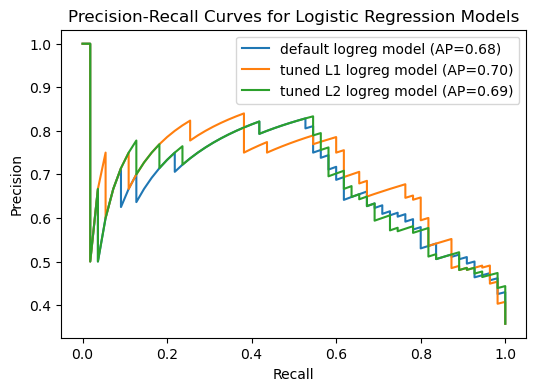

In [259]:
# precision recall curves of the test data for three logistic regression models

# get precision-recall values for each model
precision_lr,recall_lr,_ = precision_recall_curve(y_test,y_test_proba_lr[:,1])
precision_l1,recall_l1,_ = precision_recall_curve(y_test,y_test_proba_l1[:,1])
precision_l2,recall_l2,_ = precision_recall_curve(y_test,y_test_proba_l2[:,1])

# calculate the average precision (AP) scores for each model
ap_lr = average_precision_score(y_test,y_test_proba_lr[:,1])
ap_l1 = average_precision_score(y_test,y_test_proba_l1[:,1])
ap_l2 = average_precision_score(y_test,y_test_proba_l2[:,1])

# plot
plt.figure(figsize=(6,4))

plt.plot(recall_lr,precision_lr,label=f'default logreg model (AP={ap_lr:.2f})')
plt.plot(recall_l1,precision_l1,label=f'tuned L1 logreg model (AP={ap_l1:.2f})')
plt.plot(recall_l2,precision_l2,label=f'tuned L2 logreg model (AP={ap_l2:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Logistic Regression Models')

plt.legend()
plt.show()

### Interpretation of metrics
[top](#Contents)

For a classification model to predict diabetes, recall is the more important metric.  Precision is the number of tp/(tp+fp), while recall is the number of tp/(tp+fn).  A higher recall score means that fewer false negatives are predicted, and therefore, fewer people who do have diabetes would remain unidentified.  The consequences of untreated diabetes is greater than treating someone without diabetes.  

Since recall is most significant here, the tuned logistic regression model with L1 regularization performs the best and significantly better than the the logistic regression model with default hyperparameters.  

The ROC curves and AUC scores suggest that all models perform reasonbly well and about the same with regard to distinguishing true positives from false positives.  However, the tuned logreg model with L1 regularization performed the best of the three models based on the curve and AUC score.  

The precision-recall curves are useful here since the number of postivive cases (1s) for diabetes is ~30% of the total outcomes and correctly identifying those at risk for diabetes is more important than predicting no diabetes. An AP score of 0.70 isn't great but suggests that the model is capturing a significant portion of the postive instances with a reasonable level of precision. 

Conclusion:  There is room for improvement.

### Feature importance 
[top](#Contents)

In [260]:
# visualize feature importance for the tuned logistic regression model

# get feature names.  Note that feature names are available after fit_transforming the data to the preprocoessor pipeline
transformed_data = preprocessor_pipeline.fit_transform(X_train) 
# note, the code above was already run in the 'Check output after each preprocessing step' section. repeating 
# here for readibility

# convert the transformed data into a DataFrame with column names
transformed_data_df = pd.DataFrame(transformed_data)

feature_names = transformed_data_df.columns
print(feature_names)

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'Pregnancies', 'DiabetesPedigreeFunction', 'Age', 'GlucoseXAge',
       'GlucoseXBMI', 'InsulinXBMI', 'GlucoseInsulinRatio', 'BMISqrd',
       'GlucoseSqrd', 'AgeSqrd', 'GlucoseBins_Normal',
       'GlucoseBins_Prediabetes', 'BMIbins_BMIobese1', 'BMIbins_BMIobese2',
       'BMIbins_BMIobese3', 'BMIbins_BMIoverweight', 'BMIbins_BMIunderweight',
       'InsulinBins_InsulinNormal', 'InsulinBins_InuslinLow'],
      dtype='object')


In [261]:
# visualize feature importance for the logistic regression model
    
# extract coefficients
coefficients_l1_lr = best_model_l1_lr.named_steps['lr'].coef_[0]

# create a dataframe to associate featuers with their coefficients
feature_importance_l1_lr = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients_l1_lr
})

# sort by absolute value of coefficients
feature_importance_l1_lr['abs_coefficient'] = feature_importance_l1_lr['coefficient'].abs()
feature_importance_l1_lr = feature_importance_l1_lr.sort_values(by='abs_coefficient',ascending=False)

feature_importance_l1_lr

feature  coefficient  abs_coefficient
7                         Age   -68.149965        68.149965
14                    AgeSqrd    44.573534        44.573534
8                 GlucoseXAge    34.454270        34.454270
10                InsulinXBMI    16.180316        16.180316
3                     Insulin   -14.207532        14.207532
0                     Glucose   -10.093412        10.093412
4                         BMI    -8.748237         8.748237
13                GlucoseSqrd    -7.224805         7.224805
23     InsulinBins_InuslinLow     6.020094         6.020094
12                    BMISqrd     3.793752         3.793752
16    GlucoseBins_Prediabetes    -2.950400         2.950400
15         GlucoseBins_Normal    -2.792002         2.792002
21     BMIbins_BMIunderweight    -1.671060         1.671060
17          BMIbins_BMIobese1     0.639924         0.639924
22  InsulinBins_InsulinNormal     0.543039         0.543039
11        GlucoseInsulinRatio    -0.506505         0.506505
19          BMIbins_BMIobese3    -0.401207         0.401207
6    DiabetesPedigreeFunction     0.315687         0.315687
20      BMIbins_BMIoverweight     0.275907         0.275907
1               BloodPressure    -0.211135         0.211135
2               SkinThickness     0.090831         0.090831
18          BMIbins_BMIobese2    -0.032341         0.032341
5                 Pregnancies     0.031759         0.031759
9                 GlucoseXBMI     0.000000         0.000000

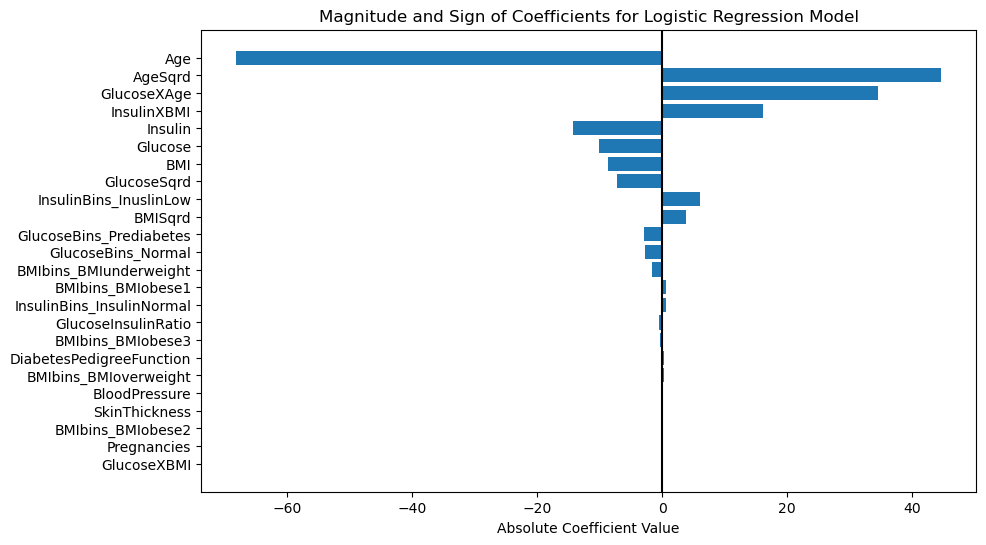

In [262]:
# plot the feature importances 

plt.figure(figsize=(10,6))
plt.barh(feature_importance_l1_lr['feature'],feature_importance_l1_lr['coefficient'])
plt.xlabel('Absolute Coefficient Value')
plt.axvline(x=0,color='black')
plt.title('Magnitude and Sign of Coefficients for Logistic Regression Model')
plt.gca().invert_yaxis()
plt.show()

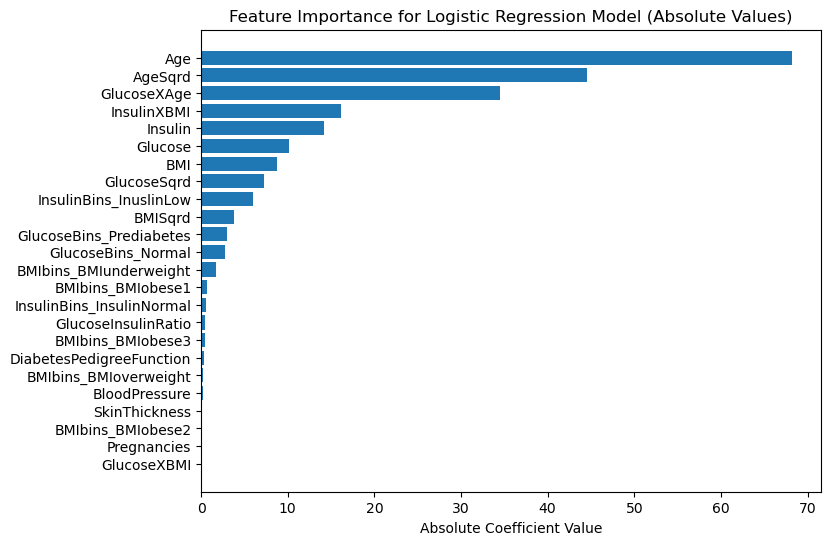

In [263]:
# plot the absolute values of the coefficients for easier comparison with SHAP analysis

plt.figure(figsize=(8,6))
plt.barh(feature_importance_l1_lr['feature'],feature_importance_l1_lr['abs_coefficient'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance for Logistic Regression Model (Absolute Values)')
plt.gca().invert_yaxis()
plt.show()

### SHAP analysis - tuned model
[top](#Contents)

In [264]:
# SHAP analysis

# initialize SHAP explainer
explainer_l1_lr = shap.Explainer(best_model_l1_lr.named_steps['lr'],transformed_data)

# get SHAP values for the training data
shap_values_l1_lr = explainer_l1_lr(transformed_data)

# SHAP values for each feature
shap_values_l1_lr_df = pd.DataFrame(shap_values_l1_lr.values,columns=feature_names)

# calculate the mean absolute SHAP value fore each feature to determine importance
shap_feature_importance_l1_lr = pd.DataFrame({
    'feature': feature_names,
    'shap_importance':np.abs(shap_values_l1_lr.values).mean(axis=0)
}).sort_values(by='shap_importance',ascending=False)

print(shap_feature_importance_l1_lr)

                      feature  shap_importance
7                         Age        56.887033
14                    AgeSqrd        37.254569
8                 GlucoseXAge        28.376019
10                InsulinXBMI        11.271166
3                     Insulin         8.348390
0                     Glucose         8.080340
4                         BMI         7.131778
13                GlucoseSqrd         5.782356
12                    BMISqrd         3.094140
16    GlucoseBins_Prediabetes         1.124612
15         GlucoseBins_Normal         1.066417
11        GlucoseInsulinRatio         0.348104
17          BMIbins_BMIobese1         0.254927
6    DiabetesPedigreeFunction         0.243601
1               BloodPressure         0.156418
22  InsulinBins_InsulinNormal         0.153607
20      BMIbins_BMIoverweight         0.108475
19          BMIbins_BMIobese3         0.078974
2               SkinThickness         0.069810
5                 Pregnancies         0.027358
18          B

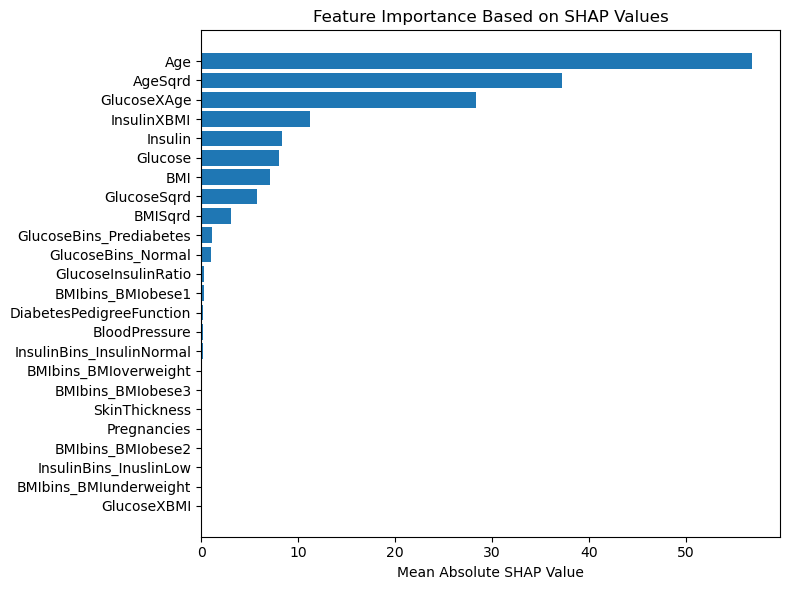

In [265]:
# plot SHAP feature importances

plt.figure(figsize=(8,6))

plt.barh(shap_feature_importance_l1_lr['feature'],shap_feature_importance_l1_lr['shap_importance'])
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Feature Importance Based on SHAP Values')

plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

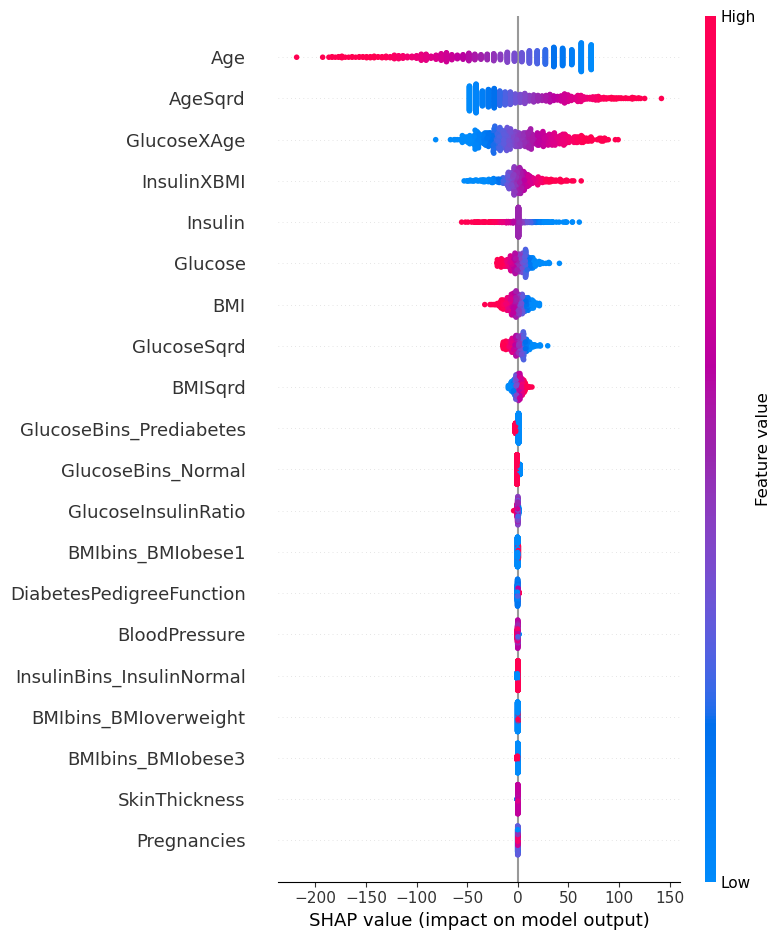

In [266]:
# SHAP Beeswarm plot

shap.summary_plot(shap_values_l1_lr,features=transformed_data,feature_names=feature_names)

The coefficient values and the SHAP values are consistent in identifying key features for the model: Age, AgeSqrd, GlucseXAge, InsulinXBMI,Glucose, GlucoseSqrd, and BMISqrd, and BMI.  

Interestingly, Age and Insulin, and to a lesser extent, Glucose, GlucoseSqrd, and BMI, substantially contribute to predicting the 0 class (not diabetes).  

Note the differnce in SHAP value range for the untuned vs. tuned models. This is likely due to the regularization strength hyperparameter (C), which controls the inverse of regularization strength.  A lower value of C means stronger regularization (L1 or L2) and will reduce the magnitude of the coefficients.  

The deafult C value is 1.  The tuned model uses a C value of 500.  So, the tuned model with L1 regularization has set coefficients of some features to zero, but has also allowed the coefficients of important features to become large.  

## KNN
[top](#Contents)

In [267]:
pipeline_full_knn = Pipeline(steps=[
    ('preprocessor',preprocessor_pipeline),
    ('knn',KNeighborsClassifier()
    )])

pipeline_full_knn

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('impute',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    remainder='passthrough',
                                                    transformers=[('impute',
                                                                   SimpleImputer(strategy='median'),
                                                                   ['Glucose',
                                                                    'BloodPressure',
                                                                    'SkinThickness',
                                                                    'Insulin',
                                                                    'BMI'])],
                                                    verbose_feature_names_out=False)),
                                 ('add_interaction', AddInteractionFeatures()),
                                 ('bin_features', BinFe...
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    remainder='passthrough',
                                                    transformers=[('scale',
                                                                   StandardScaler(),
                                                                   ['Glucose',
                                                                    'BloodPressure',
                                                                    'SkinThickness',
                                                                    'Insulin',
                                                                    'BMI',
                                                                    'Pregnancies',
                                                                    'DiabetesPedigreeFunction',
                                                                    'Age',
                                                                    'GlucoseXAge',
                                                                    'GlucoseXBMI',
                                                                    'InsulinXBMI',
                                                                    'GlucoseInsulinRatio',
                                                                    'BMISqrd',
                                                                    'GlucoseSqrd',
                                                                    'AgeSqrd'])],
                                                    verbose_feature_names_out=False))])),
                ('knn', KNeighborsClassifier())])

In [268]:
# fit the pipeline

model_knn = pipeline_full_knn.fit(X_train,y_train)

# predict using the fitted model
y_train_pred_knn = model_knn.predict(X_train)
y_test_pred_knn = model_knn.predict(X_test)

# get the prediction probabilities 
y_train_proba_knn = model_knn.predict_proba(X_train)
y_test_proba_knn = model_knn.predict_proba(X_test)

### Performance metrics
[top](#Contents)

In [269]:
# AUC score (KNN)

print(f'AUC score, train data, KNN default params: {roc_auc_score(y_train,y_train_proba_knn[:,1]):.3f}')
print(f'AUC score, test data, KNN default prams: {roc_auc_score(y_test,y_test_proba_knn[:,1]):.3f}')

AUC score, train data, KNN default params: 0.901
AUC score, test data, KNN default prams: 0.804


In [270]:
# classification report (KNN)

print(f'Classification report, train data, KNN default params: \n{classification_report(y_train,y_train_pred_knn)}')
print(f'\nClassification report, test data, KNN default params: \n{classification_report(y_test,y_test_pred_knn)}')

Classification report, train data, KNN default params: 
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       401
           1       0.76      0.72      0.74       213

    accuracy                           0.83       614
   macro avg       0.81      0.80      0.81       614
weighted avg       0.82      0.83      0.82       614


Classification report, test data, KNN default params: 
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        99
           1       0.62      0.69      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



In [271]:
# confusion matrix (KNN) 

print(f'Confusion matrix, train data, KNN default params: \n{confusion_matrix(y_train,y_train_pred_knn)}')
print(f'\nConfusion matrix, test data, KNN default params: \n{confusion_matrix(y_test,y_test_pred_knn)}')

Confusion matrix, train data, KNN default params: 
[[353  48]
 [ 59 154]]

Confusion matrix, test data, KNN default params: 
[[76 23]
 [17 38]]


### Hyperparameter tuning with gridsearch
[top](#Contents)

In [282]:
# perform a grid search to find the best hyperparameters for the KNN model
parameters_knn = {
    'knn__n_neighbors':[32,34,36,38],
    'knn__weights':['uniform','distance'],
    'knn__algorithm':['auto','ball_tree','kd_tree', 'brute'],
    'knn__metric':['euclidean','manhattan','minkowski','chebyshev'],
    'knn__leaf_size':[3,4,5]
}

# Use StratifiedKFold for better handling of class imbalance
cv = StratifiedKFold(n_splits=5)

gs_knn = GridSearchCV(
    estimator=pipeline_full_knn,
    param_grid=parameters_knn,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# get start time
start_time = time.time()

gs_knn.fit(X_train,y_train)

# get end and elapsed time
end_time = time.time()
elapsed_time = end_time - start_time

# best score and parameters
best_aucscore_knn = gs_knn.best_score_
best_parameters_knn = gs_knn.best_params_
best_model_knn = gs_knn.best_estimator_

print(f'\nKNN accuracy: {best_aucscore_knn:.2f}')
print(f'\nKNN best parameters: \n{best_parameters_knn}')

print(f'\nelapsed time: {elapsed_time:.2f} seconds')

Fitting 5 folds for each of 384 candidates, totalling 1920 fits

KNN accuracy: 0.85

KNN best parameters: 
{'knn__algorithm': 'auto', 'knn__leaf_size': 3, 'knn__metric': 'manhattan', 'knn__n_neighbors': 36, 'knn__weights': 'uniform'}

elapsed time: 6.71 seconds


In [283]:
# KNN model metrics with gridsearch best parameters

y_train_pred_knn_gs = gs_knn.predict(X_train)
y_test_pred_knn_gs = gs_knn.predict(X_test)

y_train_proba_knn_gs = gs_knn.predict_proba(X_train)
y_test_proba_knn_gs = gs_knn.predict_proba(X_test)

# print AUC scores
print('AUC scores of edited dataset with gridsearch best parameters')
print(f'train data: {roc_auc_score(y_train,y_train_proba_knn_gs[:,1]):.3f}')
print(f'test data: {roc_auc_score(y_test,y_test_proba_knn_gs[:,1]):.3f}')

AUC scores of edited dataset with gridsearch best parameters
train data: 0.859
test data: 0.825


### Classification report - tuned KNN model
[top](#Contents)

In [284]:
# classification report for tuned KNN model
print('classification report on tuned KNN model')
print(f'\ntrain data: \n{classification_report(y_train,y_train_pred_knn_gs)}')
print(f'\ntest data: \n{classification_report(y_test,y_test_pred_knn_gs)}')

classification report on tuned KNN model

train data: 
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       401
           1       0.72      0.60      0.65       213

    accuracy                           0.78       614
   macro avg       0.76      0.74      0.75       614
weighted avg       0.78      0.78      0.77       614


test data: 
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        99
           1       0.72      0.69      0.70        55

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



The KNN model is overfitting with regard to recall.  I will try to reduce the dimensionality/complexity with PCA.  

### PCA KNN pipeline
[top](#Contents)

In [285]:
# will try PCA to reduce the dimensionality

pipeline_pca_knn = Pipeline(steps=[
    ('preprocessor',preprocessor_pipeline),
    ('pca',PCA(n_components=0.97)), # retain 97% of variance
    ('knn',KNeighborsClassifier()
    )])

pipeline_pca_knn

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('impute',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    remainder='passthrough',
                                                    transformers=[('impute',
                                                                   SimpleImputer(strategy='median'),
                                                                   ['Glucose',
                                                                    'BloodPressure',
                                                                    'SkinThickness',
                                                                    'Insulin',
                                                                    'BMI'])],
                                                    verbose_feature_names_out=False)),
                                 ('add_interaction', AddInteractionFeatures()),
                                 ('bin_features', BinFe...
                                                    remainder='passthrough',
                                                    transformers=[('scale',
                                                                   StandardScaler(),
                                                                   ['Glucose',
                                                                    'BloodPressure',
                                                                    'SkinThickness',
                                                                    'Insulin',
                                                                    'BMI',
                                                                    'Pregnancies',
                                                                    'DiabetesPedigreeFunction',
                                                                    'Age',
                                                                    'GlucoseXAge',
                                                                    'GlucoseXBMI',
                                                                    'InsulinXBMI',
                                                                    'GlucoseInsulinRatio',
                                                                    'BMISqrd',
                                                                    'GlucoseSqrd',
                                                                    'AgeSqrd'])],
                                                    verbose_feature_names_out=False))])),
                ('pca', PCA(n_components=0.97)),
                ('knn', KNeighborsClassifier())])

In [286]:
# fit the pipeline with PCA

model_pca_knn = pipeline_pca_knn.fit(X_train,y_train)

# predict using the fitted model, with PCA
y_train_pred_pca_knn = model_pca_knn.predict(X_train)
y_test_pred_pca_knn = model_pca_knn.predict(X_test)

# get the prediction probabilities for the model with PCA
y_train_proba_pca_knn = model_pca_knn.predict_proba(X_train)
y_test_proba_pca_knn = model_pca_knn.predict_proba(X_test)

In [287]:
# AUC score for model with PCA and KNN

print('AUC scores of the default KNN model following PCA and 97% variance retained')
print(f'\ntrain data: {roc_auc_score(y_train,y_train_proba_pca_knn[:,1]):.3f}')
print(f'test data: {roc_auc_score(y_test,y_test_proba_pca_knn[:,1]):.3f}')

AUC scores of the default KNN model following PCA and 97% variance retained

train data: 0.903
test data: 0.813


### Hyperparameter tuning on PCA KNN model
[top](#Contents)

In [292]:
# perform a grid search to find the best hyperparameters for the KNN model with PCA
parameters_pca_knn = {
    'pca__n_components':[0.91,0.92,0.93,0.94,0.95],
    'knn__n_neighbors':[17,18,19,20,21],
    'knn__weights':['uniform','distance'],
    'knn__algorithm':['auto','ball_tree','kd_tree', 'brute'],
    'knn__metric':['euclidean','manhattan','minkowski','chebyshev'],
    'knn__p':[1,2],
    'knn__leaf_size':[1,2,3]
}

# Use StratifiedKFold for better handling of class imbalance
cv = StratifiedKFold(n_splits=5)

gs_pca_knn = GridSearchCV(
    estimator=pipeline_pca_knn,
    param_grid=parameters_pca_knn,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1)

# record the start time to determine elapsed time
start_time = time.time()

gs_pca_knn.fit(X_train,y_train)

# record the end time
end_time = time.time()
elapsed_time = end_time - start_time

# best score and parameters
best_aucscore_pca_knn = gs_pca_knn.best_score_
best_parameters_pca_knn = gs_pca_knn.best_params_
best_model_pca_knn = gs_pca_knn.best_estimator_

print(f'\nKNN accuracy: {best_aucscore_pca_knn:.2f}')
print(f'\nKNN best parameters: \n{best_parameters_pca_knn}')
print(f'\nelapsed time (sec): {elapsed_time:.2f} seconds')
print(f'elapsed time (min): {(elapsed_time/60):.2f} minutes')

Fitting 5 folds for each of 4800 candidates, totalling 24000 fits

KNN accuracy: 0.85

KNN best parameters: 
{'knn__algorithm': 'auto', 'knn__leaf_size': 1, 'knn__metric': 'euclidean', 'knn__n_neighbors': 19, 'knn__p': 1, 'knn__weights': 'uniform', 'pca__n_components': 0.92}

elapsed time (sec): 80.82 seconds
elapsed time (min): 1.35 minutes


In [293]:
# apply the gridsearch best parameters (from pca and KNN) to predict the independent variable (diabetes)

y_train_pred_pca_knn_gs = gs_pca_knn.predict(X_train)
y_test_pred_pca_knn_gs = gs_pca_knn.predict(X_test)

y_train_proba_pca_knn_gs = gs_pca_knn.predict_proba(X_train)
y_test_proba_pca_knn_gs = gs_pca_knn.predict_proba(X_test)

print(f'train ROC-AUC score, train data, PCA + KNN GS: {roc_auc_score(y_train,y_train_proba_pca_knn_gs[:,1]):.3f}')
print(f'test ROC-AUC score, train data, PCA + KNN GS: {roc_auc_score(y_test,y_test_proba_pca_knn_gs[:,1]):.3f}')

train ROC-AUC score, train data, PCA + KNN GS: 0.868
test ROC-AUC score, train data, PCA + KNN GS: 0.815


dimensionality reduction did improve the performance of the KNN model, mainly by reduction in overfitting.  

### Classification report
[top](#contents)

In [294]:
# classification report for tuned PCA-KNN model
print('classification report on tuned KNN model following PCA/dimensionality reduction')
print(f'\ntrain data: \n{classification_report(y_train,y_train_pred_pca_knn_gs)}')
print(f'\ntest data: \n{classification_report(y_test,y_test_pred_pca_knn_gs)}')

classification report on tuned KNN model following PCA/dimensionality reduction

train data: 
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       401
           1       0.71      0.66      0.68       213

    accuracy                           0.79       614
   macro avg       0.77      0.76      0.76       614
weighted avg       0.78      0.79      0.78       614


test data: 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



### Confusion matrix
[top](#Contents)

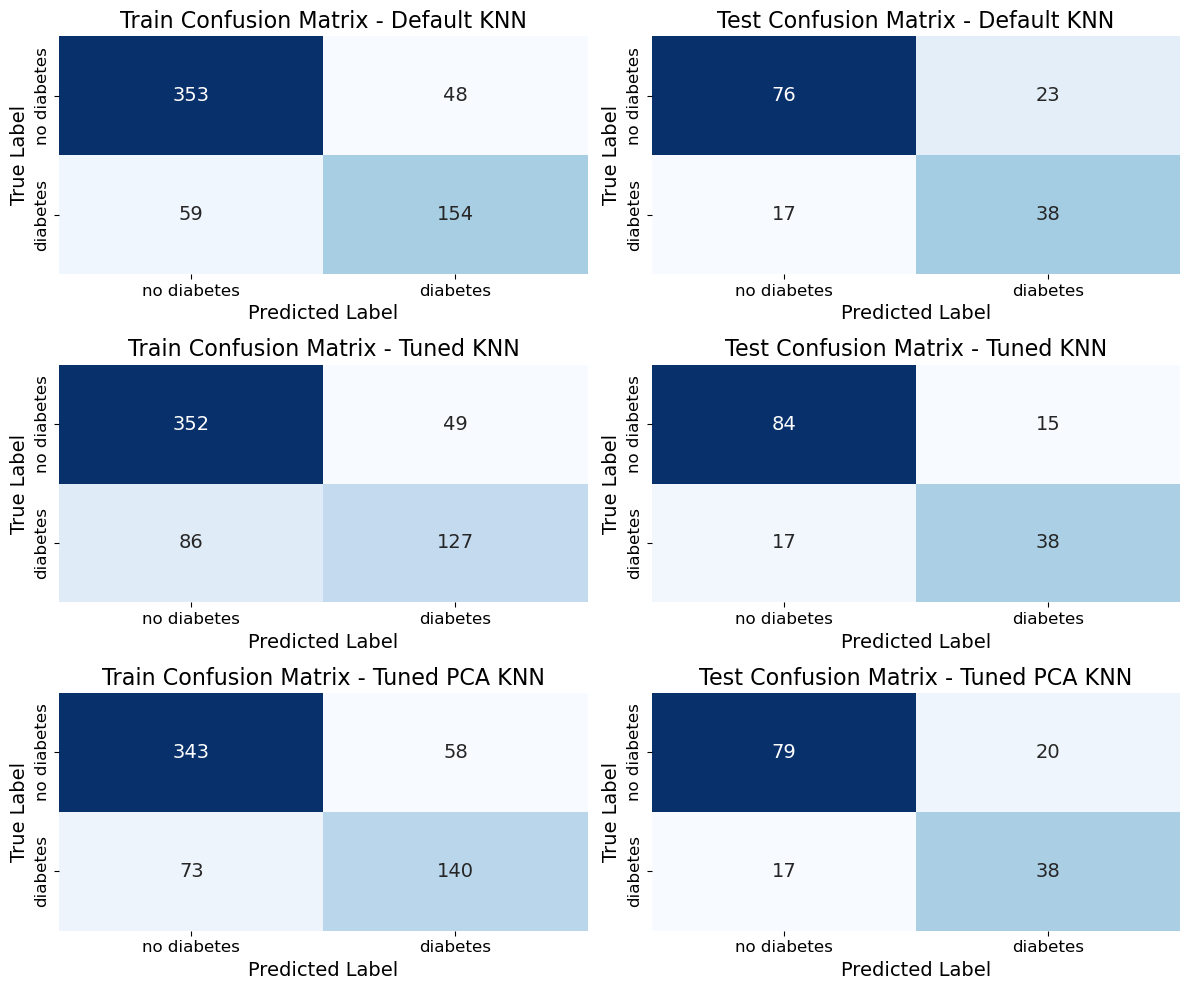

In [295]:
# confusion matrices

# calculate the confusion matrices
knn_train = confusion_matrix(y_train,y_train_pred_knn)
knn_test = confusion_matrix(y_test,y_test_pred_knn)

knn_tuned_train = confusion_matrix(y_train,y_train_pred_knn_gs)
knn_tuned_test = confusion_matrix(y_test,y_test_pred_knn_gs)

pca_knn_gs_train = confusion_matrix(y_train,y_train_pred_pca_knn_gs)
pca_knn_gs_test = confusion_matrix(y_test,y_test_pred_pca_knn_gs)

# set up the figure
fig,axes = plt.subplots(3,2,figsize=(12,10))

# a function to create a heatmap for the confusion matrices
def plot_cm(cm,ax,title):
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',ax=ax,cbar=False,
                xticklabels=['no diabetes','diabetes'],yticklabels=['no diabetes','diabetes'],
               annot_kws={'size':14})
    ax.set_xlabel('Predicted Label',fontsize=14)
    ax.set_ylabel('True Label',fontsize=14)
    ax.set_title(title,fontsize=16)
    ax.tick_params(axis='both',labelsize=12)

plot_cm(knn_train,axes[0,0], 'Train Confusion Matrix - Default KNN')
plot_cm(knn_test,axes[0,1], 'Test Confusion Matrix - Default KNN')

plot_cm(knn_tuned_train,axes[1,0], 'Train Confusion Matrix - Tuned KNN')
plot_cm(knn_tuned_test,axes[1,1], 'Test Confusion Matrix - Tuned KNN')

plot_cm(pca_knn_gs_train,axes[2,0], 'Train Confusion Matrix - Tuned PCA KNN')
plot_cm(pca_knn_gs_test,axes[2,1], 'Test Confusion Matrix - Tuned PCA KNN')

plt.tight_layout() 
plt.show()

The tuned KNN model, without dimensionality reduction, shows the best confusion matrix metrics.  Especially important for this dataset, the test set has the lowest false negatives and the highest number of true positives.

### ROC curve
[top](#Contents)

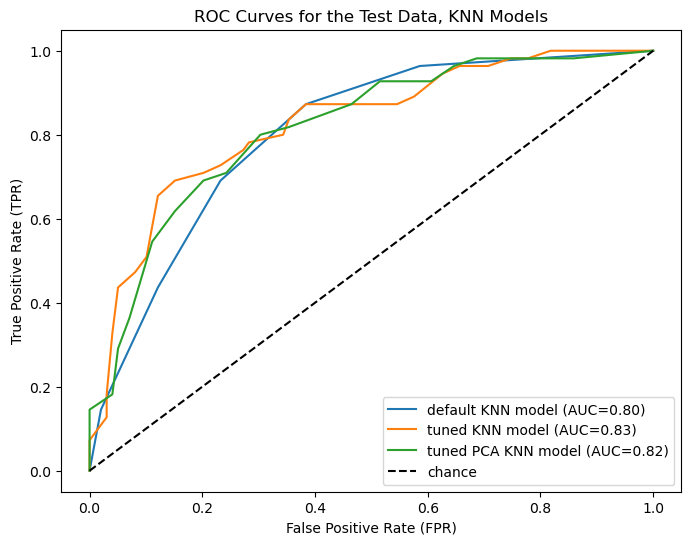

In [296]:
fpr_knn,tpr_knn,_ = roc_curve(y_test,y_test_proba_knn[:,1])
fpr_knn_gs,tpr_knn_gs,_ = roc_curve(y_test,y_test_proba_knn_gs[:,1])
fpr_pca_knn_gs,tpr_pca_knn_gs,_ = roc_curve(y_test,y_test_proba_pca_knn_gs[:,1])

# calculate the AUC scores
auc_knn = roc_auc_score(y_test,y_test_proba_knn[:,1])
auc_knn_gs = roc_auc_score(y_test,y_test_proba_knn_gs[:,1])
auc_pca_knn_gs = roc_auc_score(y_test,y_test_proba_pca_knn_gs[:,1])

plt.figure(figsize=(8,6))

plt.plot(fpr_knn,tpr_knn, label=f'default KNN model (AUC={auc_knn:.2f})')
plt.plot(fpr_knn_gs,tpr_knn_gs, label=f'tuned KNN model (AUC={auc_knn_gs:.2f})')
plt.plot(fpr_pca_knn_gs,tpr_pca_knn_gs, label=f'tuned PCA KNN model (AUC={auc_pca_knn_gs:.2f})')

# plot the chance line
plt.plot([0,1],[0,1], 'k--',label='chance')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.title('ROC Curves for the Test Data, KNN Models')

plt.show()

### Precision recall curve
[top](#Contents)

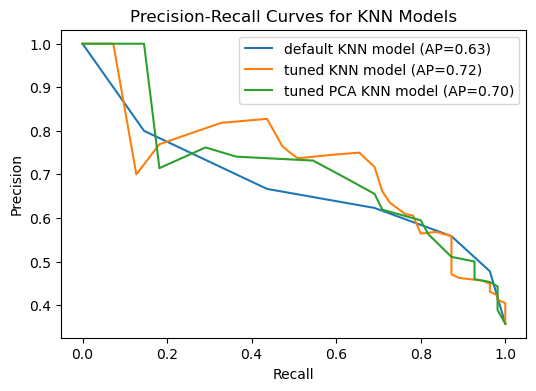

In [297]:
# precision recall curves of the test data for three random forest models

# get precision-recall values for each model
precision_knn,recall_knn,_ = precision_recall_curve(y_test,y_test_proba_knn[:,1])
precision_knn_gs,recall_knn_gs,_ = precision_recall_curve(y_test,y_test_proba_knn_gs[:,1])
precision_pca_knn_gs,recall_pca_knn_gs,_ = precision_recall_curve(y_test,y_test_proba_pca_knn_gs[:,1])

# calculate the average precision (AP) scores for each model
ap_knn = average_precision_score(y_test,y_test_proba_knn[:,1])
ap_knn_gs = average_precision_score(y_test,y_test_proba_knn_gs[:,1])
ap_pca_knn_gs = average_precision_score(y_test,y_test_proba_pca_knn_gs[:,1])

# plot
plt.figure(figsize=(6,4))

plt.plot(recall_knn,precision_knn,label=f'default KNN model (AP={ap_knn:.2f})')
plt.plot(recall_knn_gs,precision_knn_gs,label=f'tuned KNN model (AP={ap_knn_gs:.2f})')
plt.plot(recall_pca_knn_gs,precision_pca_knn_gs,label=f'tuned PCA KNN model (AP={ap_pca_knn_gs:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for KNN Models')

plt.legend()
plt.show()

## Random forest
[top](#Contents)

In [298]:
pipeline_rf = Pipeline(steps=[
    ('preprocessor',preprocessor_pipeline),
    ('rf',RandomForestClassifier(random_state=42)
    )])

pipeline_rf

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('impute',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    remainder='passthrough',
                                                    transformers=[('impute',
                                                                   SimpleImputer(strategy='median'),
                                                                   ['Glucose',
                                                                    'BloodPressure',
                                                                    'SkinThickness',
                                                                    'Insulin',
                                                                    'BMI'])],
                                                    verbose_feature_names_out=False)),
                                 ('add_interaction', AddInteractionFeatures()),
                                 ('bin_features', BinFe...
                                                    remainder='passthrough',
                                                    transformers=[('scale',
                                                                   StandardScaler(),
                                                                   ['Glucose',
                                                                    'BloodPressure',
                                                                    'SkinThickness',
                                                                    'Insulin',
                                                                    'BMI',
                                                                    'Pregnancies',
                                                                    'DiabetesPedigreeFunction',
                                                                    'Age',
                                                                    'GlucoseXAge',
                                                                    'GlucoseXBMI',
                                                                    'InsulinXBMI',
                                                                    'GlucoseInsulinRatio',
                                                                    'BMISqrd',
                                                                    'GlucoseSqrd',
                                                                    'AgeSqrd'])],
                                                    verbose_feature_names_out=False))])),
                ('rf', RandomForestClassifier(random_state=42))])

In [299]:
# fit the pipeline with random forest classifier

model_rf = pipeline_rf.fit(X_train,y_train)

# predict using the fitted model
y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)

# get the prediction probabilities
y_train_proba_rf = model_rf.predict_proba(X_train)
y_test_proba_rf = model_rf.predict_proba(X_test)

### Performance metrics
[top](#Contents)

In [300]:
# AUC score for default random forest model

print('AUC scores for the default random forest model')
print(f'\ntrain data: {roc_auc_score(y_train,y_train_proba_rf[:,1]):.3f}')
print(f'test data: {roc_auc_score(y_test,y_test_proba_rf[:,1]):.3f}')

AUC scores for the default random forest model

train data: 1.000
test data: 0.829


In [301]:
# confusion matrix (default random forest model)

print('confusion matrix for the default random forest model')
print(f'\ntrain data: \n{confusion_matrix(y_train,y_train_pred_rf)}')
print(f'\ntest data: \n{confusion_matrix(y_test,y_test_pred_rf)}')

confusion matrix for the default random forest model

train data: 
[[401   0]
 [  0 213]]

test data: 
[[79 20]
 [17 38]]


### Hyperparameter tuning with gridsearch
[top](#Contents)

In [208]:
# perform a grid search to find the best hyperparameters 
parameters_rf = {
    'rf__criterion':['gini','entropy','log_loss'],
    'rf__max_depth':[4,5,6,None],
    'rf__min_samples_split':[11,12,13],
    'rf__min_samples_leaf':[2,3,4],
    'rf__max_features':['sqrt','log2'],
    'rf__n_estimators':[53,55,57],
    'rf__bootstrap':[True],
    'rf__class_weight':['balanced_subsample']
}

cv = StratifiedKFold(n_splits=5)

gs_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=parameters_rf,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# get start time
start_time = time.time()

gs_rf.fit(X_train,y_train)

# get end and elapsed time
end_time = time.time()
elapsed_time = end_time - start_time

# best score and parameters
best_aucscore_rf = gs_rf.best_score_
best_parameters_rf = gs_rf.best_params_
best_model_rf = gs_rf.best_estimator_

print(f'\nRF AUC score: {best_aucscore_rf:.3f}')
print(f'\nRF best parameters: \n{best_parameters_rf}')

print(f'\nelapsed time (sec): {elapsed_time:.2f} seconds')
print(f'elapsed time (min): {(elapsed_time)/60:.2f} minutes')

Fitting 5 folds for each of 648 candidates, totalling 3240 fits

RF AUC score: 0.853

RF best parameters: 
{'rf__bootstrap': True, 'rf__class_weight': 'balanced_subsample', 'rf__criterion': 'entropy', 'rf__max_depth': 5, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 12, 'rf__n_estimators': 55}

elapsed time (sec): 31.70 seconds
elapsed time (min): 0.53 minutes


In [209]:
# random forest model metrics with gridsearch best parameters

y_train_pred_rf_gs = gs_rf.predict(X_train)
y_test_pred_rf_gs = gs_rf.predict(X_test)

y_train_proba_rf_gs = gs_rf.predict_proba(X_train)
y_test_proba_rf_gs = gs_rf.predict_proba(X_test)

print(f'AUC score, train data, RF GS params: {roc_auc_score(y_train,y_train_proba_rf_gs[:,1]):.3f}')
print(f'AUC score, test data, RF GS params: {roc_auc_score(y_test,y_test_proba_rf_gs[:,1]):.3f}')

AUC score, train data, RF GS params: 0.921
AUC score, test data, RF GS params: 0.848


### Classification report - tuned RF model
[top](#Contents)

In [211]:
# classification report for tuned RF model
print('classification report on tuned RF model')
print(f'\ntrain data: \n{classification_report(y_train,y_train_pred_rf_gs)}')
print(f'\ntest data: \n{classification_report(y_test,y_test_pred_rf_gs)}')

classification report on tuned RF model

train data: 
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       401
           1       0.69      0.88      0.78       213

    accuracy                           0.82       614
   macro avg       0.81      0.84      0.82       614
weighted avg       0.85      0.82      0.83       614


test data: 
              precision    recall  f1-score   support

           0       0.89      0.72      0.79        99
           1       0.62      0.84      0.71        55

    accuracy                           0.76       154
   macro avg       0.75      0.78      0.75       154
weighted avg       0.79      0.76      0.76       154



The tuned random forest model is only slightly overfitting based on AUC and accuracy metrics, but much less so than with the default parameters.  Overall performance has improved with tuned hyperparameters.  Additionally, recall performance on class 1 vs class 0 is much better compared to KNN and logistic regression models.  

I will investigate feature importance and attempt to reduce complexity and test the model again. 

### Feature importance
[top](#Contents)

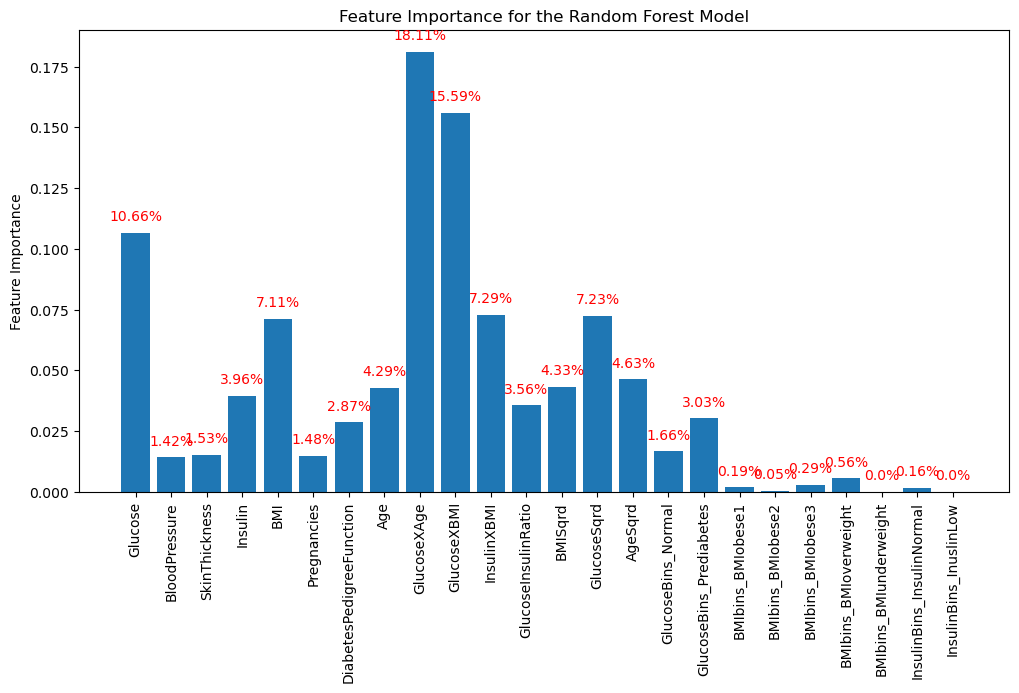

In [220]:
rf_model = best_model_rf.named_steps['rf']
feature_importance = rf_model.feature_importances_

plt.figure(figsize=(12,6))
plt.bar(transformed_data_df.columns,feature_importance)
plt.ylabel('Feature Importance')
plt.title('Feature Importance for the Random Forest Model')
plt.xticks(rotation=90)

for index,value in enumerate(feature_importance):
    plt.text(index, value+0.005,str((100*value).round(2))+'%',ha='center',color='red')

plt.show()

In [235]:
# set a threshold at 2% for features to remove

threshold = 0.02

important_features = [feature for feature, importance in zip(
    feature_names,feature_importance) if importance >= threshold]

print(f'features kept after applying the threshold: \n{important_features}')
print(f'\nnumber of features retained: {len(important_features)}')

features kept after applying the threshold: 
['Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'GlucoseXAge', 'GlucoseXBMI', 'InsulinXBMI', 'GlucoseInsulinRatio', 'BMISqrd', 'GlucoseSqrd', 'AgeSqrd', 'GlucoseBins_Prediabetes']

number of features retained: 13


In [222]:
# test the RF model again with the edited feature list

# Fit the pipeline on the training data and transform X_train
transformed_data_train = preprocessor_pipeline.fit_transform(X_train)

# Transform the test data using the fitted pipeline
transformed_data_test = preprocessor_pipeline.transform(X_test)

# Convert transformed data to DataFrame with feature names
transformed_data_train_df = pd.DataFrame(transformed_data_train, columns=feature_names)
transformed_data_test_df = pd.DataFrame(transformed_data_test, columns=feature_names)

# Extract important features based on the threshold
X_train_impfeats_rf = transformed_data_train_df[important_features]
X_test_impfeats_rf = transformed_data_test_df[important_features]

In [231]:
print(f'transformed_data_train_df: \n{transformed_data_train_df.columns}')
print(f'\ntransformed_data_test_df: \n{transformed_data_test_df.columns}')

transformed_data_train_df: 
Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'Pregnancies', 'DiabetesPedigreeFunction', 'Age', 'GlucoseXAge',
       'GlucoseXBMI', 'InsulinXBMI', 'GlucoseInsulinRatio', 'BMISqrd',
       'GlucoseSqrd', 'AgeSqrd', 'GlucoseBins_Normal',
       'GlucoseBins_Prediabetes', 'BMIbins_BMIobese1', 'BMIbins_BMIobese2',
       'BMIbins_BMIobese3', 'BMIbins_BMIoverweight', 'BMIbins_BMIunderweight',
       'InsulinBins_InsulinNormal', 'InsulinBins_InuslinLow'],
      dtype='object')

transformed_data_test_df: 
Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'Pregnancies', 'DiabetesPedigreeFunction', 'Age', 'GlucoseXAge',
       'GlucoseXBMI', 'InsulinXBMI', 'GlucoseInsulinRatio', 'BMISqrd',
       'GlucoseSqrd', 'AgeSqrd', 'GlucoseBins_Normal',
       'GlucoseBins_Prediabetes', 'BMIbins_BMIobese1', 'BMIbins_BMIobese2',
       'BMIbins_BMIobese3', 'BMIbins_BMIoverweight', 'BMIbins_BMIunderweight',
       'Insul

In [224]:
print(f'X_train_impfeats: \n{X_train_impfeats_rf.columns}')
print(f'\nX_test_impfeats: \n{X_test_impfeats_rf.columns}')

X_train_impfeats: 
Index(['Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'GlucoseXAge', 'GlucoseXBMI', 'InsulinXBMI', 'GlucoseInsulinRatio',
       'BMISqrd', 'GlucoseSqrd', 'AgeSqrd', 'GlucoseBins_Prediabetes'],
      dtype='object')

X_test_impfeats: 
Index(['Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'GlucoseXAge', 'GlucoseXBMI', 'InsulinXBMI', 'GlucoseInsulinRatio',
       'BMISqrd', 'GlucoseSqrd', 'AgeSqrd', 'GlucoseBins_Prediabetes'],
      dtype='object')


In [238]:
# fit random forest model with the data set edited for important features

rfc = RandomForestClassifier(class_weight='balanced_subsample',random_state=42)

model_rf2 = rfc.fit(X_train_impfeats_rf,y_train)

# predict using the fitted model
y_train_pred_rf2 = model_rf2.predict(X_train_impfeats_rf)
y_test_pred_rf2 = model_rf2.predict(X_test_impfeats_rf)

# get the prediction probabilities
y_train_proba_rf2 = model_rf2.predict_proba(X_train_impfeats_rf)
y_test_proba_rf2 = model_rf2.predict_proba(X_test_impfeats_rf)

In [240]:
# AUC score for default random forest model fit with the edited data set

print('AUC scores for the RF model fit with the edited dataset, default hyperparameters:')
print(f'\ntrain data: {roc_auc_score(y_train,y_train_proba_rf2[:,1]):.3f}')
print(f'test data: {roc_auc_score(y_test,y_test_proba_rf2[:,1]):.3f}')

AUC scores for the RF model fit with the edited dataset, default hyperparameters:

train data: 1.000
test data: 0.820


### Hyperparameter tuning - important features
[top](#Contents)

In [307]:
# perform a grid search to find the best hyperparameters with important features
parameters_rf2 = {
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[3,4,5,6,None], # reduce max_depth parameters to help with overfitting
    'min_samples_split':[3,4,5,6],
    'min_samples_leaf':[4,5,6,7],
    'max_features':['sqrt','log2'],
    'n_estimators':[55,56,57,58,59],
    'bootstrap':[True],
    'class_weight':['balanced_subsample']
}

cv = StratifiedKFold(n_splits=5)

gs_rf2 = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced_subsample',random_state=42),
    param_grid=parameters_rf2,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# get the start time
start_time = time.time()

gs_rf2.fit(X_train_impfeats_rf,y_train)

# get the end and elapsed time
end_time = time.time()
elapsed_time = end_time - start_time

# best score and parameters
best_aucscore_rf2 = gs_rf2.best_score_
best_parameters_rf2 = gs_rf2.best_params_
best_model_rf2 = gs_rf2.best_estimator_

print(f'\nRF AUC score: {best_aucscore_rf2:.3f}')
print(f'\nRF best parameters: \n{best_parameters_rf2}')

print(f'\nelapsed time (sec): {elapsed_time:.2f} seconds')
print(f'elapsed time (min): {(elapsed_time)/60:.2f} minutes')

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits

RF AUC score: 0.853

RF best parameters: 
{'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 3, 'n_estimators': 56}

elapsed time (sec): 88.92 seconds
elapsed time (min): 1.48 minutes


In [343]:
# random forest model metrics with gridsearch best parameters on edited dataset

y_train_pred_rf2_gs = gs_rf2.predict(X_train_impfeats_rf)
y_test_pred_rf2_gs = gs_rf2.predict(X_test_impfeats_rf)

y_train_proba_rf2_gs = gs_rf2.predict_proba(X_train_impfeats_rf)
y_test_proba_rf2_gs = gs_rf2.predict_proba(X_test_impfeats_rf)

# print AUC scores
print('AUC scores of edited dataset with gridsearch best parameters')
print(f'train data: {roc_auc_score(y_train,y_train_proba_rf2_gs[:,1]):.3f}')
print(f'test data: {roc_auc_score(y_test,y_test_proba_rf2_gs[:,1]):.3f}')

AUC scores of edited dataset with gridsearch best parameters
train data: 0.901
test data: 0.838


Reducing the complexity has not substantially increased the performance of the model with regard to overfitting.  

### Classification reports
[top](#Contents)

In [309]:
# classification report, default LR hyperparameters

print(f'classification report for random forest models')

print(f'\ntrain data, rf default: \n{classification_report(y_train,y_train_pred_rf)}')
print(f'\ntest data, rf default: \n{classification_report(y_test,y_test_pred_rf)}')

print(f'\ntrain data, rf tuned: \n{classification_report(y_train,y_train_pred_rf_gs)}')
print(f'\ntest data, rf tuned: \n{classification_report(y_test,y_test_pred_rf_gs)}')

print(f'\ntrain data, rf tuned, reduced complexity: \n{classification_report(y_train,y_train_pred_rf2_gs)}')
print(f'\ntest data, rf tuned, reduced complexity: \n{classification_report(y_test,y_test_pred_rf2_gs)}')

classification report for random forest models

train data, rf default: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614


test data, rf default: 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154


train data, rf tuned: 
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       401
           1       0.69      0.88      0.78       213

    accuracy                           0.82       614
   mac

### Confusion matrices
[top](#contents)

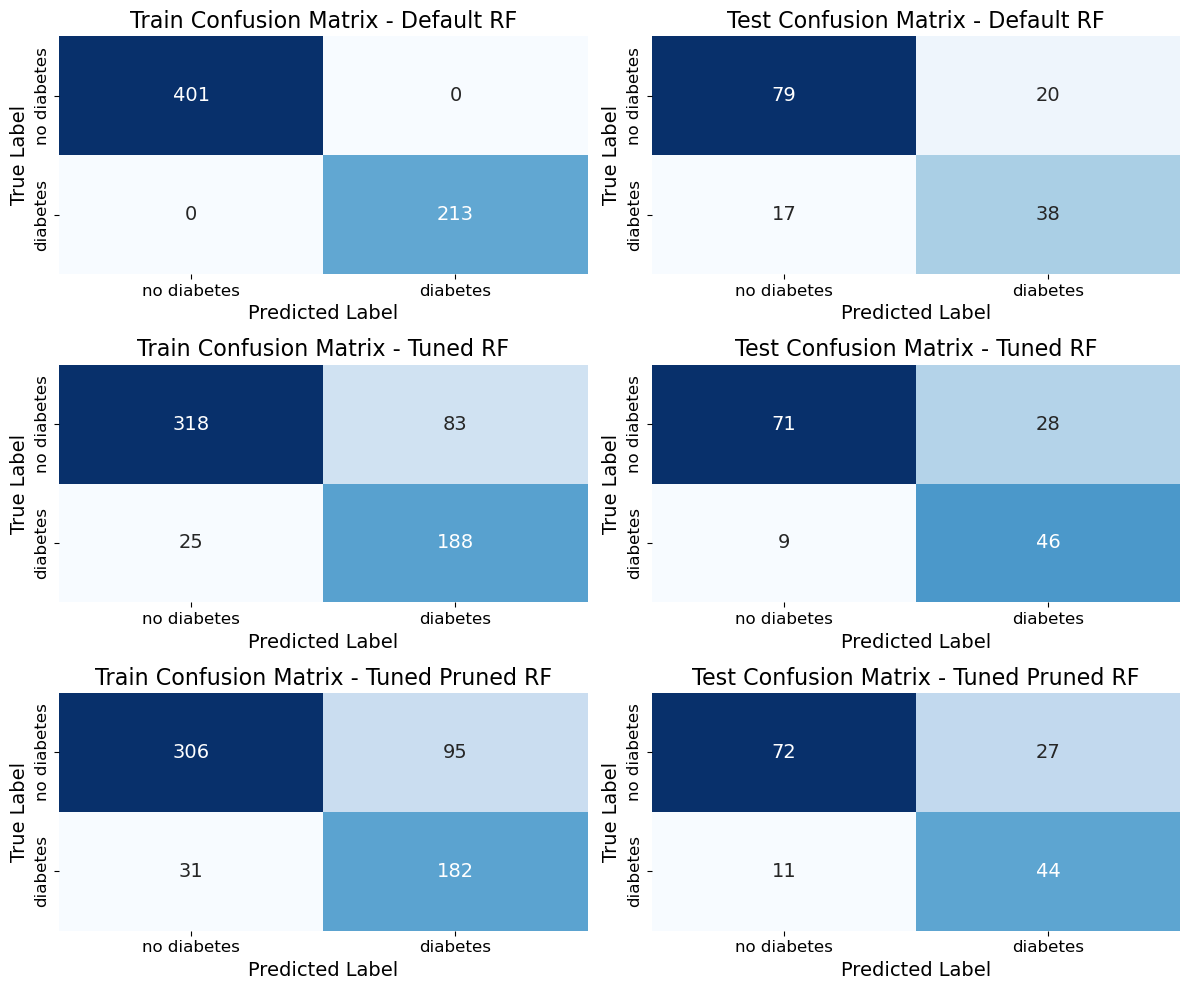

In [310]:
# confusion matrices

# calculate the confusion matrices
rf_train = confusion_matrix(y_train,y_train_pred_rf)
rf_test = confusion_matrix(y_test,y_test_pred_rf)

rf_tuned_train = confusion_matrix(y_train,y_train_pred_rf_gs)
rf_tuned_test = confusion_matrix(y_test,y_test_pred_rf_gs)

rf_tuned2_train = confusion_matrix(y_train,y_train_pred_rf2_gs)
rf_tuned2_test = confusion_matrix(y_test,y_test_pred_rf2_gs)

# set up the figure
fig,axes = plt.subplots(3,2,figsize=(12,10))

# a function to create a heatmap for the confusion matrices
def plot_cm(cm,ax,title):
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',ax=ax,cbar=False,
                xticklabels=['no diabetes','diabetes'],yticklabels=['no diabetes','diabetes'],
               annot_kws={'size':14})
    ax.set_xlabel('Predicted Label',fontsize=14)
    ax.set_ylabel('True Label',fontsize=14)
    ax.set_title(title,fontsize=16)
    ax.tick_params(axis='both',labelsize=12)

plot_cm(rf_train,axes[0,0], 'Train Confusion Matrix - Default RF')
plot_cm(rf_test,axes[0,1], 'Test Confusion Matrix - Default RF')

plot_cm(rf_tuned_train,axes[1,0], 'Train Confusion Matrix - Tuned RF')
plot_cm(rf_tuned_test,axes[1,1], 'Test Confusion Matrix - Tuned RF')

plot_cm(rf_tuned2_train,axes[2,0], 'Train Confusion Matrix - Tuned Pruned RF')
plot_cm(rf_tuned2_test,axes[2,1], 'Test Confusion Matrix - Tuned Pruned RF')

plt.tight_layout() 
plt.show()

The tuned random forest model shows the best performance of the three random forest models with regards to the number of false negatives as seen in the confusion matrix and reflected in the recall score as well as the number of true positives, as reflected in the precision score.   

### ROC curves
[top](#Contents)

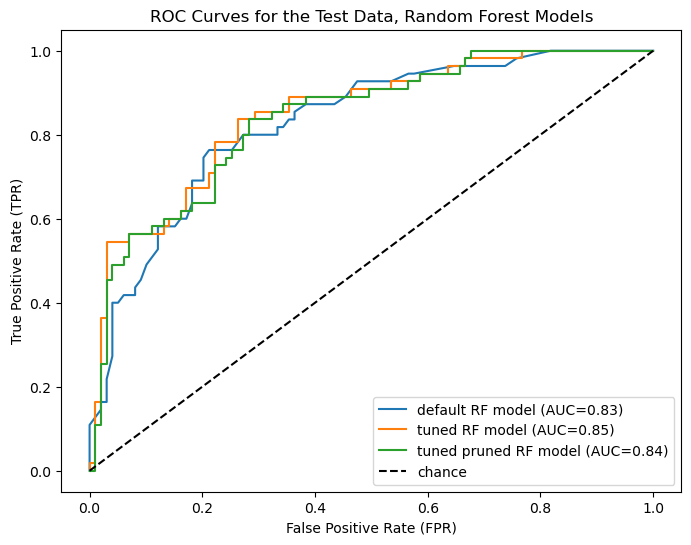

In [311]:
# ROC curves of the test data for three random forest models

fpr_rf,tpr_rf,_ = roc_curve(y_test,y_test_proba_rf[:,1])
fpr_rf_gs,tpr_rf_gs,_ = roc_curve(y_test,y_test_proba_rf_gs[:,1])
fpr_rf2_gs,tpr_rf2_gs,_ = roc_curve(y_test,y_test_proba_rf2_gs[:,1])

# calculate the AUC scores
auc_rf = roc_auc_score(y_test,y_test_proba_rf[:,1])
auc_rf_gs = roc_auc_score(y_test,y_test_proba_rf_gs[:,1])
auc_rf2_gs = roc_auc_score(y_test,y_test_proba_rf2_gs[:,1])

plt.figure(figsize=(8,6))

plt.plot(fpr_rf,tpr_rf, label=f'default RF model (AUC={auc_rf:.2f})')
plt.plot(fpr_rf_gs,tpr_rf_gs, label=f'tuned RF model (AUC={auc_rf_gs:.2f})')
plt.plot(fpr_rf2_gs,tpr_rf2_gs, label=f'tuned pruned RF model (AUC={auc_rf2_gs:.2f})')

# plot the chance line
plt.plot([0,1],[0,1], 'k--',label='chance')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.title('ROC Curves for the Test Data, Random Forest Models')

plt.show()

### Precision recall curves
[top](#Contents)

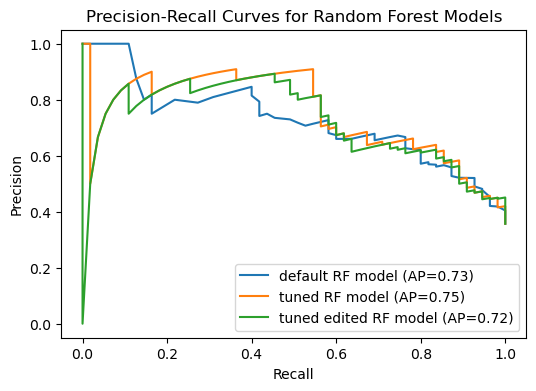

In [312]:
# precision recall curves of the test data for three random forest models

# get precision-recall values for each model
precision_rf,recall_rf,_ = precision_recall_curve(y_test,y_test_proba_rf[:,1])
precision_rf_gs,recall_rf_gs,_ = precision_recall_curve(y_test,y_test_proba_rf_gs[:,1])
precision_rf2_gs,recall_rf2_gs,_ = precision_recall_curve(y_test,y_test_proba_rf2_gs[:,1])

# calculate the average precision (AP) scores for each model
ap_rf = average_precision_score(y_test,y_test_proba_rf[:,1])
ap_rf_gs = average_precision_score(y_test,y_test_proba_rf_gs[:,1])
ap_rf2_gs = average_precision_score(y_test,y_test_proba_rf2_gs[:,1])

# plot
plt.figure(figsize=(6,4))

plt.plot(recall_rf,precision_rf,label=f'default RF model (AP={ap_rf:.2f})')
plt.plot(recall_rf_gs,precision_rf_gs,label=f'tuned RF model (AP={ap_rf_gs:.2f})')
plt.plot(recall_rf2_gs,precision_rf2_gs,label=f'tuned edited RF model (AP={ap_rf2_gs:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Random Forest Models')

plt.legend()
plt.show()

The AP scores for the RF model are slightly better than for both the logistic regression and KNN models, which means that the former is better at predicting the minority class (has diabetes (1)).  

### Calibrate Prediction Probabilities
[top](#Contents)

The precision-recall curve shows a rapid drop in precision at the highest threshold values.  This behaviors is also seen with the logistic regression and KNN models, to a lesser extent.  

I will try calibrating the predicted probabilities.  

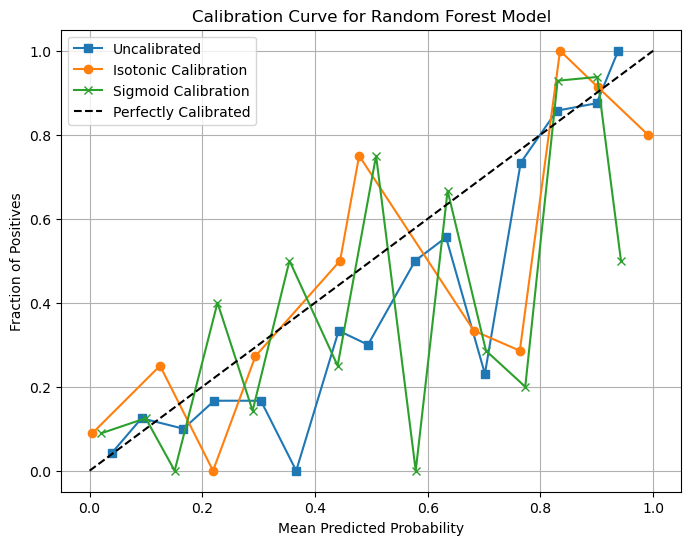

In [586]:
# the uncalibrated model has already been fit with the GridsearchCV model

# fit calibrated models with isotonic and sigmoid (Platt scaling) calibration
cal_isotonic = CalibratedClassifierCV(estimator=best_model_rf, 
                                      method='isotonic', cv='prefit')
cal_isotonic.fit(X_train, y_train)

cal_sigmoid = CalibratedClassifierCV(estimator=best_model_rf,
                                     method='sigmoid', cv='prefit')
cal_sigmoid.fit(X_train, y_train)

# generate predicted probabilities 
probs_uncalibrated = best_model_rf.predict_proba(X_test)[:,1]
probs_isotonic = cal_isotonic.predict_proba(X_test)[:,1]
probs_sigmoid = cal_sigmoid.predict_proba(X_test)[:,1]

# compute calibration curves
prob_true_uncal, prob_pred_uncal = calibration_curve(y_test,probs_uncalibrated,n_bins=15)
prob_true_iso, prob_pred_iso = calibration_curve(y_test,probs_isotonic,n_bins=15)
prob_true_sigmoid, prob_pred_sigmoid = calibration_curve(y_test,probs_sigmoid,n_bins=15)

# plot the calibration curves
plt.figure(figsize=(8,6))
plt.plot(prob_pred_uncal,prob_true_uncal, 's-', label='Uncalibrated')
plt.plot(prob_pred_iso,prob_true_iso, 'o-', label='Isotonic Calibration')
plt.plot(prob_pred_sigmoid,prob_true_sigmoid, 'x-', label='Sigmoid Calibration')
plt.plot([0,1], [0,1], 'k--', label='Perfectly Calibrated')

plt.title('Calibration Curve for Random Forest Model')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend(loc='best')
plt.grid()
plt.show()

The uncalibrated prediction probabilities mostly fall below the main diagonal suggesting that the model has over-forecasted the probabilities (they are too large).  Calibration doesn't seem to have helped much, and may have introduced some bias.  However, I will plot the precision-recall curve again to see if calibration may have improved the shape of the curves.

### Precision Recall Curve
[top](#Contents)

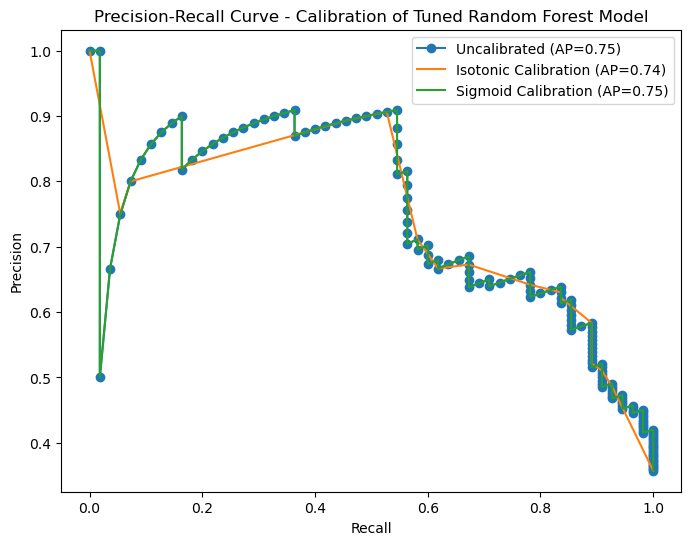

In [597]:
# compute precision-recall for uncalibrated, isotonic, and sigmoid probabilities
precision_uncal, recall_uncal,_ = precision_recall_curve(y_test,probs_uncalibrated)
precision_iso, recall_iso,_ = precision_recall_curve(y_test,probs_isotonic)
precision_sigmoid, recall_sigmoid,_ = precision_recall_curve(y_test,probs_sigmoid)

# calculate average precision (AP)
ap_uncal = average_precision_score(y_test,probs_uncalibrated)
ap_iso = average_precision_score(y_test,probs_isotonic)
ap_sigmoid = average_precision_score(y_test,probs_sigmoid)

# plot PR curves
plt.figure(figsize=(8,6))
plt.plot(recall_uncal,precision_uncal, label=f'Uncalibrated (AP={ap_uncal:.2f})',linestyle='-',marker='o')
plt.plot(recall_iso,precision_iso, label=f'Isotonic Calibration (AP={ap_iso:.2f})')
plt.plot(recall_sigmoid,precision_sigmoid, label=f'Sigmoid Calibration (AP={ap_sigmoid:.2f})')

plt.title('Precision-Recall Curve - Calibration of Tuned Random Forest Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

### Classification Report - Calibrated RF Model
[top](#Contents)

In [610]:
# classification report for RF model with calibrated predicted probabilities

y_pred_uncal = best_model_rf.predict(X_test)
y_pred_iso = cal_isotonic.predict(X_test)
y_pred_sigmoid = cal_sigmoid.predict(X_test)

print(f'classification report for RF model with calibrated predicted probabilities')
print(f'\ntuned rf uncal: \n{classification_report(y_test,y_pred_uncal)}')
print(f'\ntuned rf isotonic cal: \n{classification_report(y_test,y_pred_iso)}')
print(f'\ntuned rf sigmoid cal: \n{classification_report(y_test,y_pred_sigmoid)}')

classification report for RF model with calibrated predicted probabilities

tuned rf uncal: 
              precision    recall  f1-score   support

           0       0.89      0.72      0.79        99
           1       0.62      0.84      0.71        55

    accuracy                           0.76       154
   macro avg       0.75      0.78      0.75       154
weighted avg       0.79      0.76      0.76       154


tuned rf isotonic cal: 
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154


tuned rf sigmoid cal: 
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        99
           1       0.65      0.75      0.69        55

    accuracy                           0

Calibration reduced the immediate drop in precision seen in the precision recall curve and increased precision on class 1 predictions, but substantially reduced recall.  

## XGBoost
[top](#Contents)

In [313]:
pipeline_xgb = Pipeline(steps=[
    ('preprocessor',preprocessor_pipeline),
    ('xgb',XGBClassifier(scale_pos_weight=2,random_state=42))
])

pipeline_xgb

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('impute',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    remainder='passthrough',
                                                    transformers=[('impute',
                                                                   SimpleImputer(strategy='median'),
                                                                   ['Glucose',
                                                                    'BloodPressure',
                                                                    'SkinThickness',
                                                                    'Insulin',
                                                                    'BMI'])],
                                                    verbose_feature_names_out=False)),
                                 ('add_interaction', AddInteractionFeatures()),
                                 ('bin_features', BinFe...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

### Performance metrics
[top](#Contents)

In [193]:
model_xgb = pipeline_xgb.fit(X_train,y_train)

y_train_pred_xgb = model_xgb.predict(X_train)
y_test_pred_xgb = model_xgb.predict(X_test)

y_train_proba_xgb = model_xgb.predict_proba(X_train)
y_test_proba_xgb = model_xgb.predict_proba(X_test)

In [314]:
# AUC scores for the default XGB classifier

print('AUC scores, XGB classfication model with default hyperparameters')
print(f'\ntrain data: {roc_auc_score(y_train,y_train_proba_xgb[:,1]):.3f}')
print(f'test data: {roc_auc_score(y_test,y_test_proba_xgb[:,1]):.3f}')

AUC scores, XGB classfication model with default hyperparameters

train data: 1.000
test data: 0.770


### Hyperparameter tuning with gridsearch
[top](#Contents)

Note to self: consider using Optuna to determine best combination of hyperparameters

In [538]:
# perform a Grid search to find the best hyperparameters for the XGBoost model 

parameters_xgb = {
    'xgb__n_estimators':[34],
    'xgb__max_depth':[2],
    'xgb__learning_rate':[0.025],
    'xgb__min_child_weight':[10],
    'xgb__subsample':[0.45],
    'xgb__colsample_bytree':[0.7],
    'xgb__gamma':[0.15],
    'xgb__reg_alpha':[0.3],
    'xgb__reg_lambda':[0.65],
    'xgb__scale_pos_weight':[2],
    'xgb__random_state':[42]
}    

cv = StratifiedKFold(n_splits=5)

# perform grid search with cross-validation
gs_xgb = GridSearchCV(estimator=pipeline_xgb,param_grid=parameters_xgb,
                          cv=cv,scoring='roc_auc',n_jobs=-1,verbose=1)

# get the start time
start_time = time.time()

# fit the grid search on the training data
gs_xgb.fit(X_train,y_train)

# get the end and elapsed time
end_time = time.time()
elapsed_time = end_time - start_time

# best score and parameters
best_aucscore_xgb = gs_xgb.best_score_
best_parameters_xgb = gs_xgb.best_params_
best_model_xgb = gs_xgb.best_estimator_

print(f'\nXGB AUC score: {best_aucscore_xgb:.3f}')
print(f'\nXGB best parameters: \n{best_parameters_xgb}')

print(f'\nelapsed_time (sec): {elapsed_time:.2f} seconds')
print(f'elapsed_time (min): {(elapsed_time)/60:.2f} minutes')

Fitting 5 folds for each of 1 candidates, totalling 5 fits

XGB AUC score: 0.851

XGB best parameters: 
{'xgb__colsample_bytree': 0.7, 'xgb__gamma': 0.15, 'xgb__learning_rate': 0.025, 'xgb__max_depth': 2, 'xgb__min_child_weight': 10, 'xgb__n_estimators': 34, 'xgb__random_state': 42, 'xgb__reg_alpha': 0.3, 'xgb__reg_lambda': 0.65, 'xgb__scale_pos_weight': 2, 'xgb__subsample': 0.45}

elapsed_time (sec): 0.15 seconds
elapsed_time (min): 0.00 minutes


In [539]:
# apply the gridsearch best parameters for XGB model metrics

y_train_pred_xgb_gs = gs_xgb.predict(X_train)
y_test_pred_xgb_gs = gs_xgb.predict(X_test)

y_train_proba_xgb_gs = gs_xgb.predict_proba(X_train)
y_test_proba_xgb_gs = gs_xgb.predict_proba(X_test)

In [540]:
# AUC scores for XGB model with best parameters

print('AUC scores for the XGB model with best parameters')
print(f'\ntrain data: {roc_auc_score(y_train,y_train_proba_xgb_gs[:,1]):.3f}')
print(f'test data: {roc_auc_score(y_test,y_test_proba_xgb_gs[:,1]):.3f}')

AUC scores for the XGB model with best parameters

train data: 0.867
test data: 0.836


### Classification report - tuned XGB
[top](#Contents)

In [541]:
print(f'classification report for tuned XGB model')

print(f'\ntrain data, XGB tuned: \n{classification_report(y_train,y_train_pred_xgb_gs)}')
print(f'\ntest data, XGB tuned: \n{classification_report(y_test,y_test_pred_xgb_gs)}')

classification report for tuned XGB model

train data, XGB tuned: 
              precision    recall  f1-score   support

           0       0.90      0.71      0.80       401
           1       0.61      0.85      0.71       213

    accuracy                           0.76       614
   macro avg       0.76      0.78      0.76       614
weighted avg       0.80      0.76      0.77       614


test data, XGB tuned: 
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        99
           1       0.59      0.85      0.70        55

    accuracy                           0.73       154
   macro avg       0.74      0.76      0.73       154
weighted avg       0.78      0.73      0.74       154



The hyperparameter tuned XGB model is moderately overfitting the data.  I will 
investigate feature importance and run the gridsearch again with a subset 
of features. 

### Feature importance
[top](#Contents)

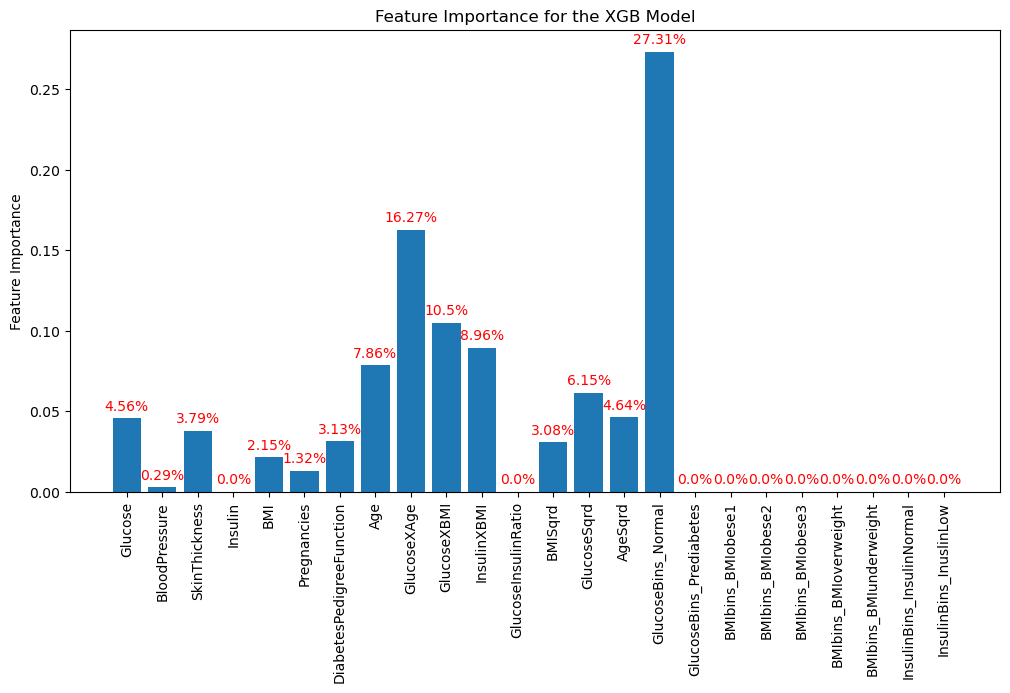

In [542]:
xgb_model = best_model_xgb.named_steps['xgb']
feature_importance_xgb = xgb_model.feature_importances_

plt.figure(figsize=(12,6))
plt.bar(transformed_data_df.columns,feature_importance_xgb)
plt.ylabel('Feature Importance')
plt.title('Feature Importance for the XGB Model')
plt.xticks(rotation=90)

for index,value in enumerate(feature_importance_xgb):
    plt.text(index, value+0.005,str((100*value).round(2))+'%',ha='center',color='red')

plt.show()

In [543]:
# set a threshold at 2% for features to remove

threshold = 0.02

important_features_xgb = [feature for feature, importance in zip(
    feature_names,feature_importance_xgb) if importance >= threshold]

print(f'features kept after applying the threshold: \n{important_features_xgb}')
print(f'\nnumber of features retained: {len(important_features_xgb)}')

features kept after applying the threshold: 
['Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'GlucoseXAge', 'GlucoseXBMI', 'InsulinXBMI', 'BMISqrd', 'GlucoseSqrd', 'AgeSqrd', 'GlucoseBins_Normal']

number of features retained: 12


In [544]:
# test the RF model again with the edited feature list

# Fit the pipeline on the training data and transform X_train
transformed_data_train = preprocessor_pipeline.fit_transform(X_train)

# Transform the test data using the fitted pipeline
transformed_data_test = preprocessor_pipeline.transform(X_test)

# Convert transformed data to DataFrame with feature names
transformed_data_train_df = pd.DataFrame(transformed_data_train, columns=feature_names)
transformed_data_test_df = pd.DataFrame(transformed_data_test, columns=feature_names)

# Extract important features based on the threshold
X_train_impfeats_xgb = transformed_data_train_df[important_features_xgb]
X_test_impfeats_xgb = transformed_data_test_df[important_features_xgb]

In [545]:
print(f'X_train_impfeats_xgb: \n{X_train_impfeats_xgb.columns}')
print(f'\nX_test_impfeats_xgb: \n{X_test_impfeats_xgb.columns}')

X_train_impfeats_xgb: 
Index(['Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'GlucoseXAge', 'GlucoseXBMI', 'InsulinXBMI', 'BMISqrd', 'GlucoseSqrd',
       'AgeSqrd', 'GlucoseBins_Normal'],
      dtype='object')

X_test_impfeats_xgb: 
Index(['Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'GlucoseXAge', 'GlucoseXBMI', 'InsulinXBMI', 'BMISqrd', 'GlucoseSqrd',
       'AgeSqrd', 'GlucoseBins_Normal'],
      dtype='object')


In [546]:
# fit the XGB model with the data set edited for important features

xgb = XGBClassifier(scale_pos_weight=2,random_state=42)

model_xgb2 = xgb.fit(X_train_impfeats_xgb,y_train)

# predict using the fitted model
y_train_pred_xgb2 = model_xgb2.predict(X_train_impfeats_xgb)
y_test_pred_xgb2 = model_xgb2.predict(X_test_impfeats_xgb)

# get the prediction probabilities
y_train_proba_xgb2 = model_xgb2.predict_proba(X_train_impfeats_xgb)
y_test_proba_xgb2 = model_xgb2.predict_proba(X_test_impfeats_xgb)

In [547]:
# AUC score for default random forest model fit with the edited data set

print('AUC scores for the XGB model fit with the edited dataset, default hyperparameters:')
print(f'train data: {roc_auc_score(y_train,y_train_proba_xgb2[:,1]):.3f}')
print(f'test data: {roc_auc_score(y_test,y_test_proba_xgb2[:,1]):.3f}')

AUC scores for the XGB model fit with the edited dataset, default hyperparameters:
train data: 1.000
test data: 0.771


### Hyperparameter tuning - important features
[top](#Contents)

In [574]:
# perform a Grid search to find the best hyperparameters for the XGBoost model

parameters_xgb2 = {
    'n_estimators':[34],
    'max_depth':[2],
    'learning_rate':[0.025],
    'min_child_weight':[10],
    'subsample':[0.45],
    'colsample_bytree':[0.7],
    'gamma':[0.15],
    'reg_alpha':[0.3],
    'reg_lambda':[0.65],
    'scale_pos_weight':[2],
    'random_state':[42]
}    

cv = StratifiedKFold(n_splits=5)

# perform grid search with cross-validation
gs_xgb2 = GridSearchCV(
    estimator=XGBClassifier(),
    param_grid=parameters_xgb2,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# get the start time
start_time = time.time()

# fit the grid search on the training data
gs_xgb2.fit(X_train_impfeats_xgb,y_train)

# get the end and elapsed time
end_time = time.time()
elapsed_time = end_time - start_time

# best score and parameters
best_aucscore_xgb2 = gs_xgb2.best_score_
best_parameters_xgb2 = gs_xgb2.best_params_
best_model_xgb2 = gs_xgb2.best_estimator_

print(f'\nXGB AUC score: {best_aucscore_xgb2:.3f}')
print(f'\nXGB best parameters: \n{best_parameters_xgb2}')

print(f'\nelapsed time (sec): {elapsed_time:.2f} seconds')
print(f'elapsed time (min): {(elapsed_time)/60:.2f} minutes')

Fitting 5 folds for each of 1 candidates, totalling 5 fits

XGB AUC score: 0.844

XGB best parameters: 
{'colsample_bytree': 0.7, 'gamma': 0.15, 'learning_rate': 0.025, 'max_depth': 2, 'min_child_weight': 10, 'n_estimators': 34, 'random_state': 42, 'reg_alpha': 0.3, 'reg_lambda': 0.65, 'scale_pos_weight': 2, 'subsample': 0.45}

elapsed time (sec): 2.03 seconds
elapsed time (min): 0.03 minutes


In [575]:
# AUC score for XGB model with best parameters on edited dataset

y_train_pred_xgb2_gs = gs_xgb2.predict(X_train_impfeats_xgb)
y_test_pred_xgb2_gs = gs_xgb2.predict(X_test_impfeats_xgb)

y_train_proba_xgb2_gs = gs_xgb2.predict_proba(X_train_impfeats_xgb)
y_test_proba_xgb2_gs = gs_xgb2.predict_proba(X_test_impfeats_xgb)

print('AUC scores for XGB model with edited features and best parameters')
print(f'train impfeats: {roc_auc_score(y_train,y_train_proba_xgb2_gs[:,1]):.3f}')
print(f'test impfeats: {roc_auc_score(y_test,y_test_proba_xgb2_gs[:,1]):.3f}')

AUC scores for XGB model with edited features and best parameters
train impfeats: 0.869
test impfeats: 0.831


The XGB model on the subset of important features performed the same as the XGB model on unedited features, with regards to the test set AUC score.  Also, the model on important features is overfitting comparitively.  

I will run the metrics here for both full and edited features for more convenient comparison.

### Classification report
[top](#Contents)

In [576]:
# classification report, default and tuned XGB hyperparameters as well as 
# tuned XGB hyperparameters on the edited feature set.  

print(f'classification report for XGB models')

print(f'\ntrain data, XGB default: \n{classification_report(y_train,y_train_pred_xgb)}')
print(f'\ntest data, XGB default: \n{classification_report(y_test,y_test_pred_xgb)}')

print(f'\ntrain data, XGB tuned: \n{classification_report(y_train,y_train_pred_xgb_gs)}')
print(f'\ntest data, XGB tuned: \n{classification_report(y_test,y_test_pred_xgb_gs)}')

print(f'\ntrain data, XGB tuned, reduced complexity: \n{classification_report(y_train,y_train_pred_xgb2_gs)}')
print(f'\ntest data, XGB tuned, reduced complexity: \n{classification_report(y_test,y_test_pred_xgb2_gs)}')

classification report for XGB models

train data, XGB default: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614


test data, XGB default: 
              precision    recall  f1-score   support

           0       0.83      0.72      0.77        99
           1       0.59      0.73      0.65        55

    accuracy                           0.72       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.72      0.73       154


train data, XGB tuned: 
              precision    recall  f1-score   support

           0       0.90      0.71      0.80       401
           1       0.61      0.85      0.71       213

    accuracy                           0.76       614
   macro avg 

The hyperparameter tuned XGB models have good recall on the minority class of the test data set. 

While a high recall for predicting T2DM is the desired function for this model, the low precision suggests that the threshold for classifying an observation as either 0 or 1 needs to be optimized.  

### Confusion matrix
[top](#Contents)

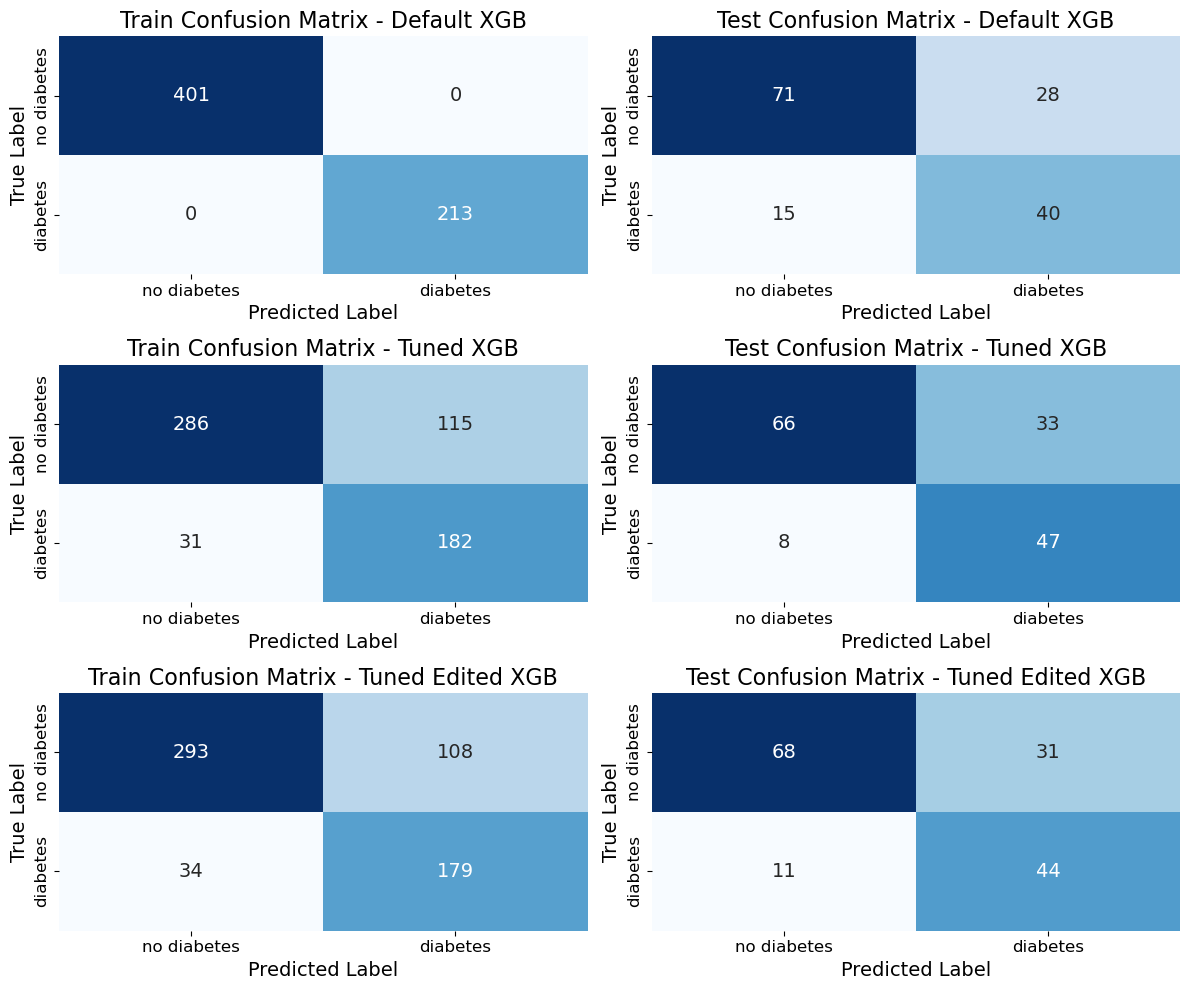

In [577]:
# confusion matrices

# calculate the confusion matrices
xgb_train = confusion_matrix(y_train,y_train_pred_xgb)
xgb_test = confusion_matrix(y_test,y_test_pred_xgb)

xgb_tuned_train = confusion_matrix(y_train,y_train_pred_xgb_gs)
xgb_tuned_test = confusion_matrix(y_test,y_test_pred_xgb_gs)

xgb_tuned2_train = confusion_matrix(y_train,y_train_pred_xgb2_gs)
xgb_tuned2_test = confusion_matrix(y_test,y_test_pred_xgb2_gs)

# set up the figure
fig,axes = plt.subplots(3,2,figsize=(12,10))

# a function to create a heatmap for the confusion matrices
def plot_cm(cm,ax,title):
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',ax=ax,cbar=False,
                xticklabels=['no diabetes','diabetes'],yticklabels=['no diabetes','diabetes'],
               annot_kws={'size':14})
    ax.set_xlabel('Predicted Label',fontsize=14)
    ax.set_ylabel('True Label',fontsize=14)
    ax.set_title(title,fontsize=16)
    ax.tick_params(axis='both',labelsize=12)

plot_cm(xgb_train,axes[0,0], 'Train Confusion Matrix - Default XGB')
plot_cm(xgb_test,axes[0,1], 'Test Confusion Matrix - Default XGB')

plot_cm(xgb_tuned_train,axes[1,0], 'Train Confusion Matrix - Tuned XGB')
plot_cm(xgb_tuned_test,axes[1,1], 'Test Confusion Matrix - Tuned XGB')

plot_cm(xgb_tuned2_train,axes[2,0], 'Train Confusion Matrix - Tuned Edited XGB')
plot_cm(xgb_tuned2_test,axes[2,1], 'Test Confusion Matrix - Tuned Edited XGB')

plt.tight_layout() 
plt.show()

The confusion matrices show/confirm that the XGB model fit to all features and tuned with a gridsearch of hyperparameters performs well on the train and test sets for having only a few false negatives.  However, this model also has a large number of false positives.  This may be a preferred model for ensuring that the majority of those likely to have T2DM are identified.  

### ROC curve
[top](#Contents)

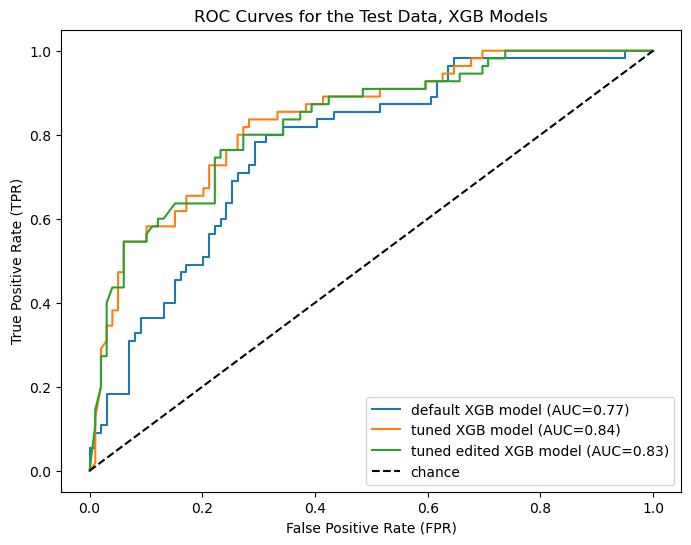

In [578]:
# ROC curves of the test data for three XGB models

fpr_xgb,tpr_xgb,_ = roc_curve(y_test,y_test_proba_xgb[:,1])
fpr_xgb_gs,tpr_xgb_gs,_ = roc_curve(y_test,y_test_proba_xgb_gs[:,1])
fpr_xgb2_gs,tpr_xgb2_gs,_ = roc_curve(y_test,y_test_proba_xgb2_gs[:,1])

# calculate the AUC scores
auc_xgb = roc_auc_score(y_test,y_test_proba_xgb[:,1])
auc_xgb_gs = roc_auc_score(y_test,y_test_proba_xgb_gs[:,1])
auc_xgb2_gs = roc_auc_score(y_test,y_test_proba_xgb2_gs[:,1])

plt.figure(figsize=(8,6))

plt.plot(fpr_xgb,tpr_xgb, label=f'default XGB model (AUC={auc_xgb:.2f})')
plt.plot(fpr_xgb_gs,tpr_xgb_gs, label=f'tuned XGB model (AUC={auc_xgb_gs:.2f})')
plt.plot(fpr_xgb2_gs,tpr_xgb2_gs, label=f'tuned edited XGB model (AUC={auc_xgb2_gs:.2f})')

# plot the chance line
plt.plot([0,1],[0,1], 'k--',label='chance')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.title('ROC Curves for the Test Data, XGB Models')

plt.show()

### Precision recall curve
[top](#Contents)

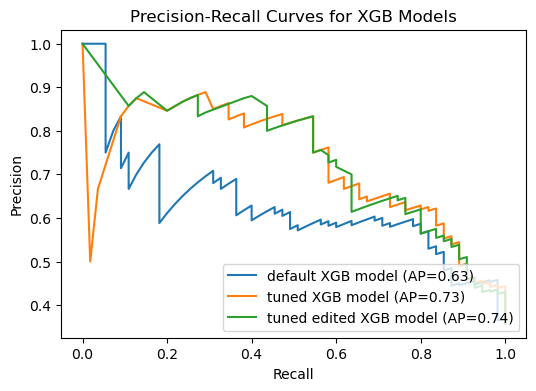

In [579]:
# precision recall curves of the test data for three XGB models

# get precision-recall values for each model
precision_xgb,recall_xgb,_ = precision_recall_curve(y_test,y_test_proba_xgb[:,1])
precision_xgb_gs,recall_xgb_gs,_ = precision_recall_curve(y_test,y_test_proba_xgb_gs[:,1])
precision_xgb2_gs,recall_xgb2_gs,_ = precision_recall_curve(y_test,y_test_proba_xgb2_gs[:,1])

# calculate the average precision (AP) scores for each model
ap_xgb = average_precision_score(y_test,y_test_proba_xgb[:,1])
ap_xgb_gs = average_precision_score(y_test,y_test_proba_xgb_gs[:,1])
ap_xgb2_gs = average_precision_score(y_test,y_test_proba_xgb2_gs[:,1])

# plot
plt.figure(figsize=(6,4))

plt.plot(recall_xgb,precision_xgb,label=f'default XGB model (AP={ap_xgb:.2f})')
plt.plot(recall_xgb_gs,precision_xgb_gs,label=f'tuned XGB model (AP={ap_xgb_gs:.2f})')
plt.plot(recall_xgb2_gs,precision_xgb2_gs,label=f'tuned edited XGB model (AP={ap_xgb2_gs:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for XGB Models')

plt.legend(loc='lower right')
plt.show()

The tuned model and the tuned edited model perform similarly.  The confusion matrix and AUC score gives a sligth edge to the undedited version.  

### Calibrate Predicted Probabilities
[top](#Contents)

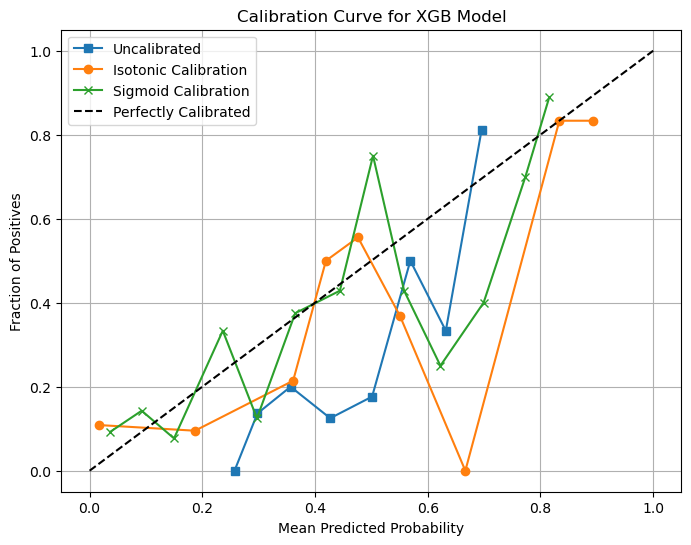

In [596]:
# the uncalibrated model has already been fit with GridsearchCV

# fit calibrated models with isotnic and sigmoid (Platt scaling) calibration
cal_isotonic_xgb = CalibratedClassifierCV(estimator=best_model_xgb,
                                        method='isotonic',cv='prefit')
cal_isotonic_xgb.fit(X_train,y_train)

cal_sigmoid_xgb = CalibratedClassifierCV(estimator=best_model_xgb,
                                        method='sigmoid',cv='prefit')
cal_sigmoid_xgb.fit(X_train,y_train)

# generate predicted probabilities
probs_uncalibrated_xgb = best_model_xgb.predict_proba(X_test)[:,1]
probs_isotonic_xgb = cal_isotonic_xgb.predict_proba(X_test)[:,1]
probs_sigmoid_xgb = cal_sigmoid_xgb.predict_proba(X_test)[:,1]

# compute calibration curves
prob_true_uncal_xgb, prob_pred_uncal_xgb = calibration_curve(y_test,probs_uncalibrated_xgb,n_bins=15)
prob_true_iso_xgb, prob_pred_iso_xgb = calibration_curve(y_test,probs_isotonic_xgb,n_bins=15)
prob_true_sig_xgb, prob_pred_sig_xgb = calibration_curve(y_test,probs_sigmoid_xgb,n_bins=15)

# plot the calibration curves
plt.figure(figsize=(8,6))
plt.plot(prob_pred_uncal_xgb,prob_true_uncal_xgb, 's-', label='Uncalibrated')
plt.plot(prob_pred_iso_xgb,prob_true_iso_xgb, 'o-', label='Isotonic Calibration')
plt.plot(prob_pred_sig_xgb,prob_true_sig_xgb, 'x-', label='Sigmoid Calibration')
plt.plot([0,1],[0,1], 'k--', label='Perfectly Calibrated')

plt.title('Calibration Curve for XGB Model')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend(loc='best')
plt.grid()
plt.show()

### Precision Recall Curve
[top](#Contents)

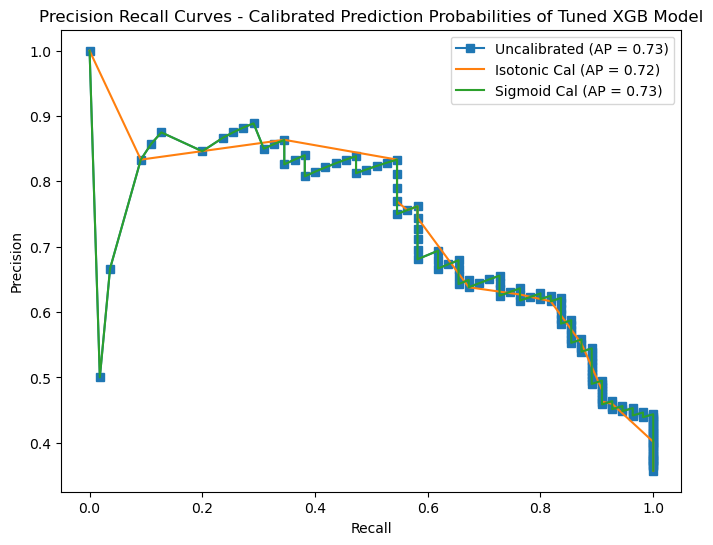

In [609]:
# calculate and plot precision recall curves on the calibrated predicition probabilities

precision_uncal_xgb, recall_uncal_xgb,_ = precision_recall_curve(y_test,probs_uncalibrated_xgb)
precision_iso_xgb, recall_iso_xgb,_ = precision_recall_curve(y_test,probs_isotonic_xgb)
precision_sigmoid_xgb, recall_sigmoid_xgb,_ = precision_recall_curve(y_test,probs_sigmoid_xgb)

# get average precision scores
ap_uncal_xgb = average_precision_score(y_test,probs_uncalibrated_xgb)
ap_iso_xgb = average_precision_score(y_test,probs_isotonic_xgb)
ap_sigmoid_xgb = average_precision_score(y_test,probs_sigmoid_xgb)

# plot the curve
plt.figure(figsize=(8,6))
plt.plot(recall_uncal_xgb,precision_uncal_xgb, 's-', label=f'Uncalibrated (AP = {ap_uncal_xgb:.2f})')
plt.plot(recall_iso_xgb,precision_iso_xgb, label=f'Isotonic Cal (AP = {ap_iso_xgb:.2f})')
plt.plot(recall_sigmoid_xgb,precision_sigmoid_xgb,label=f'Sigmoid Cal (AP = {ap_sigmoid_xgb:.2f})')

plt.title('Precision Recall Curves - Calibrated Prediction Probabilities of Tuned XGB Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')

plt.show()

### Classification Report
[top](#Contents)

In [613]:
# generate the classification report on calibrated tuned XGB model predicted probabilities

y_pred_xgb_uncal = best_model_xgb.predict(X_test)
y_pred_xgb_isotonic = cal_isotonic_xgb.predict(X_test)
y_pred_xgb_sigmoid = cal_sigmoid_xgb.predict(X_test)

print('Classification Report - Calibrated Tuned XGB Model Predicted Probabilities')
print(f'\nTuned XGB Uncalibrated: \n{classification_report(y_test,y_pred_xgb_uncal)}')
print(f'\nTuned XGB Isotonic Calibrated: \n{classification_report(y_test,y_pred_xgb_isotonic)}')
print(f'\nTuned XGB Sigmoid Calibrated: \n{classification_report(y_test,y_pred_xgb_sigmoid)}')

Classification Report - Calibrated Tuned XGB Model Predicted Probabilities

Tuned XGB Uncalibrated: 
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        99
           1       0.59      0.85      0.70        55

    accuracy                           0.73       154
   macro avg       0.74      0.76      0.73       154
weighted avg       0.78      0.73      0.74       154


Tuned XGB Isotonic Calibrated: 
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


Tuned XGB Sigmoid Calibrated: 
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        99
           1       0.65      0.71      0.68        55

    accuracy    

Similar to the affect of calibrated random forest predicted probabilities, the calibrated XGB model predicted probabilities have higher precision scores but significantly lower recall scores on the minority class (1).

The calibrated predicted probabilities show less over-forecasting on the calibration curve plot, suggesting that the predicted probabilities are reduced and causing more false negative predictions for the minority class.  

Considering the saw-tooth shape of the calibration curves, it is possible that the model(s) are not fit properly.  However, the classification report metrics for both the random forest and XGB models show only low to moderate overfitting.  

## ANN
[top](#Contents)

In [114]:
pipeline_mlp = Pipeline(steps=[
    ('preprocessor',preprocessor_pipeline),
    ('mlp',MLPClassifier(max_iter=1000,random_state=42))
])

pipeline_mlp

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('impute',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    remainder='passthrough',
                                                    transformers=[('impute',
                                                                   SimpleImputer(strategy='median'),
                                                                   ['Glucose',
                                                                    'BloodPressure',
                                                                    'SkinThickness',
                                                                    'Insulin',
                                                                    'BMI'])],
                                                    verbose_feature_names_out=False)),
                                 ('add_interaction', AddInteractionFeatures()),
                                 ('bin_features', BinFe...
                                                    remainder='passthrough',
                                                    transformers=[('scale',
                                                                   StandardScaler(),
                                                                   ['Glucose',
                                                                    'BloodPressure',
                                                                    'SkinThickness',
                                                                    'Insulin',
                                                                    'BMI',
                                                                    'Pregnancies',
                                                                    'DiabetesPedigreeFunction',
                                                                    'Age',
                                                                    'GlucoseXAge',
                                                                    'GlucoseXBMI',
                                                                    'InsulinXBMI',
                                                                    'GlucoseInsulinRatio',
                                                                    'BMISqrd',
                                                                    'GlucoseSqrd',
                                                                    'AgeSqrd'])],
                                                    verbose_feature_names_out=False))])),
                ('mlp', MLPClassifier(max_iter=1000, random_state=42))])

### Performance metrics
[top](#Contents)

In [142]:
model_mlp = pipeline_mlp.fit(X_train, y_train)

y_train_pred_mlp = model_mlp.predict(X_train)
y_test_pred_mlp = model_mlp.predict(X_test)

y_train_proba_mlp = model_mlp.predict_proba(X_train)
y_test_proba_mlp = model_mlp.predict_proba(X_test)

In [143]:
# AUC scores for the ANN default parameters (max_iter set to 600 for convergance)

print(f'AUC scores for the default MLP classifier model')
print(f'train data set: {roc_auc_score(y_train,y_train_proba_mlp[:,1]):.3f}')
print(f'test data set: {roc_auc_score(y_test,y_test_proba_mlp[:,1]):.3f}')

AUC scores for the default MLP classifier model
train data set: 0.980
test data set: 0.779


### Hyperparameter tuning with Gridsearch
[top](#Contents)

{'mlp__activation': 'relu', 'mlp__alpha': 1, 'mlp__hidden_layer_sizes': (7,), 'mlp__learning_rate': 'constant', 'mlp__random_state': 42, 'mlp__solver': 'adam'}

In [144]:
parameters_mlp = {
    'mlp__hidden_layer_sizes':[(5,),(6,),(7,),(5,5),(5,6),(5,7)],
    'mlp__activation':['logistic','relu','tanh'],
    'mlp__solver':['lbfgs','sgd','adam'],
    'mlp__alpha':[0.1,0.5,1,2],
    'mlp__learning_rate':['constant','adaptive'],
    'mlp__random_state':[42]
}

cv = StratifiedKFold(n_splits=5)

gs_mlp = GridSearchCV(estimator=model_mlp,param_grid=parameters_mlp,cv=cv,
                      scoring='roc_auc',n_jobs=-1,verbose=1)

# get the start time
start_time = time.time()

# fit the grid search on the training data
gs_mlp.fit(X_train,y_train)

# get the end and elapsed time
end_time = time.time()
elapsed_time = end_time - start_time

# best score and parameters
best_aucscore_mlp = gs_mlp.best_score_
best_parameters_mlp = gs_mlp.best_params_
best_model_mlp = gs_mlp.best_estimator_

# print
print(f'\nAUC score: {best_aucscore_mlp:.3f}')
print(f'\nbest parameters: \n{best_parameters_mlp}')

print(f'\nelapsed time (sec): {elapsed_time:.2f}')
print(f'elapsed time (min): {(elapsed_time)/60:.2f}')  

Fitting 5 folds for each of 432 candidates, totalling 2160 fits

AUC score: 0.856

best parameters: 
{'mlp__activation': 'relu', 'mlp__alpha': 1, 'mlp__hidden_layer_sizes': (7,), 'mlp__learning_rate': 'constant', 'mlp__random_state': 42, 'mlp__solver': 'adam'}

elapsed time (sec): 56.58
elapsed time (min): 0.94


In [145]:
# get metrics on the tuned MLP classification model

y_train_pred_mlp_gs = gs_mlp.predict(X_train)
y_test_pred_mlp_gs = gs_mlp.predict(X_test)

y_train_proba_mlp_gs = gs_mlp.predict_proba(X_train)
y_test_proba_mlp_gs = gs_mlp.predict_proba(X_test)

In [146]:
# AUC scores on the tuned MLP classifier model

print('AUC scores for tuned MLP classifier model')
print(f'train data set: {roc_auc_score(y_train,y_train_proba_mlp_gs[:,1]):.3f}')
print(f'test data set: {roc_auc_score(y_test,y_test_proba_mlp_gs[:,1]):.3f}')

AUC scores for tuned MLP classifier model
train data set: 0.877
test data set: 0.824


### Classification report
[top](#Contents)

In [147]:
# classification report, default and tuned MLP hyperparameters

print(f'classification report for MLP classification models')

print(f'\ntrain data, MLP default: \n{classification_report(y_train,y_train_pred_mlp)}')
print(f'\ntest data, MLP default: \n{classification_report(y_test,y_test_pred_mlp)}')

print(f'\ntrain data, MLP tuned: \n{classification_report(y_train,y_train_pred_mlp_gs)}')
print(f'\ntest data, MLP tuned: \n{classification_report(y_test,y_test_pred_mlp_gs)}')

classification report for MLP classification models

train data, MLP default: 
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       401
           1       0.89      0.91      0.90       213

    accuracy                           0.93       614
   macro avg       0.92      0.92      0.92       614
weighted avg       0.93      0.93      0.93       614


test data, MLP default: 
              precision    recall  f1-score   support

           0       0.83      0.73      0.77        99
           1       0.60      0.73      0.66        55

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.73      0.73       154


train data, MLP tuned: 
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       401
           1       0.73      0.68      0.70       213

    accuracy                           0.80       61

### Confusion matrix
[top](#Contents)

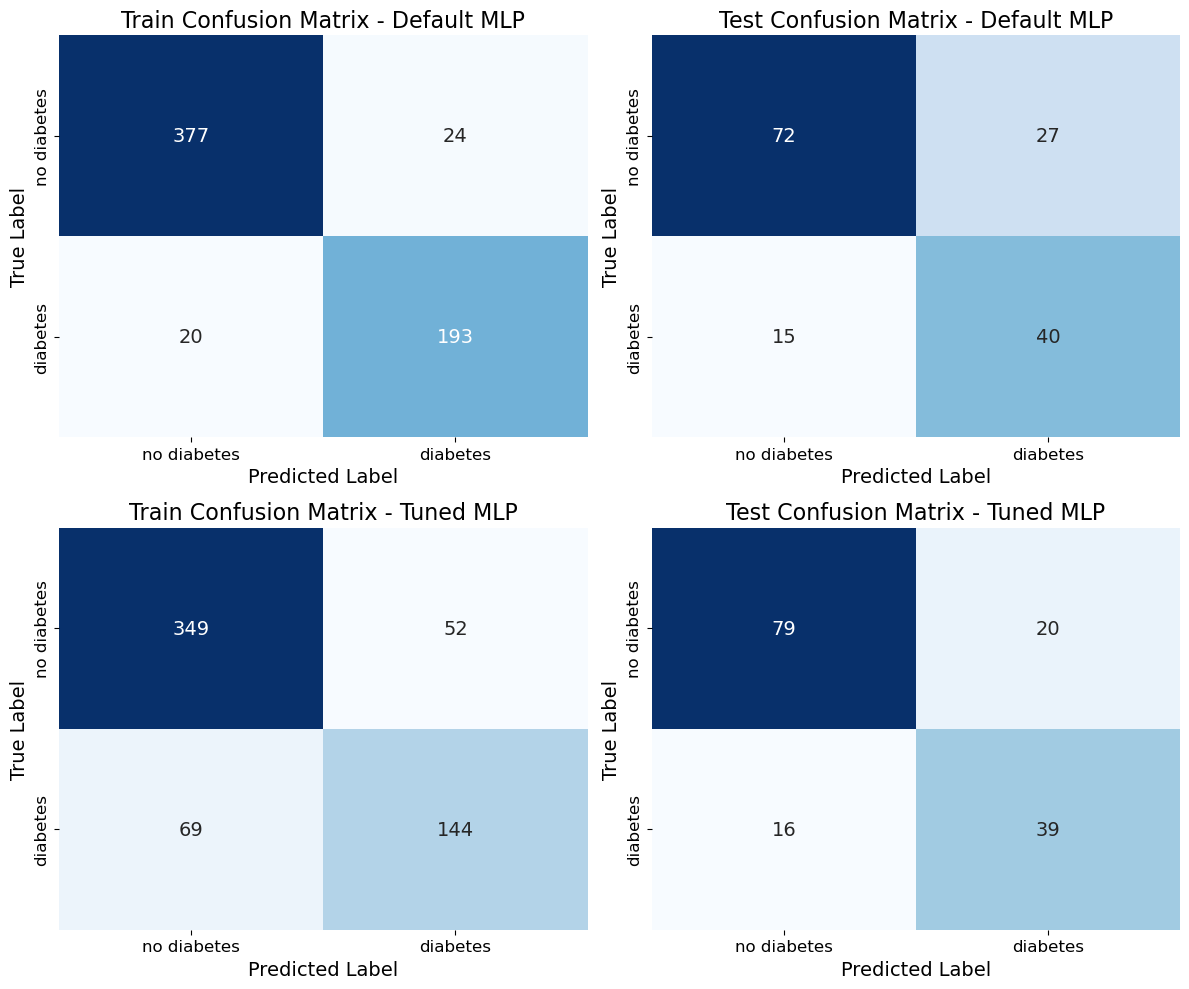

In [149]:
# confusion matrices

# calculate the confusion matrices
mlp_train = confusion_matrix(y_train,y_train_pred_mlp)
mlp_test = confusion_matrix(y_test,y_test_pred_mlp)

mlp_tuned_train = confusion_matrix(y_train,y_train_pred_mlp_gs)
mlp_tuned_test = confusion_matrix(y_test,y_test_pred_mlp_gs)

# set up the figure
fig,axes = plt.subplots(2,2,figsize=(12,10))

# a function to create a heatmap for the confusion matrices
def plot_cm(cm,ax,title):
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',ax=ax,cbar=False,
                xticklabels=['no diabetes','diabetes'],yticklabels=['no diabetes','diabetes'],
               annot_kws={'size':14})
    ax.set_xlabel('Predicted Label',fontsize=14)
    ax.set_ylabel('True Label',fontsize=14)
    ax.set_title(title,fontsize=16)
    ax.tick_params(axis='both',labelsize=12)

plot_cm(mlp_train,axes[0,0], 'Train Confusion Matrix - Default MLP')
plot_cm(mlp_test,axes[0,1], 'Test Confusion Matrix - Default MLP')

plot_cm(mlp_tuned_train,axes[1,0], 'Train Confusion Matrix - Tuned MLP')
plot_cm(mlp_tuned_test,axes[1,1], 'Test Confusion Matrix - Tuned MLP')

plt.tight_layout() 
plt.show()

### ROC curve
[top](#Contents)

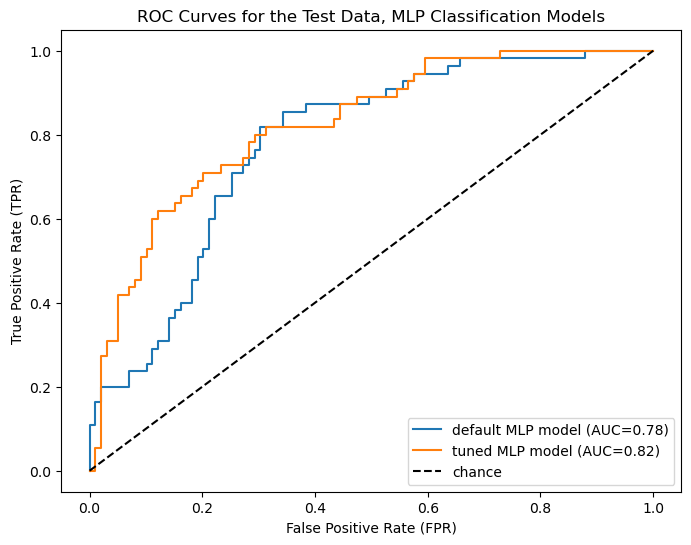

In [150]:
# ROC curves of the test data for three random forest models

fpr_mlp,tpr_mlp,_ = roc_curve(y_test,y_test_proba_mlp[:,1])
fpr_mlp_gs,tpr_mlp_gs,_ = roc_curve(y_test,y_test_proba_mlp_gs[:,1])

# calculate the AUC scores
auc_mlp = roc_auc_score(y_test,y_test_proba_mlp[:,1])
auc_mlp_gs = roc_auc_score(y_test,y_test_proba_mlp_gs[:,1])

plt.figure(figsize=(8,6))

plt.plot(fpr_mlp,tpr_mlp, label=f'default MLP model (AUC={auc_mlp:.2f})')
plt.plot(fpr_mlp_gs,tpr_mlp_gs, label=f'tuned MLP model (AUC={auc_mlp_gs:.2f})')

# plot the chance line
plt.plot([0,1],[0,1], 'k--',label='chance')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.title('ROC Curves for the Test Data, MLP Classification Models')

plt.show()

### Precision recall curve
[top](#Contents)

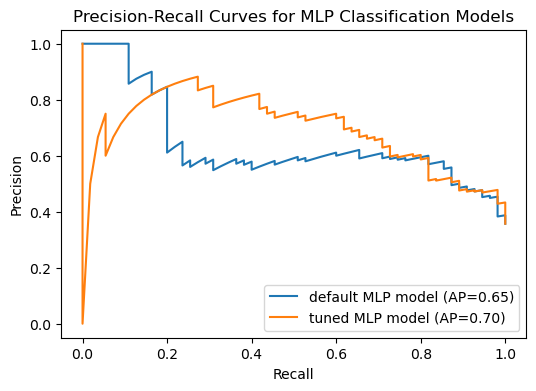

In [151]:
# precision recall curves of the test data for three XGB models

# get precision-recall values for each model
precision_mlp,recall_mlp,_ = precision_recall_curve(y_test,y_test_proba_mlp[:,1])
precision_mlp_gs,recall_mlp_gs,_ = precision_recall_curve(y_test,y_test_proba_mlp_gs[:,1])

# calculate the average precision (AP) scores for each model
ap_mlp = average_precision_score(y_test,y_test_proba_mlp[:,1])
ap_mlp_gs = average_precision_score(y_test,y_test_proba_mlp_gs[:,1])

# plot
plt.figure(figsize=(6,4))

plt.plot(recall_mlp,precision_mlp,label=f'default MLP model (AP={ap_mlp:.2f})')
plt.plot(recall_mlp_gs,precision_mlp_gs,label=f'tuned MLP model (AP={ap_mlp_gs:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for MLP Classification Models')

plt.legend(loc='lower right')
plt.show()

The sharp drop in precision for the tuned MLP model is likely due to class imbalance.  This also occurs for the tuned Random Forest models, and similar to the MLP model, this unusual shape is seen for the tuned models but not the default models.  

# Brier & Log-Loss Scores
[top](#Contents)

In [400]:
# calculate the baseline Brier score
p_majority = y_train.mean() # proportion of positive class in training set

baseline_brier_score = np.mean((p_majority - y_test) **2)

# calculate the baseline log-loss score
baseline_pred_proba = np.full_like(y_test,p_majority,dtype=float)
baseline_log_loss = log_loss(y_test,baseline_pred_proba)

# initialize models
pipelines = {
    'Logistic Regression':Pipeline(steps=[
    ('preprocessor',preprocessor_pipeline),
    ('lr',LogisticRegression(C=550,class_weight='balanced',max_iter=500,penalty='l1',
                             solver='liblinear',random_state=42
                            ))
    ]),

    'KNN':Pipeline(steps=[
    ('preprocessor',preprocessor_pipeline),
    ('knn',KNeighborsClassifier(algorithm='auto',leaf_size=3,metric='manhattan',n_neighbors=36,
                               weights='uniform'
                               ))
    ]),

    'Random Forest':Pipeline(steps=[
    ('preprocessor',preprocessor_pipeline),
    ('rf',RandomForestClassifier(bootstrap=True,class_weight='balanced_subsample',criterion='entropy',
                                 max_depth=5,max_features='sqrt',min_samples_leaf=3,min_samples_split=12,
                                 n_estimators=55,random_state=42
                                ))
    ]),

    'XGB':Pipeline(steps=[
    ('preprocessor',preprocessor_pipeline),
    ('xgb',XGBClassifier(colsample_bytree=0.7,gamma=0.3,learning_rate=0.04,max_depth=2,
                         min_child_weight=7,n_estimators=35,reg_alpha=0.6,reg_lambda=2,
                         scale_pos_weight=2,subsample=0.6,random_state=42
                        ))
    ]),

    'MLP':Pipeline(steps=[
    ('preprocessor',preprocessor_pipeline),
    ('mlp',MLPClassifier(activation='relu',alpha=1,hidden_layer_sizes=(7,),learning_rate='constant',
                         solver='adam',max_iter=1000,random_state=42
                        ))
    ])
}

# train and compute Brier scores
brier_scores = {}
log_loss_scores = {}

for name, pipeline in pipelines.items():
    pipeline.fit(X_train,y_train) # train the pipeline
    y_prob = pipeline.predict_proba(X_test)[:,1] # get probabilities for the positive class
    brier_scores[name] = brier_score_loss(y_test,y_prob)
    log_loss_scores[name] = log_loss(y_test,y_prob)

# print scores
print('Brier Scores')
print(f'Baseline Brier score: {baseline_brier_score:.4f}')
for model, score in brier_scores.items():
    print(f'{model}: {score:.4f}')
    
print()

print('Log-Loss Scores')
print(f'Baseline log-loss score: {baseline_log_loss:.4f}')
for model, score in log_loss_scores.items():
    print(f'{model}: {score:.4f}')

Brier Scores
Baseline Brier score: 0.2297
Logistic Regression: 0.1735
KNN: 0.1627
Random Forest: 0.1663
XGB: 0.1845
MLP: 0.1654

Log-Loss Scores
Baseline log-loss score: 0.6520
Logistic Regression: 0.5250
KNN: 0.4912
Random Forest: 0.4977
XGB: 0.5504
MLP: 0.4965


the KNN model had the lowest Brier and log-loss scores and, therefore, provides the most reliable prediction probabilities.  However, the KNN model has the lowest recall of the five models.  The XGB model has the highest Brier score and may need better hyperparameter tuning or possibly calibration of its predective probabilities.  

# ROC curves - aggregate
[top](#Contents)

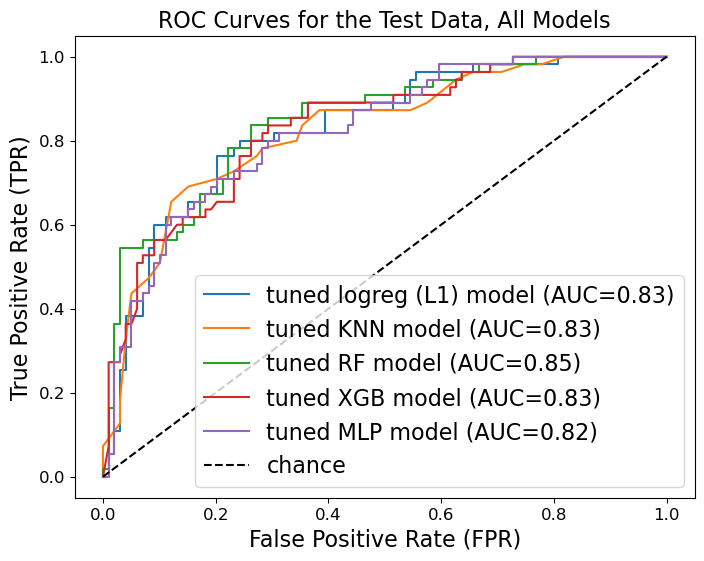

In [362]:
plt.figure(figsize=(8,6))

plt.plot(fpr_l1,tpr_l1, label=f'tuned logreg (L1) model (AUC={auc_l1:.2f})')
plt.plot(fpr_knn_gs,tpr_knn_gs, label=f'tuned KNN model (AUC={auc_knn_gs:.2f})')
plt.plot(fpr_rf_gs,tpr_rf_gs, label=f'tuned RF model (AUC={auc_rf_gs:.2f})')
plt.plot(fpr_xgb_gs,tpr_xgb_gs, label=f'tuned XGB model (AUC={auc_xgb_gs:.2f})')
plt.plot(fpr_mlp_gs,tpr_mlp_gs, label=f'tuned MLP model (AUC={auc_mlp_gs:.2f})')

# plot the chance line
plt.plot([0,1],[0,1], 'k--',label='chance')

plt.xlabel('False Positive Rate (FPR)', fontsize=16)
plt.ylabel('True Positive Rate (TPR)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower right', prop={'size':16})
plt.title('ROC Curves for the Test Data, All Models', fontsize=16)

plt.show()

# Precision recall curves - aggregate
[top](#Contents)

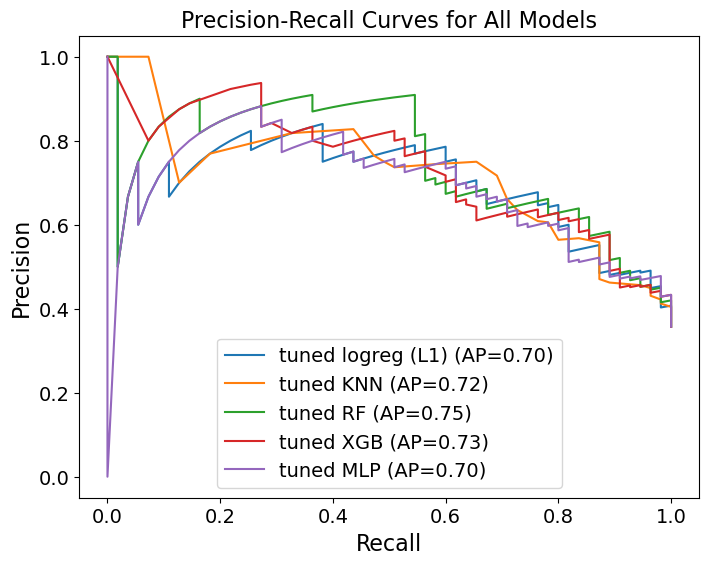

In [363]:
# precision recall curves of the test data for all models

# plot
plt.figure(figsize=(8,6))

plt.plot(recall_l1,precision_l1,label=f'tuned logreg (L1) (AP={ap_l1:.2f})')
plt.plot(recall_knn_gs,precision_knn_gs,label=f'tuned KNN (AP={ap_knn_gs:.2f})')
plt.plot(recall_rf_gs,precision_rf_gs,label=f'tuned RF (AP={ap_rf_gs:.2f})')
plt.plot(recall_xgb_gs,precision_xgb_gs,label=f'tuned XGB (AP={ap_xgb_gs:.2f})')
plt.plot(recall_mlp_gs,precision_mlp_gs,label=f'tuned MLP (AP={ap_mlp_gs:.2f})')

plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Precision-Recall Curves for All Models', fontsize=16)

plt.legend(loc='lower center', prop={'size':14})
plt.show()

# Train vs test fits - aggregate
[top](#Contents)

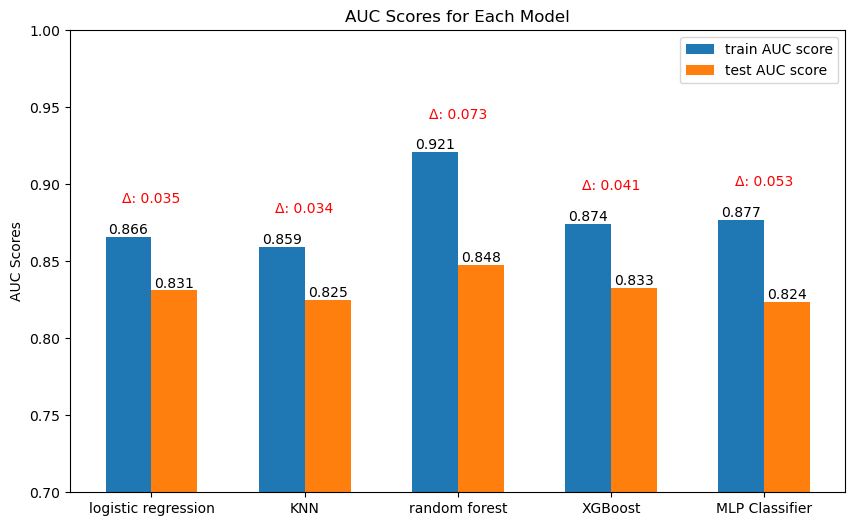

In [364]:
# visualize the comparative fits, train vs test, for each model

auc_lr_l1_train = roc_auc_score(y_train,y_train_proba_l1[:,1])
auc_lr_l1_test = roc_auc_score(y_test,y_test_proba_l1[:,1])

auc_knn_train = roc_auc_score(y_train,y_train_proba_knn_gs[:,1])
auc_knn_test = roc_auc_score(y_test,y_test_proba_knn_gs[:,1])

auc_pca_knn_train = roc_auc_score(y_train,y_train_proba_knn_gs[:,1])
auc_pca_knn_test = roc_auc_score(y_test,y_test_proba_knn_gs[:,1])

auc_rf_gs_train = roc_auc_score(y_train,y_train_proba_rf_gs[:,1])
auc_rf_gs_test = roc_auc_score(y_test,y_test_proba_rf_gs[:,1])

auc_xgb_gs_train = roc_auc_score(y_train,y_train_proba_xgb_gs[:,1])
auc_xgb_gs_test = roc_auc_score(y_test,y_test_proba_xgb_gs[:,1])

auc_mlp_gs_train = roc_auc_score(y_train,y_train_proba_mlp_gs[:,1])
auc_mlp_gs_test = roc_auc_score(y_test,y_test_proba_mlp_gs[:,1])

# plot the AUC values for each model

models = ['logistic regression','KNN','random forest','XGBoost', 'MLP Classifier']

train_auc = [auc_lr_l1_train, auc_knn_train, auc_rf_gs_train, auc_xgb_gs_train, 
            auc_mlp_gs_train]
test_auc = [auc_lr_l1_test, auc_knn_test, auc_rf_gs_test, auc_xgb_gs_test, 
            auc_mlp_gs_test]

bar_width = 0.3
index = np.arange(len(models))

plt.figure(figsize=(10,6))

train_bars = plt.bar(index, train_auc, bar_width, label = 'train AUC score')
test_bars = plt.bar(index + bar_width, test_auc, bar_width, label = 'test AUC score')

plt.ylabel('AUC Scores')
plt.title('AUC Scores for Each Model')
plt.xticks(index+bar_width/2,models)
plt.ylim(0.7,1)
plt.legend(loc='upper right')

for i, rect in enumerate(train_bars):
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, height, f'{train_auc[i]:.3f}',
             ha='center', va='bottom')

for i, rect in enumerate(test_bars):
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, height, f'{test_auc[i]:.3f}',
             ha='center', va='bottom')

# show the difference in AUC scores on the plot
auc_delta = [train - test for train, test in zip(train_auc,test_auc)]

for i in range(len(models)):
    deltaAUC = auc_delta[i]
    plt.text(index[i] + bar_width/2, max(train_auc[i], test_auc[i])+0.02,
             f'\u0394: {deltaAUC:.3f}', ha='center', va='bottom', color='red')
    
plt.show()

# Classification metrics - aggregate
[top](#Contents)

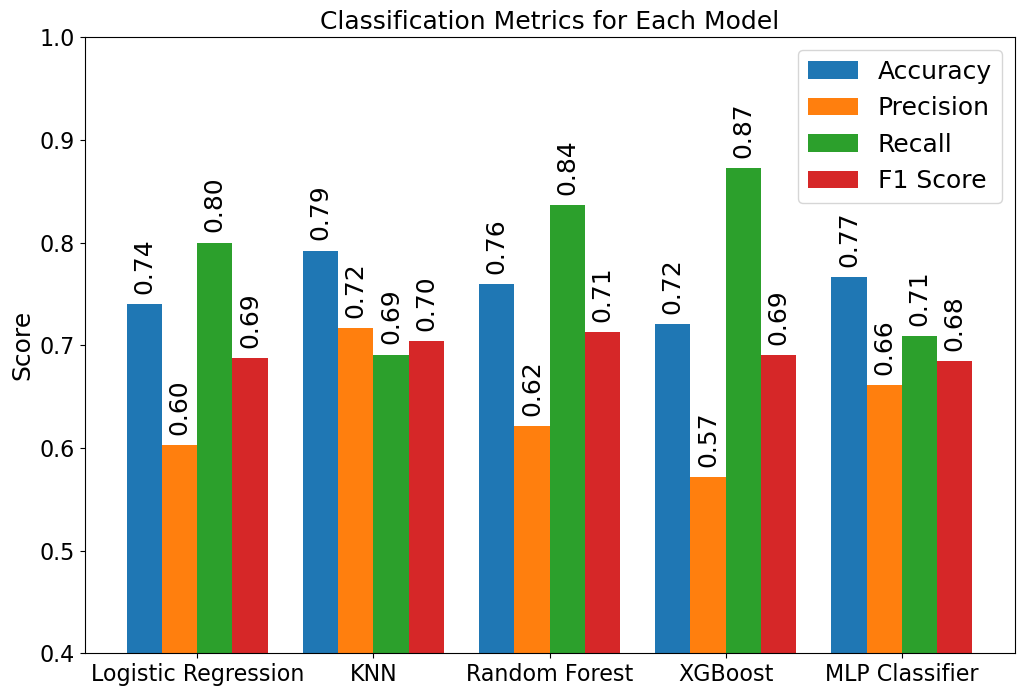

In [365]:
models = ['Logistic Regression','KNN','Random Forest','XGBoost', 'MLP Classifier']

# calculate metrics for each model
accuracy_lr_l1 = accuracy_score(y_test,y_test_pred_l1)
precision_lr_l1 = precision_score(y_test,y_test_pred_l1)
recall_lr_l1 = recall_score(y_test,y_test_pred_l1)
f1_lr_l1 = f1_score(y_test,y_test_pred_l1)

accuracy_knn_gs = accuracy_score(y_test,y_test_pred_knn_gs)
precision_knn_gs = precision_score(y_test,y_test_pred_knn_gs)
recall_knn_gs = recall_score(y_test,y_test_pred_knn_gs)
f1_knn_gs = f1_score(y_test,y_test_pred_knn_gs)

accuracy_rf_gs = accuracy_score(y_test,y_test_pred_rf_gs)
precision_rf_gs = precision_score(y_test,y_test_pred_rf_gs)
recall_rf_gs = recall_score(y_test,y_test_pred_rf_gs)
f1_rf_gs = f1_score(y_test,y_test_pred_rf_gs)

accuracy_xgb_gs = accuracy_score(y_test,y_test_pred_xgb_gs)
precision_xgb_gs = precision_score(y_test,y_test_pred_xgb_gs)
recall_xgb_gs = recall_score(y_test,y_test_pred_xgb_gs)
f1_xgb_gs = f1_score(y_test,y_test_pred_xgb_gs)

accuracy_mlp_gs = accuracy_score(y_test,y_test_pred_mlp_gs)
precision_mlp_gs = precision_score(y_test,y_test_pred_mlp_gs)
recall_mlp_gs = recall_score(y_test,y_test_pred_mlp_gs)
f1_mlp_gs = f1_score(y_test,y_test_pred_mlp_gs)

# list of models per metric
accuracy = [accuracy_lr_l1,accuracy_knn_gs,accuracy_rf_gs,accuracy_xgb_gs,accuracy_mlp_gs]
precision = [precision_lr_l1,precision_knn_gs,precision_rf_gs,precision_xgb_gs,precision_mlp_gs]
recall = [recall_lr_l1,recall_knn_gs,recall_rf_gs,recall_xgb_gs,recall_mlp_gs]
f1 = [f1_lr_l1,f1_knn_gs,f1_rf_gs,f1_xgb_gs,f1_mlp_gs]

# group the metrics into a list
metrics = [accuracy,precision,recall,f1]
metrics_labels = ['Accuracy','Precision','Recall','F1 Score']

# set up the plot
bar_width = 0.2
index = np.arange(len(models))
plt.figure(figsize=(12,8))

for i in range(len(metrics)):
    bars = plt.bar(index + i * bar_width, metrics[i], bar_width,label=metrics_labels[i])

    # annotate bars with the metric values
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}',
                 ha='center',va='bottom',fontsize=18,rotation=90)

plt.ylabel('Score', fontsize=18)
plt.title('Classification Metrics for Each Model', fontsize=18)
plt.xticks(index + bar_width*1.5, models, fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0.4,1)

plt.legend(loc='best', prop={'size':18})
plt.show()

# Confusion matrices - aggregate
[top](#Contents)

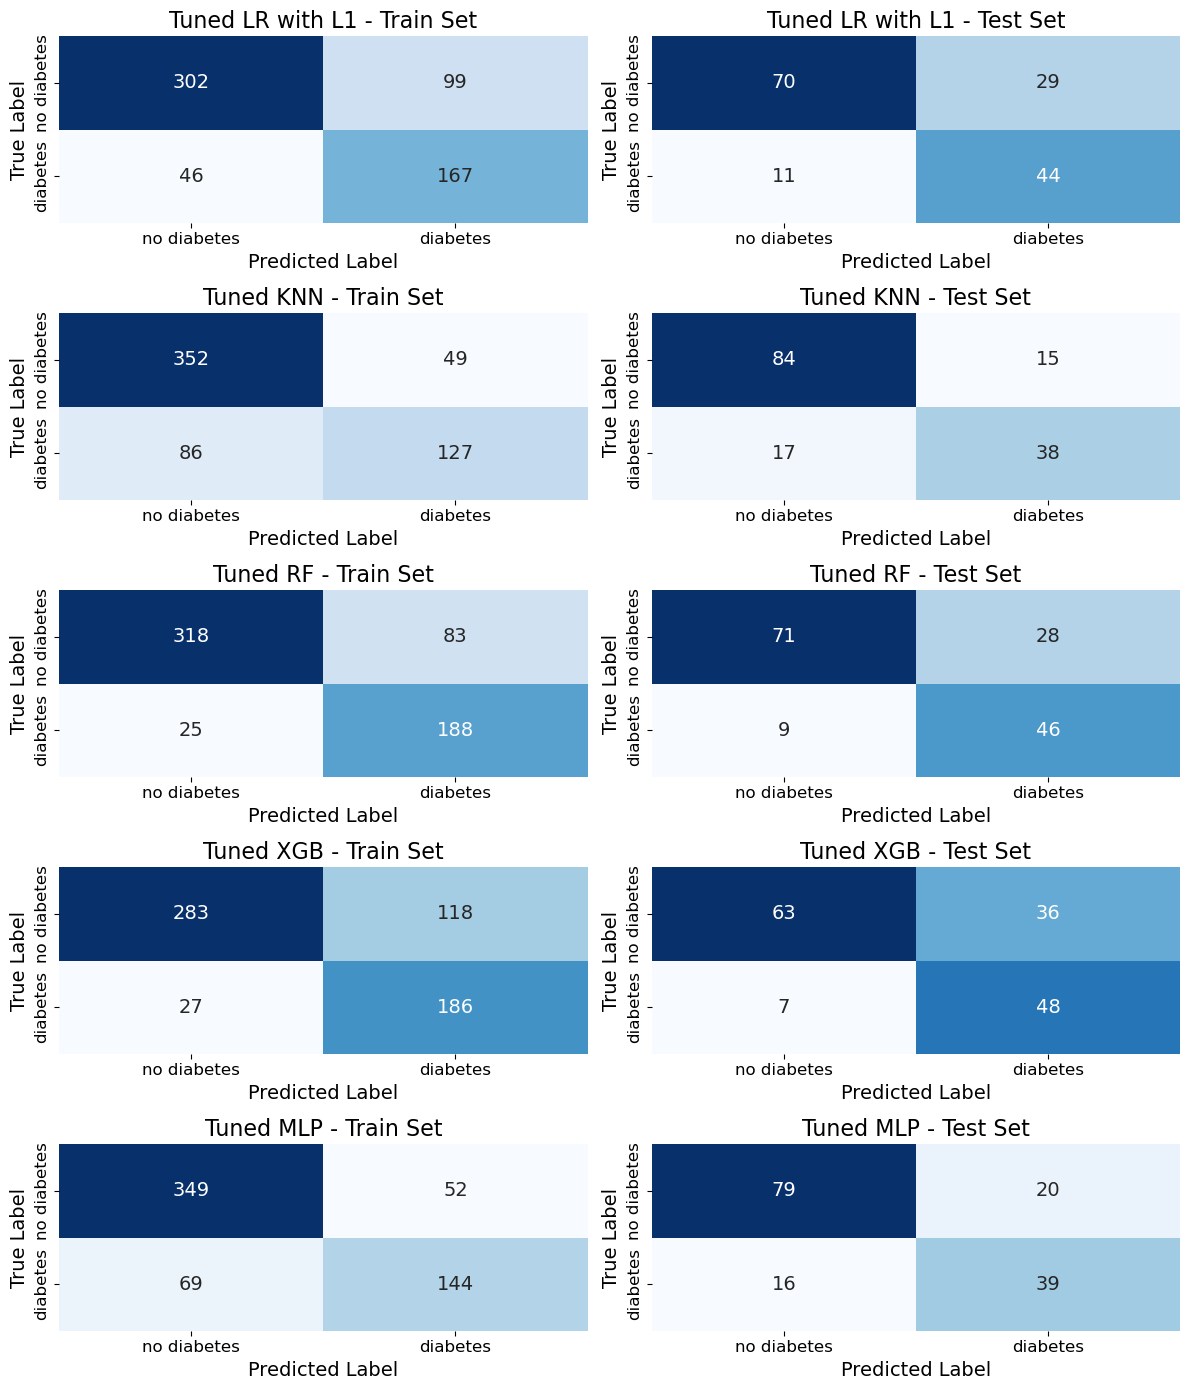

In [366]:
# confusion matrices

# calculate the confusion matrices
cm_l1_train = confusion_matrix(y_train,y_train_pred_l1)
cm_l1_test = confusion_matrix(y_test,y_test_pred_l1)

knn_tuned_train = confusion_matrix(y_train,y_train_pred_knn_gs)
knn_tuned_test = confusion_matrix(y_test,y_test_pred_knn_gs)

rf_tuned_train = confusion_matrix(y_train,y_train_pred_rf_gs)
rf_tuned_test = confusion_matrix(y_test,y_test_pred_rf_gs)

xgb_tuned_train = confusion_matrix(y_train,y_train_pred_xgb_gs)
xgb_tuned_test = confusion_matrix(y_test,y_test_pred_xgb_gs)

mlp_tuned_train = confusion_matrix(y_train,y_train_pred_mlp_gs)
mlp_tuned_test = confusion_matrix(y_test,y_test_pred_mlp_gs)

# set up the figure
fig,axes = plt.subplots(5,2,figsize=(12,14))

# a function to create a heatmap for the confusion matrices
def plot_cm(cm,ax,title):
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',ax=ax,cbar=False,
                xticklabels=['no diabetes','diabetes'],yticklabels=['no diabetes','diabetes'],
               annot_kws={'size':14})
    ax.set_xlabel('Predicted Label',fontsize=14)
    ax.set_ylabel('True Label',fontsize=14)
    ax.set_title(title,fontsize=16)
    ax.tick_params(axis='both',labelsize=12)

plot_cm(cm_l1_train,axes[0,0], 'Tuned LR with L1 - Train Set')
plot_cm(cm_l1_test,axes[0,1], 'Tuned LR with L1 - Test Set')

plot_cm(knn_tuned_train,axes[1,0], 'Tuned KNN - Train Set')
plot_cm(knn_tuned_test,axes[1,1], 'Tuned KNN - Test Set')

plot_cm(rf_tuned_train,axes[2,0], 'Tuned RF - Train Set')
plot_cm(rf_tuned_test,axes[2,1], 'Tuned RF - Test Set')

plot_cm(xgb_tuned_train,axes[3,0], 'Tuned XGB - Train Set')
plot_cm(xgb_tuned_test,axes[3,1], 'Tuned XGB - Test Set')

plot_cm(mlp_tuned_train,axes[4,0], 'Tuned MLP - Train Set')
plot_cm(mlp_tuned_test,axes[4,1], 'Tuned MLP - Test Set')

plt.tight_layout() 
plt.show()

# Stacking models
[top](#Contents)

In [ ]:
from sklearn.ensemble import StackingClassifier

# define the base models
base_models = [
    ('xgb', XGBClassifier(random_state=42)),
    ('mlp', MLPClassifier(max_iter=2000,random_state=42))
]

# create the stacking classifier
stacking_model = StackingClassifier(
    estimators = base_models,
    final_estimator = LogisticRegression(max_iter=200,random_state=42),
    cv=5
)

# create the pipeline
pipeline_stacking = Pipeline(steps=[
    ('preprocessor', preprocessor_pipeline),
    ('feature_selector',TTestBonfSelector(alpha=0.05)),
    ('stacking', stacking_model)
])

# fit the pipeline
pipeline_stacking.fit(X_train,y_train)

# evaluate the model on the train set
y_pred_train = pipeline_stacking.predict(X_train)

# calculate metrics - train set
accuracy_stack_train = accuracy_score(y_train,y_pred_train)
precision_stack_train = precision_score(y_train,y_pred_train)
recall_stack_train = recall_score(y_train,y_pred_train)
f1_stack_train = f1_score(y_train,y_pred_train)

# evaluate the model on the test set
y_pred_test = pipeline_stacking.predict(X_test)

# calculate metrics - test set
accuracy_stack_test = accuracy_score(y_test,y_pred_test)
precision_stack_test = precision_score(y_test,y_pred_test)
recall_stack_test = recall_score(y_test,y_pred_test)
f1_stack_test = f1_score(y_test,y_pred_test)

print('Train set metrics')
print(f'Accuracy: {accuracy_stack_train:.2f}')
print(f'Precistion: {precision_stack_train:.2f}')
print(f'Recall: {recall_stack_train:.2f}')
print(f'F1 score: {f1_stack_train:.2f}')

print('\nTest set metrics')
print(f'Accuracy: {accuracy_stack_test:.2f}')
print(f'Precistion: {precision_stack_test:.2f}')
print(f'Recall: {recall_stack_test:.2f}')
print(f'F1 score: {f1_stack_test:.2f}')

In [ ]:
# define the base models
base_models = [
    ('xgb', XGBClassifier(random_state=42)),
    ('mlp', MLPClassifier(activation='relu',alpha=0.01,hidden_layer_sizes=(23,),
                          learning_rate='constant',solver='sgd',max_iter=2000,
                          random_state=42))
]

# create the stacking classifier
stacking_model = StackingClassifier(
    estimators = base_models,
    final_estimator = LogisticRegression(),
    cv=5
)

# create the pipeline
pipeline_stacking = Pipeline(steps=[
    ('preprocessor', preprocessor_pipeline),
    ('feature_selector',TTestBonfSelector(alpha=0.05)),
    ('stacking', stacking_model)
])

# fit the pipeline
pipeline_stacking.fit(X_train,y_train)

# evaluate the model on the train set
y_pred_train = pipeline_stacking.predict(X_train)

# calculate metrics - train set
accuracy_stack_train = accuracy_score(y_train,y_pred_train)
precision_stack_train = precision_score(y_train,y_pred_train)
recall_stack_train = recall_score(y_train,y_pred_train)
f1_stack_train = f1_score(y_train,y_pred_train)

# evaluate the model on the test set
y_pred_test = pipeline_stacking.predict(X_test)

# calculate metrics - test set
accuracy_stack_test = accuracy_score(y_test,y_pred_test)
precision_stack_test = precision_score(y_test,y_pred_test)
recall_stack_test = recall_score(y_test,y_pred_test)
f1_stack_test = f1_score(y_test,y_pred_test)

print('Train set metrics')
print(f'Accuracy: {accuracy_stack_train:.2f}')
print(f'Precistion: {precision_stack_train:.2f}')
print(f'Recall: {recall_stack_train:.2f}')
print(f'F1 score: {f1_stack_train:.2f}')

print('\nTest set metrics')
print(f'Accuracy: {accuracy_stack_test:.2f}')
print(f'Precistion: {precision_stack_test:.2f}')
print(f'Recall: {recall_stack_test:.2f}')
print(f'F1 score: {f1_stack_test:.2f}')

In [ ]:
# define the base models
base_models = [
    ('xgb', XGBClassifier(colsample_bytree=0.7,gamma=0.1,learning_rate=0.01,
                          max_depth=3,min_child_weight=3,n_estimators=50,
                          reg_alpha=0.2,reg_lambda=0,scale_pos_weight=4,
                          subsample=0.6,random_state=42)),
    ('mlp', MLPClassifier(activation='relu',alpha=0.01,hidden_layer_sizes=(23,),
                          learning_rate='constant',solver='sgd',max_iter=2000,
                          random_state=42))
]

# create the stacking classifier
stacking_model = StackingClassifier(
    estimators = base_models,
    final_estimator = LogisticRegression(),
    cv=5
)

# create the pipeline
pipeline_stacking = Pipeline(steps=[
    ('preprocessor', preprocessor_pipeline),
    ('feature_selector',TTestBonfSelector(alpha=0.05)),
    ('stacking', stacking_model)
])

# fit the pipeline
pipeline_stacking.fit(X_train,y_train)

# evaluate the model on the train set
y_pred_train = pipeline_stacking.predict(X_train)

# calculate metrics - train set
accuracy_stack_train = accuracy_score(y_train,y_pred_train)
precision_stack_train = precision_score(y_train,y_pred_train)
recall_stack_train = recall_score(y_train,y_pred_train)
f1_stack_train = f1_score(y_train,y_pred_train)

# evaluate the model on the test set
y_pred_test = pipeline_stacking.predict(X_test)

# calculate metrics - test set
accuracy_stack_test = accuracy_score(y_test,y_pred_test)
precision_stack_test = precision_score(y_test,y_pred_test)
recall_stack_test = recall_score(y_test,y_pred_test)
f1_stack_test = f1_score(y_test,y_pred_test)

print('Train set metrics')
print(f'Accuracy: {accuracy_stack_train:.2f}')
print(f'Precistion: {precision_stack_train:.2f}')
print(f'Recall: {recall_stack_train:.2f}')
print(f'F1 score: {f1_stack_train:.2f}')

print('\nTest set metrics')
print(f'Accuracy: {accuracy_stack_test:.2f}')
print(f'Precistion: {precision_stack_test:.2f}')
print(f'Recall: {recall_stack_test:.2f}')
print(f'F1 score: {f1_stack_test:.2f}')

In [ ]:
from sklearn.ensemble import StackingClassifier

# define the base models
base_models = [
    ('lr', LogisticRegression(max_iter=200,random_state=42)),
    ('rf', RandomForestClassifier(class_weight='balanced',random_state=42))
]

cv = StratifiedKFold(n_splits=5)

# create the stacking classifier
stacking_model = StackingClassifier(
    estimators = base_models,
    final_estimator = XGBClassifier(random_state=42),
    cv=cv
)

# create the pipeline
pipeline_stacking = Pipeline(steps=[
    ('preprocessor', preprocessor_pipeline),
    ('feature_selector',TTestBonfSelector(alpha=0.05)),
    ('stacking', stacking_model)
])

# fit the pipeline
pipeline_stacking.fit(X_train,y_train)

# evaluate the model on the train set
y_pred_train = pipeline_stacking.predict(X_train)

# calculate metrics - train set
accuracy_stack_train = accuracy_score(y_train,y_pred_train)
precision_stack_train = precision_score(y_train,y_pred_train)
recall_stack_train = recall_score(y_train,y_pred_train)
f1_stack_train = f1_score(y_train,y_pred_train)

# evaluate the model on the test set
y_pred_test = pipeline_stacking.predict(X_test)

# calculate metrics - test set
accuracy_stack_test = accuracy_score(y_test,y_pred_test)
precision_stack_test = precision_score(y_test,y_pred_test)
recall_stack_test = recall_score(y_test,y_pred_test)
f1_stack_test = f1_score(y_test,y_pred_test)

print('Train set metrics')
print(f'Accuracy: {accuracy_stack_train:.2f}')
print(f'Precistion: {precision_stack_train:.2f}')
print(f'Recall: {recall_stack_train:.2f}')
print(f'F1 score: {f1_stack_train:.2f}')

print('\nTest set metrics')
print(f'Accuracy: {accuracy_stack_test:.2f}')
print(f'Precistion: {precision_stack_test:.2f}')
print(f'Recall: {recall_stack_test:.2f}')
print(f'F1 score: {f1_stack_test:.2f}')

{'rf__bootstrap': True, 'rf__class_weight': 'balanced', 'rf__criterion': 'entropy', 'rf__max_depth': 4, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 6, 'rf__min_samples_split': 20, 'rf__n_estimators': 11}

In [ ]:
# define the base models
base_models = [
    ('knn', KNeighborsClassifier(n_neighbors=20,weights='uniform',algorithm='auto',
                                 metric='euclidean',leaf_size=2)),
    ('rf', RandomForestClassifier(bootstrap=True,class_weight='balanced',criterion='entropy', 
                                  max_depth=4,max_features='sqrt',min_samples_leaf=6,
                                  min_samples_split=20,n_estimators=11,random_state=42))
]

cv = StratifiedKFold(n_splits=5)

# create the stacking classifier
stacking_model = StackingClassifier(
    estimators = base_models,
    final_estimator = LogisticRegression(max_iter=200,random_state=42),
    cv=cv
)

# create the pipeline
pipeline_stacking = Pipeline(steps=[
    ('preprocessor', preprocessor_pipeline),
    ('feature_selector',TTestBonfSelector(alpha=0.05)),
    ('stacking', stacking_model)
])

# fit the pipeline
model_stack_knn_rf = pipeline_stacking.fit(X_train,y_train)

# evaluate the model on the train set
y_train_pred = pipeline_stacking.predict(X_train)

# calculate metrics - train set
accuracy_stack_train = accuracy_score(y_train,y_train_pred)
precision_stack_train = precision_score(y_train,y_train_pred)
recall_stack_train = recall_score(y_train,y_train_pred)
f1_stack_train = f1_score(y_train,y_train_pred)

# evaluate the model on the test set
y_test_pred = pipeline_stacking.predict(X_test)

# calculate metrics - test set
accuracy_stack_test = accuracy_score(y_test,y_test_pred)
precision_stack_test = precision_score(y_test,y_test_pred)
recall_stack_test = recall_score(y_test,y_test_pred)
f1_stack_test = f1_score(y_test,y_test_pred)

print('Train set metrics')
print(f'Accuracy: {accuracy_stack_train:.2f}')
print(f'Precistion: {precision_stack_train:.2f}')
print(f'Recall: {recall_stack_train:.2f}')
print(f'F1 score: {f1_stack_train:.2f}')

print('\nTest set metrics')
print(f'Accuracy: {accuracy_stack_test:.2f}')
print(f'Precistion: {precision_stack_test:.2f}')
print(f'Recall: {recall_stack_test:.2f}')
print(f'F1 score: {f1_stack_test:.2f}')

In [ ]:
# get metrics on the tuned stacking classification model

y_train_pred_stack_knnrf = model_stack_knn_rf.predict(X_train)
y_test_pred_stack_knnrf = model_stack_knn_rf.predict(X_test)

y_train_proba_stack_knnrf = model_stack_knn_rf.predict_proba(X_train)
y_test_proba_stack_knnrf = model_stack_knn_rf.predict_proba(X_test)

In [ ]:
# define the base models
base_models = [
    ('lr', LogisticRegression(max_iter=200,random_state=42)),
    ('mlp', MLPClassifier(max_iter=3000,random_state=42))
]

cv = StratifiedKFold(n_splits=5)

# create the stacking classifier
stacking_model = StackingClassifier(
    estimators = base_models,
    final_estimator = XGBClassifier(random_state=42),
    cv=cv
)

# create the pipeline
pipeline_stacking = Pipeline(steps=[
    ('preprocessor', preprocessor_pipeline),
    ('feature_selector',TTestBonfSelector(alpha=0.05)),
    ('stacking', stacking_model)
])

# fit the pipeline
pipeline_stacking.fit(X_train,y_train)

# evaluate the model on the train set
y_pred_train = pipeline_stacking.predict(X_train)

# calculate metrics - train set
accuracy_stack_train = accuracy_score(y_train,y_pred_train)
precision_stack_train = precision_score(y_train,y_pred_train)
recall_stack_train = recall_score(y_train,y_pred_train)
f1_stack_train = f1_score(y_train,y_pred_train)

# evaluate the model on the test set
y_pred_test = pipeline_stacking.predict(X_test)

# calculate metrics - test set
accuracy_stack_test = accuracy_score(y_test,y_pred_test)
precision_stack_test = precision_score(y_test,y_pred_test)
recall_stack_test = recall_score(y_test,y_pred_test)
f1_stack_test = f1_score(y_test,y_pred_test)

print('Train set metrics')
print(f'Accuracy: {accuracy_stack_train:.2f}')
print(f'Precistion: {precision_stack_train:.2f}')
print(f'Recall: {recall_stack_train:.2f}')
print(f'F1 score: {f1_stack_train:.2f}')

print('\nTest set metrics')
print(f'Accuracy: {accuracy_stack_test:.2f}')
print(f'Precistion: {precision_stack_test:.2f}')
print(f'Recall: {recall_stack_test:.2f}')
print(f'F1 score: {f1_stack_test:.2f}')

In [ ]:
# define the base models
base_models = [
    ('lr', LogisticRegression(max_iter=200,random_state=42)),
    ('knn', KNeighborsClassifier())
]

cv = StratifiedKFold(n_splits=5)

# create the stacking classifier
stacking_model = StackingClassifier(
    estimators = base_models,
    final_estimator = LogisticRegression(max_iter=200,random_state=42),
    cv=cv
)

# create the pipeline
pipeline_stacking = Pipeline(steps=[
    ('preprocessor', preprocessor_pipeline),
    ('feature_selector',TTestBonfSelector(alpha=0.05)),
    ('stacking', stacking_model)
])

# fit the pipeline
pipeline_stacking.fit(X_train,y_train)

# evaluate the model on the train set
y_pred_train = pipeline_stacking.predict(X_train)

# calculate metrics - train set
accuracy_stack_train = accuracy_score(y_train,y_pred_train)
precision_stack_train = precision_score(y_train,y_pred_train)
recall_stack_train = recall_score(y_train,y_pred_train)
f1_stack_train = f1_score(y_train,y_pred_train)

# evaluate the model on the test set
y_pred_test = pipeline_stacking.predict(X_test)

# calculate metrics - test set
accuracy_stack_test = accuracy_score(y_test,y_pred_test)
precision_stack_test = precision_score(y_test,y_pred_test)
recall_stack_test = recall_score(y_test,y_pred_test)
f1_stack_test = f1_score(y_test,y_pred_test)

print('Train set metrics')
print(f'Accuracy: {accuracy_stack_train:.2f}')
print(f'Precistion: {precision_stack_train:.2f}')
print(f'Recall: {recall_stack_train:.2f}')
print(f'F1 score: {f1_stack_train:.2f}')

print('\nTest set metrics')
print(f'Accuracy: {accuracy_stack_test:.2f}')
print(f'Precistion: {precision_stack_test:.2f}')
print(f'Recall: {recall_stack_test:.2f}')
print(f'F1 score: {f1_stack_test:.2f}')

## Gridsearch on stacked model
[top](#Contents)

In [ ]:
base_models = [
    ('knn', KNeighborsClassifier()),
    ('rf', RandomForestClassifier(random_state=42))
]

cv = StratifiedKFold(n_splits=5)

# create the stacking classifier
stacking_model = StackingClassifier(
    estimators = base_models,
    final_estimator = LogisticRegression(max_iter=200,random_state=42),
    cv=cv
)

# create the pipeline
pipeline_stacking = Pipeline(steps=[
    ('preprocessor', preprocessor_pipeline),
    ('feature_selector',TTestBonfSelector(alpha=0.05)),
    ('stacking', stacking_model)
])

# define the parameter grid
param_grid_stack = {
    # hyperparameters for the KNN classifier
    'stacking__knn__n_neighbors':[19,20,21],
    'stacking__knn__weights':['uniform','distance'],
    'stacking__knn__algorithm':['auto','ball_tree','kd_tree', 'brute'],
    'stacking__knn__metric':['euclidean','manhattan','minkowski','chebyshev'],
    'stacking__knn__leaf_size':[1,2,4],

    # hyperparameters for the RF classifier
    'stacking__rf__criterion':['gini','entropy','log_loss'],
    'stacking__rf__max_depth':[3,4,5],
    'stacking__rf__min_samples_split':[10,15,20],
    'stacking__rf__min_samples_leaf':[1,3,6],
    'stacking__rf__max_features':['sqrt','log2'],
    'stacking__rf__n_estimators':[5,10,15],
    'stacking__rf__bootstrap':[True],
    'stacking__rf__class_weight':['balanced'],
    'stacking__rf__random_state':[42]
}

gs_stack = GridSearchCV(estimator=pipeline_stacking,
                        param_grid=param_grid_stack,
                        cv=cv,
                        scoring='roc_auc',
                        n_jobs=-1,
                        verbose=2
                       )

# get the start time
start_time = time.time()

gs_stack.fit(X_train,y_train)

# get the end and elapsed time
end_time = time.time()
elapsed_time = end_time - start_time

# best score and parameters
best_aucscore_gs_stack = gs_stack.best_score_
best_parameters_gs_stack = gs_stack.best_params_
best_model_gs_stack = gs_stack.best_estimator_

# print
print(f'\nAUC score: {best_aucscore_gs_stack:.3f}')
print(f'\nbest parameters: \n{best_parameters_gs_stack}')

print(f'\nelapsed time (sec): {elapsed_time:.2f}')
print(f'elapsed time (min): {(elapsed_time)/60:.2f}')  

In [ ]:
# get metrics on the tuned stacking classification model

y_train_pred_stack_gs = gs_stack.predict(X_train)
y_test_pred_stack_gs = gs_stack.predict(X_test)

y_train_proba_stack_gs = gs_stack.predict_proba(X_train)
y_test_proba_stack_gs = gs_stack.predict_proba(X_test)

In [ ]:
# AUC scores on the tuned stacking classifier model

print('AUC scores for tuned stacking classifier model')
print(f'train data set: {roc_auc_score(y_train,y_train_proba_stack_gs[:,1]):.3f}')
print(f'test data set: {roc_auc_score(y_test,y_test_proba_stack_gs[:,1]):.3f}')

In [ ]:
y_train_pred_stack_knnrf = model_stack_knn_rf.predict(X_train)
y_test_pred_stack_knnrf = model_stack_knn_rf.predict(X_test)

y_train_proba_stack_knnrf = model_stack_knn_rf.predict_proba(X_train)
y_test_proba_stack_knnrf = model_stack_knn_rf.predict_proba(X_test)

In [ ]:
# classification report, default and tuned stacking model hyperparameters

print(f'classification report for stacking classification models')

print(f'\ntrain data, MLP default: \n{classification_report(y_train,y_train_pred_stack_knnrf)}')
print(f'\ntest data, MLP default: \n{classification_report(y_test,y_test_pred_stack_knnrf)}')

print(f'\ntrain data, MLP tuned: \n{classification_report(y_train,y_train_pred_stack_gs)}')
print(f'\ntest data, MLP tuned: \n{classification_report(y_test,y_test_pred_stack_gs)}')